<img src="https://bl-i.thgim.com/public/news/national/s0jxrw/article38070476.ece/alternates/FREE_1200/cars24-logojpg" alt="Alternative Text" width="200" height="200">

# Cars24 Used Car Listing Analysis

## Introduction

The used car market is a dynamic and complex industry that plays a significant role in the overall automotive sector. With millions of used cars being bought and sold every year, it is crucial to gain a deeper understanding of the market trends, customer preferences, and other factors that impact this industry. In this analysis, we delve into the Cars24 used car listing data with the objective of uncovering valuable insights and patterns that can enhance our understanding of the used car market.

Cars24 is a popular online platform that facilitates the buying and selling of used cars. It offers a wide range of vehicles from various brands and models, catering to diverse customer needs and preferences. By analyzing the Cars24 used car listing data, we aim to extract meaningful information that can benefit both buyers and sellers in making informed decisions.

## Problem Statement

The primary goal of this analysis is to explore the Cars24 used car listing data and discover valuable insights and patterns that can contribute to a better understanding of the used car market. Specifically, we seek to answer questions such as:

- What are the most popular car brands and models available on Cars24?
- How do factors such as mileage, and age affect the demand for used cars?
- Are there any noticeable trends or patterns in the listings of different car brands or models?
- Which cities have the highest number of used cars listed on Cars24?
- Can we identify any correlations between car attributes, such as year and kilometer driven?

By addressing these questions and conducting a comprehensive analysis, we aim to provide actionable insights that can benefit individuals, businesses, and the automotive industry as a whole.

## Data Description

The analysis will be based on the Cars24 used car listing data, which provides detailed information about various cars listed on the platform. The dataset includes attributes such as the car's brand, model, year of manufacture, mileage, price, location, and other relevant details.

The dataset will be explored, cleaned, and transformed as necessary to prepare it for analysis. Exploratory data analysis (EDA) techniques will be employed to gain an initial understanding of the data, followed by more in-depth analysis and visualization to uncover insights and patterns.

## Importing Required Libraries

In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

# # Set matplotlib to display plots inline in the Jupyter Notebook
# %matplotlib inline

## Loading the Dataset

In [2]:
# reading an excel file
df = pd.read_excel("E:/Jupyter Lab/Dataset/Used Cars/cars24 ten cities.xlsx")

# Displaying a few sample records
df.head()

car_manufacturer    car_model      car_model_series transmission_type  year   
0          Hyundai    Grand i10  MAGNA 1.2 KAPPA VTVT            Manual  2017  \
1           Maruti       Ertiga                   VXI            Manual  2014   
2           Maruti  New Wagon-R           ZXI 1.2 old            Manual  2019   
3          Hyundai      NEW I20         SPORTZ 1.2 MT            Manual  2021   
4          Hyundai    Grand i10  MAGNA 1.2 KAPPA VTVT            Manual  2019   

   kms_driven  age  owner fuel_type registration   price  summer_discount   
0       52145    6      1       CNG        GJ-27  519000              NaN  \
1      102942    9      2    Petrol        GJ-01  641000           6000.0   
2       93341    4      1       CNG        GJ-08  510000          66000.0   
3       38847    2      1       CNG        GJ-24  765000          35000.0   
4       60019    4      1       CNG        GJ-01  562000              NaN   

  locality        city   segment  
0   Naroda   Ahmedabad    Budget  
1   Naroda   Ahmedabad  Mid-size  
2   Naroda   Ahmedabad    Budget  
3   Naroda   Ahmedabad  Mid-size  
4   Naroda   Ahmedabad    Budget

## Exploring the Dataset

Gaining initial insights and understanding, examining the dataset's structure, including the number of rows and columns, data types, and summary statistics.

### Displaying the number of rows and columns

In [3]:
df.shape

(6187, 15)

### Checking for duplicate values

In [4]:
duplicates = df.duplicated().value_counts()
duplicates

False    6187
Name: count, dtype: int64

### Viewing the metadata info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6187 entries, 0 to 6186
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_manufacturer   6187 non-null   object 
 1   car_model          6187 non-null   object 
 2   car_model_series   6187 non-null   object 
 3   transmission_type  6187 non-null   object 
 4   year               6187 non-null   int64  
 5   kms_driven         6187 non-null   int64  
 6   age                6187 non-null   int64  
 7   owner              6187 non-null   int64  
 8   fuel_type          6187 non-null   object 
 9   registration       6187 non-null   object 
 10  price              6187 non-null   int64  
 11  summer_discount    5198 non-null   float64
 12  locality           6187 non-null   object 
 13  city               6187 non-null   object 
 14  segment            6187 non-null   object 
dtypes: float64(1), int64(5), object(9)
memory usage: 725.2+ KB


### Displaying the summary statistics of numeric columns

In [6]:
df.describe()

year     kms_driven          age        owner         price   
count  6187.000000    6187.000000  6187.000000  6187.000000  6.187000e+03  \
mean   2017.628738   46981.832067     5.371262     1.251657  6.626626e+05   
std       2.751428   26223.433184     2.751428     0.456156  3.098844e+05   
min    2010.000000       8.000000     0.000000     1.000000  1.250000e+05   
25%    2016.000000   25957.500000     3.000000     1.000000  4.530000e+05   
50%    2018.000000   44296.000000     5.000000     1.000000  6.030000e+05   
75%    2020.000000   65759.500000     7.000000     1.000000  8.010000e+05   
max    2023.000000  244253.000000    13.000000     4.000000  2.703000e+06   

       summer_discount  
count      5198.000000  
mean      51518.723548  
std       45562.094164  
min        4700.000000  
25%       22000.000000  
50%       39000.000000  
75%       64000.000000  
max      502000.000000

### Checking for null values

In [7]:
df.isnull().sum()

car_manufacturer       0
car_model              0
car_model_series       0
transmission_type      0
year                   0
kms_driven             0
age                    0
owner                  0
fuel_type              0
registration           0
price                  0
summer_discount      989
locality               0
city                   0
segment                0
dtype: int64

## EDA: Perform Exploratory Data Analysis 

### Which manufacturers have the highest number of listings on the website?

In [8]:
highest_listings = df['car_manufacturer'].value_counts()
highest_listings

car_manufacturer
Maruti        2602
Hyundai       1484
Honda          593
Tata           318
Renault        313
Toyota         176
Ford           170
Volkswagen     144
Mahindra       136
KIA             87
Skoda           60
Datsun          46
Nissan          44
Jeep             9
MG               4
BMW              1
Name: count, dtype: int64

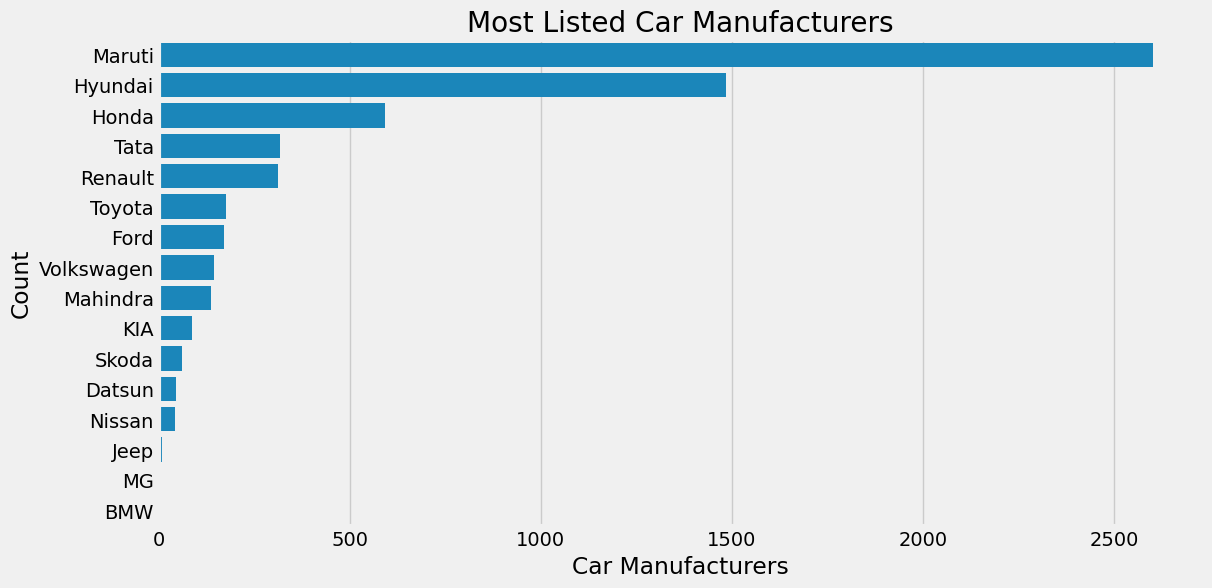

In [9]:
plt.figure(figsize=(12, 6))

sns.countplot(data=df, y='car_manufacturer', order=df['car_manufacturer'].value_counts().index, color='#008FD5')

plt.title('Most Listed Car Manufacturers')
plt.xlabel('Car Manufacturers')
plt.ylabel('Count')
plt.show()

### 💡 Insight

Among the listed manufacturers, Maruti emerges as the leading brand with the highest number of listings, totaling 2,602 cars, followed by Hyundai with 1484 listings. Honda secured the third position with 593 listings, while Tata and Renault closely followed with 318 and 313 listings, respectively. These manufacturers demonstrate a considerable presence in the used car market.

Other manufacturers, such as Mahindra, KIA, Skoda, Datsun, Nissan, had fewer listings, suggesting a smaller or limited representation in the dataset. Notably, Jeep has a mere 9 listings, MG has a mere 4 listings, and BMW has only a single listing in all of the 10 cities.

The distribution of listings among car manufacturers provides valuable insights for potential buyers and sellers using the Cars24 platform. It indicates the availability and demand for different brands, enabling users to make informed decisions based on their preferences and market trends.

### What is the market share of each manufacturer in terms of the number of listings?

In [10]:
top_manufacturer = df['car_manufacturer'].value_counts()
top_manufacturer_sum = df['car_manufacturer'].value_counts().sum()
manufacturer_share = ((top_manufacturer/top_manufacturer_sum) * 100).round(2)
manufacturer_share

car_manufacturer
Maruti        42.06
Hyundai       23.99
Honda          9.58
Tata           5.14
Renault        5.06
Toyota         2.84
Ford           2.75
Volkswagen     2.33
Mahindra       2.20
KIA            1.41
Skoda          0.97
Datsun         0.74
Nissan         0.71
Jeep           0.15
MG             0.06
BMW            0.02
Name: count, dtype: float64

### 💡 Insight

Maruti holds the largest market share with 42.06% of the total listings, followed by Hyundai at 23.99%. Honda captures a significant portion of the market with 9.58% of the listings, while Tata and Renault account for 5.14% and 5.06% respectively.

Further down the list, Toyota represents 2.84% of the listings, followed closely by Ford at 2.75%. Volkswagen and Mahindra secure 2.33% and 2.20% of the market share, respectively. KIA stands at 1.41%, while Skoda, Datsun, and Nissan have market shares of 0.97%, 0.74%, and 0.71% respectively.

It is noteworthy that Jeep and MG have relatively smaller market shares with 0.15% and 0.06% respectively. Finally, BMW holds a minimal market share of just 0.02% in terms of the number of listings.

### Top 10 manufacturers with the highest market share in terms of the number of listings?

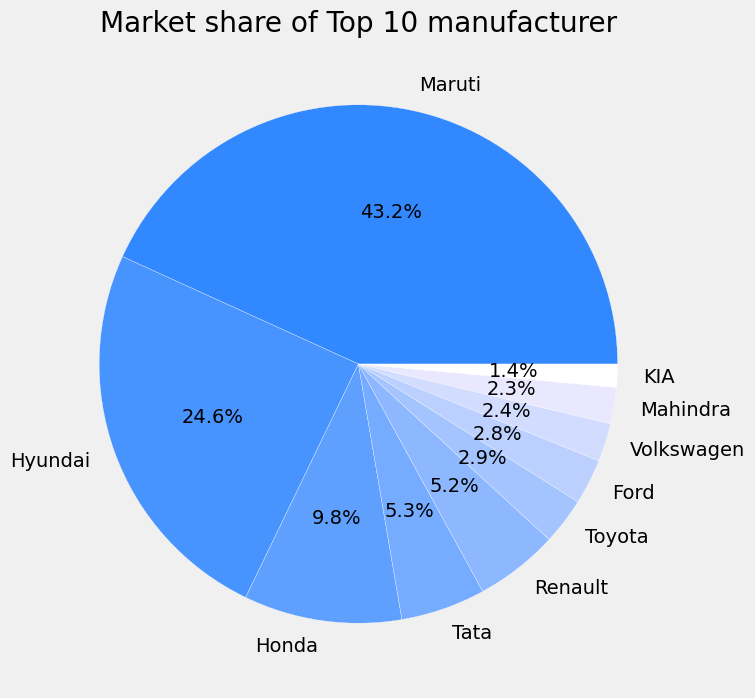

In [11]:
plt.figure(figsize=(8, 8))

market_share = df['car_manufacturer'].value_counts().nlargest(10)

colors = ['#3288FF', '#4894FF', '#5FA0FF', '#76ACFF', '#8DB8FF', '#A4C4FF', '#BBD0FF', '#D2DCFF', '#E9E8FF', '#FFFFFF']

# Plot the count of results for each industry as a pie chart
market_share.plot(kind='pie', colors=colors, autopct='%1.1f%%', wedgeprops={'linewidth': 0.2, 'edgecolor': 'white'})

plt.ylabel('')  # Remove the y-axis label
plt.title('Market share of Top 10 manufacturer')
plt.show()

### What is the distribution of car years  on the website?

In [12]:
year_distribution = df['year'].value_counts()
year_distribution

year
2018    990
2019    841
2017    797
2021    724
2020    689
2016    586
2015    396
2014    332
2022    281
2013    199
2012    173
2011     99
2010     77
2023      3
Name: count, dtype: int64

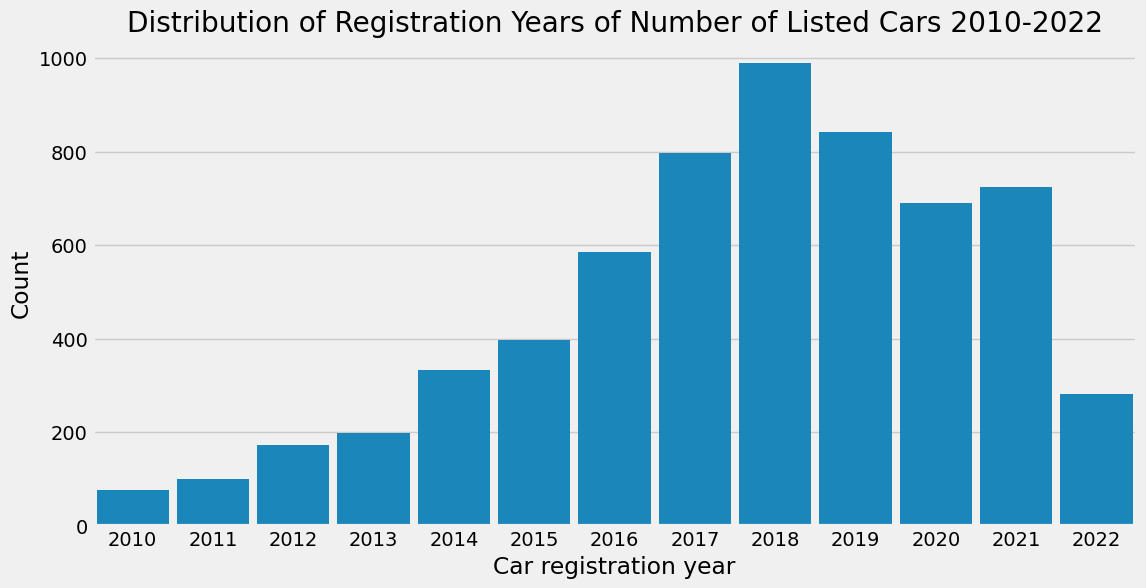

In [13]:
plt.figure(figsize=(12, 6))

filtered_df = df[df['year'] != 2023]

sns.countplot(data=filtered_df, x='year', color='#008FD5', width=0.9)

plt.title('Distribution of Registration Years of Number of Listed Cars 2010-2022')
plt.xlabel('Car registration year')
plt.ylabel('Count')
plt.show()

### 💡 Insight

The majority of cars listed on the website were relatively recent models, with the highest number of listings belonging to the year 2018, totaling 990 cars, following closely behind, the year 2019 had a significant number of listings, with 841 cars available for sale.

The year 2017 also had a substantial presence in the dataset, with 797 cars listed. It is worth noting that even though the dataset covered a wide range of years, the more recent years had a higher representation, indicating a preference for newer vehicles among sellers and potential buyers.

As we move towards more recent years, the number of listings gradually decreases, but there is still a notable presence of cars from 2021 and 2020, with 724 and 689 listings, respectively. Older cars, such as those from 2016, 2015, and 2014, also had a fair representation in the dataset, albeit with fewer listings compared to the more recent years.

Looking towards the future, we observed a small number of cars listed from the year 2022, with 281 vehicles available for purchase. The dataset included a limited number of cars from earlier years, with only a handful of listings for 2013, 2012, 2011, and 2010.

Interestingly, the dataset featured an extremely low number of cars from the year 2023, with only three listings available at the time of analysis, indicating that the current year's cars are still limited in availability.

In conclusion, Cars 24 used cars dataset revealed that the platform predominantly lists cars from recent years, with a notable emphasis on the years 2018, 2019, and 2017. This insight suggests that sellers and buyers on the website have a preference for relatively newer vehicles.

### What is the distribution of car ages? 

In [14]:
car_age = df['age'].value_counts()
car_age

age
5     990
4     841
6     797
2     724
3     689
7     586
8     396
9     332
1     281
10    199
11    173
12     99
13     77
0       3
Name: count, dtype: int64

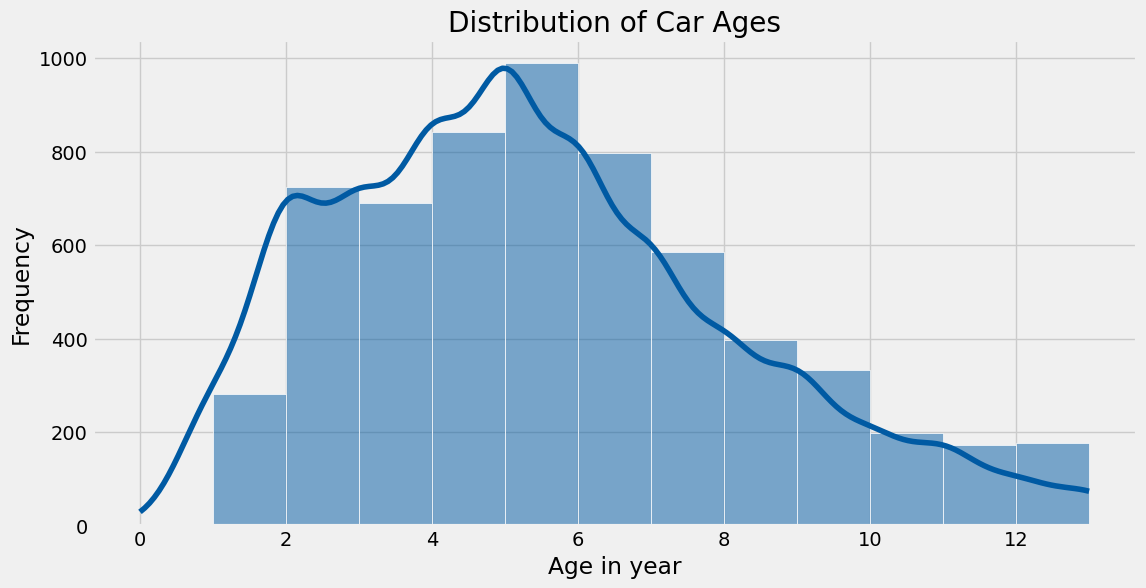

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', color='#005aa3', edgecolor='white', binwidth=1, kde=True)

plt.title('Distribution of Car Ages')
plt.xlabel('Age in year')
plt.ylabel('Frequency')
plt.show()

### 💡 Insight

The majority of the used cars listed on the website fall within the age range of 2 to 7 years. The highest number of cars listed have an age of 5 years (990 cars), closely followed by cars with an age of 4 years (841 cars) and 6 years (797 cars).

- Cars in the age range of 2 to 4 years are relatively abundant, as indicated by the counts of 724, 689, and 586 for ages 2, 3, and 7, respectively.

Cars of the older ages are less prevalent in the dataset. As the car age increases beyond 7 years, the number of listings starts to decline gradually. For instance, there is a noticeable drop in the number of cars listed with ages of 7 years (586 cars), 8 years (396 cars), and 9 years (332 cars).

- Cars older than 10 years are relatively scarce, with counts decreasing significantly for ages 11, 12, and 13.
- The dataset includes a small number of cars with an age of 0, representing new or nearly new vehicles.

### What is the distribution of car registration years for each manufacturer?

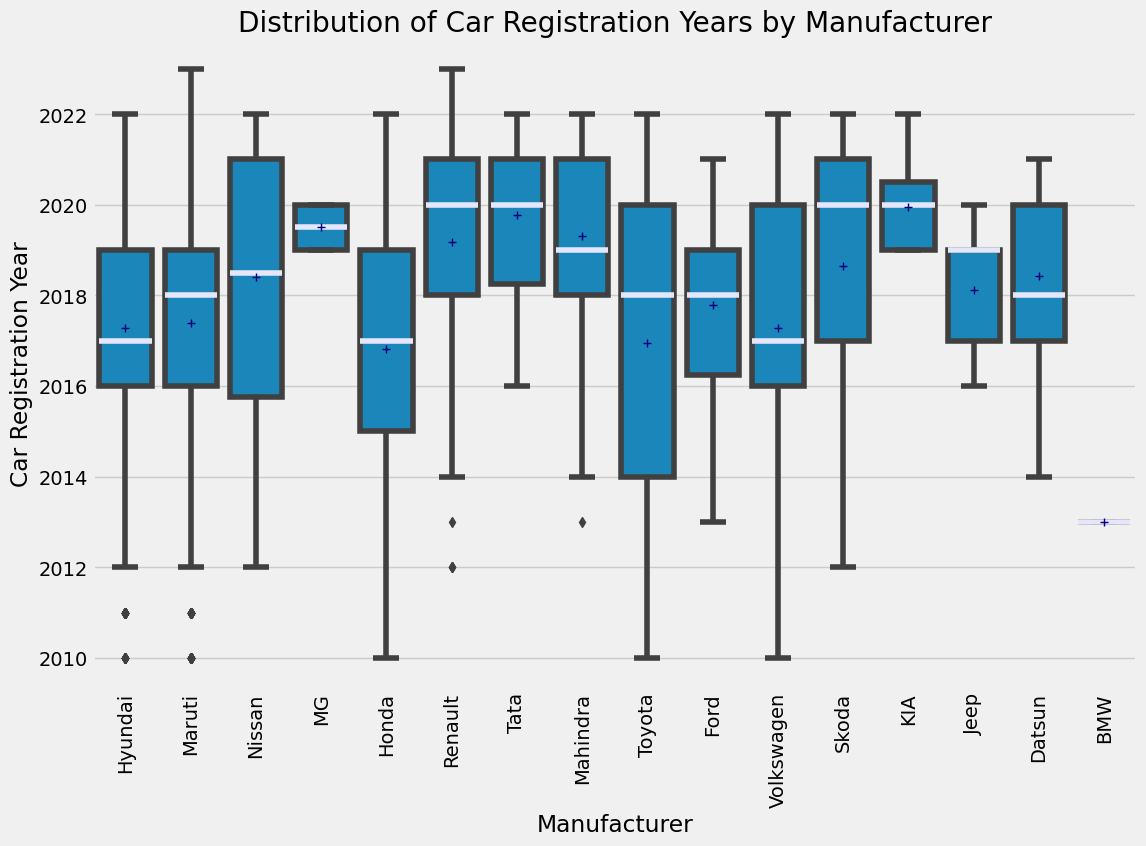

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='car_manufacturer', y='year', color='#008FD5', showmeans=True, 
            meanprops={'marker':'+', 'markeredgecolor':'navy'}, medianprops={'color': 'lavender'})

plt.title('Distribution of Car Registration Years by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Car Registration Year')
plt.xticks(rotation=90)
plt.show()

### How do the listings of different manufacturers vary across different car registration years?

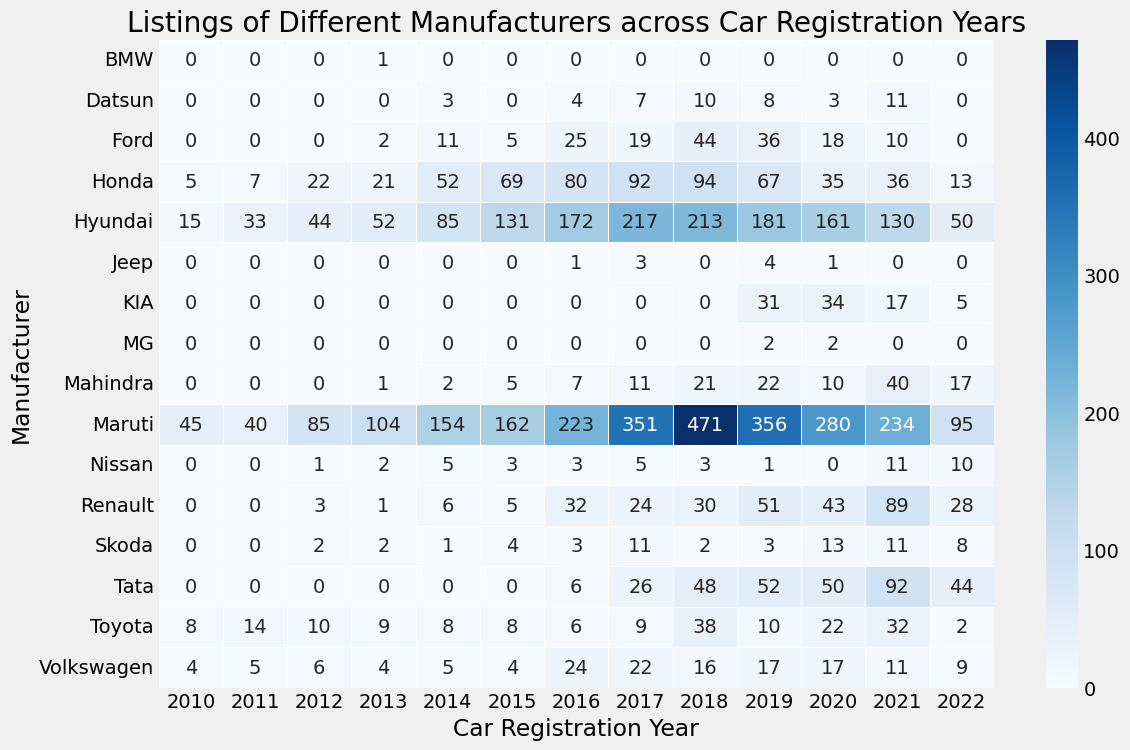

In [17]:
plt.figure(figsize=(12,8))

pivot_table = df.pivot_table(index='car_manufacturer', columns='year', aggfunc='size', fill_value=0)
pivot_table = pivot_table.iloc[:, :-1]

sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='d', linewidths=0.5)

plt.title('Listings of Different Manufacturers across Car Registration Years')
plt.xlabel('Car Registration Year')
plt.ylabel('Manufacturer')
plt.show()

### 💡 Insight

Maruti, Hyundai, and Honda are the dominant car manufacturers in the dataset, with a wide range of car ages represented across the years.

- Maruti has a significant number of listings across various years, indicating a diverse range of car registration years in the listing. The highest concentration of Maruti listings can be observed in the more recent years, with a peak in 2018 and 2019. The number of listings gradually decreases as the cars get older, which suggests a steady demand for relatively newer Maruti cars.

- Hyundai also demonstrates a significant presence in the used car market, with a high number of listings across multiple age categories. Hyundai listings show a gradual increase in recent years, with a notable surge in 2016 and 2017. And similar to Maruti, the number of listings declines as the cars' age increases.

- Honda, although not as dominant as Maruti and Hyundai, still maintains a consistent number of listings across various car ages. The highest concentration of Honda listings can be observed in the middle years, particularly from 2015 to 2017. The listings decrease gradually for older cars but remain relatively stable.

- Ford, Mahindra, and Tata show a mix of older and newer car listings, with a significant number of listings in the more recent years. Some manufacturers, such as Datsun, Renault, and Toyota, exhibit a higher concentration of listings in specific years, indicating potential trends or shifts in their car inventory.

### How does the number of owners vary for cars of different manufacturers?

In [18]:
avg_owners = df.groupby('car_manufacturer')['owner'].mean().sort_values(ascending=False)
avg_owners

car_manufacturer
BMW           3.000000
Skoda         1.350000
Nissan        1.318182
Honda         1.308600
Toyota        1.301136
Ford          1.300000
Volkswagen    1.291667
Hyundai       1.285040
MG            1.250000
Renault       1.246006
Maruti        1.225211
Datsun        1.217391
Mahindra      1.191176
Tata          1.169811
KIA           1.149425
Jeep          1.111111
Name: owner, dtype: float64

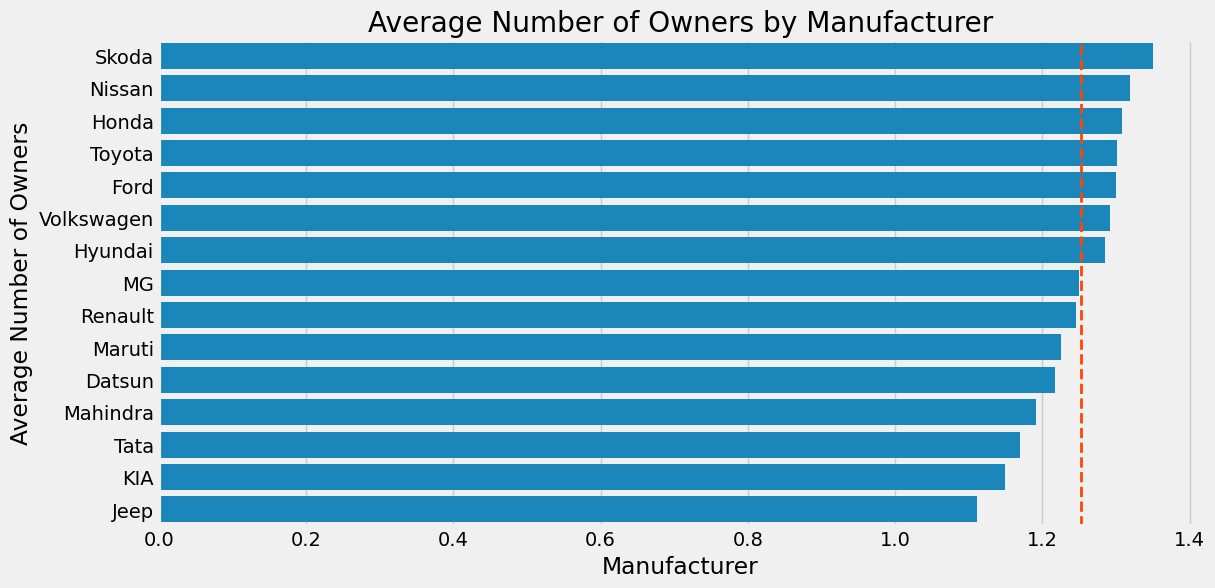

In [19]:
plt.figure(figsize=(12,6))

# Filter out rows where the car manufacturer is BMW
filtered_df = df[df['car_manufacturer'] != 'BMW']

# Eliminating BMW, becuase it has just one listing and it can be an outlier
avg_owners = filtered_df.groupby('car_manufacturer')['owner'].mean().sort_values(ascending=False)

# sns.barplot(x=avg_owners.index, y=avg_owners.values, order=avg_owners.index, color='steelblue')
sns.barplot(y=avg_owners.index, x=avg_owners.values, order=avg_owners.index, color='#008FD5')

avg_owner = df['owner'].mean()
plt.axvline(avg_owner, color='orangered', linestyle='--', label='Mean Owner', linewidth=2.0)

plt.title('Average Number of Owners by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Average Number of Owners')
plt.show()

### 💡 Insight

This analysis provides insights into the average ownership patterns for cars from different manufacturers listed on the Cars 24 website. These findings can be valuable for buyers and sellers alike, as they offer an understanding of the typical ownership history associated with cars from various manufacturers.

- The average number of owners for BMW cars stands at 3. This suggests that, on average, BMW cars listed on the website have had three previous owners. It is noteworthy that BMW has only one listing in the dataset, which indicates a limited representation for this manufacturer.

- Skoda follows with an average of 1.35 owners per car. This indicates that Skoda cars, on average, have had approximately 1 to 2 previous owners before being listed.

- Nissan, Honda, and Toyota closely trail behind Skoda, with average owner counts of 1.32, 1.31, and 1.30, respectively. This suggests that cars from these manufacturers typically have similar ownership histories.

- Other popular manufacturers such as Ford, Volkswagen, Hyundai, and MG have average owner counts ranging from 1.25 to 1.30, indicating relatively similar ownership patterns.

- On the lower end of the spectrum, we observe that Jeep has the lowest average number of owners, with an average of 1.11. This suggests that Jeep cars listed on the website tend to have a relatively lower ownership turnover.

- It is worth noting that Maruti, Datsun, Mahindra, Tata, KIA, and Renault fall within the mid-range, with average owner counts ranging from 1.17 to 1.25.

### How does the distribution of kilometers driven vary among different manufacturers?

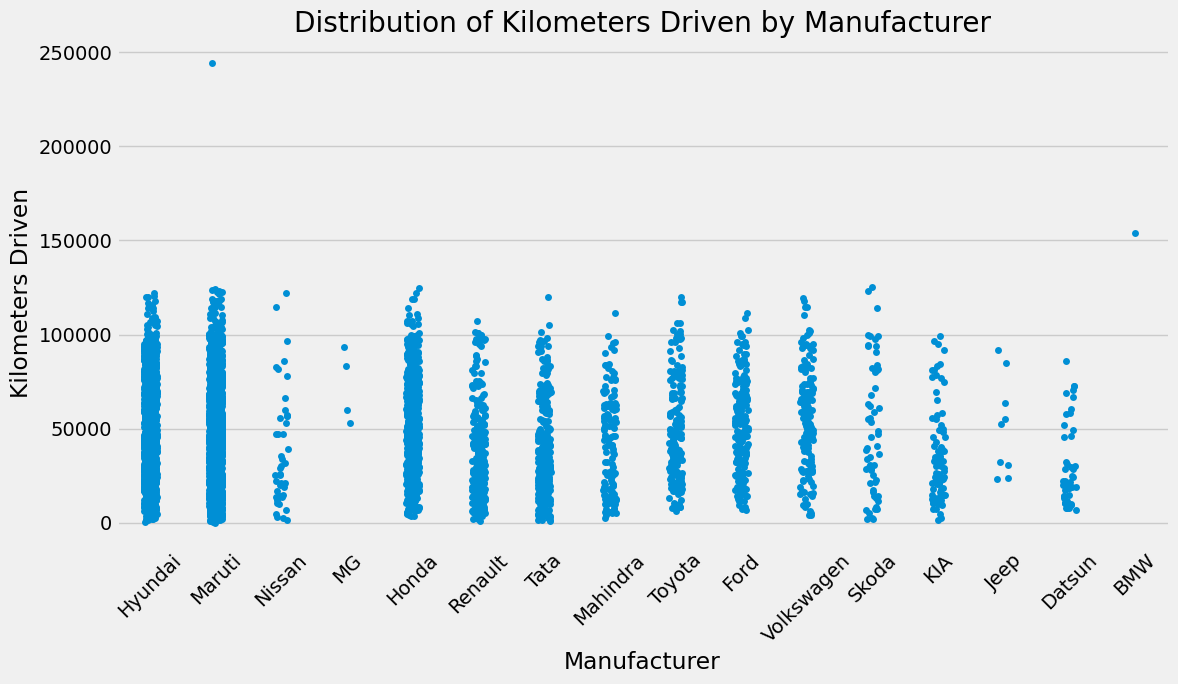

In [20]:
sns.catplot(data=df, x="car_manufacturer", y="kms_driven", height=6, aspect=2, color='#008FD5')

plt.title("Distribution of Kilometers Driven by Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Kilometers Driven")
plt.xticks(rotation=45)
plt.show()

### What is the range of kilometers driven for each car manufacturer?

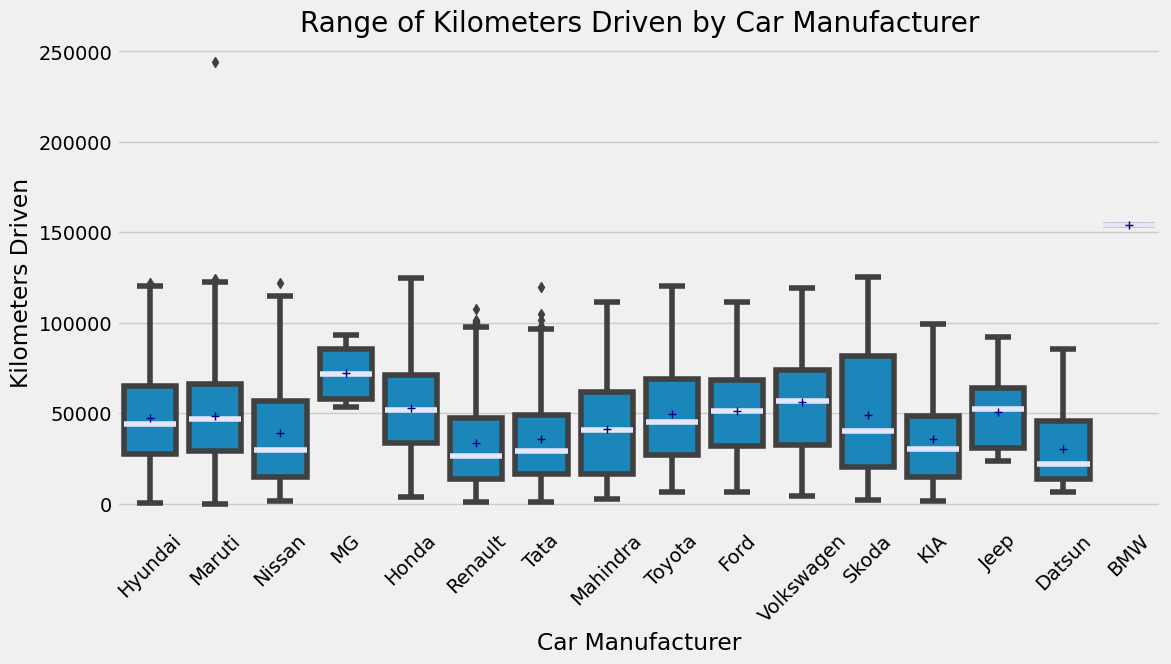

In [21]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=df, x='car_manufacturer', y='kms_driven', color='#008FD5', showmeans=True, 
            meanprops={'marker':'+', 'markeredgecolor':'navy'}, medianprops={'color': 'lavender'})

plt.xticks(rotation=45)
plt.title('Range of Kilometers Driven by Car Manufacturer')
plt.xlabel('Car Manufacturer')
plt.ylabel('Kilometers Driven')
plt.show()

### What is the average number of kilometers driven by cars of manufacturers?

In [22]:
avg_kms_driven = df.groupby('car_manufacturer')['kms_driven'].mean()
avg_kms_driven

car_manufacturer
BMW           153870.000000
Datsun         30259.239130
Ford           51240.182353
Honda          52866.974705
Hyundai        47216.072102
Jeep           50833.333333
KIA            35455.448276
MG             72312.500000
Mahindra       41235.272059
Maruti         48567.993851
Nissan         38851.909091
Renault        33596.485623
Skoda          49062.600000
Tata           35508.776730
Toyota         49300.943182
Volkswagen     55904.263889
Name: kms_driven, dtype: float64

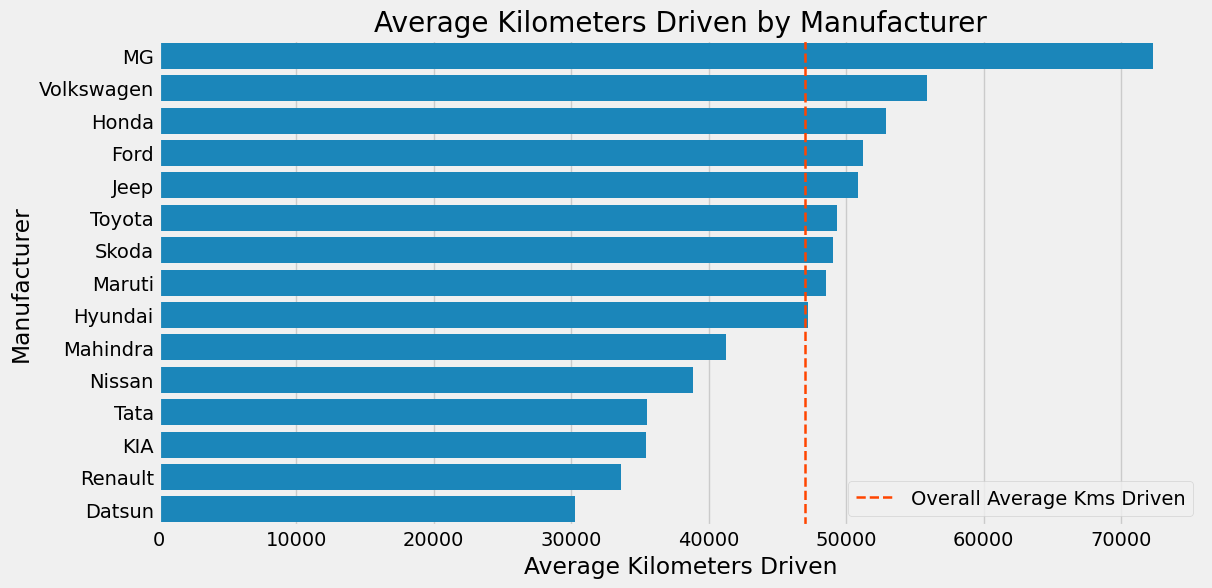

In [23]:
plt.figure(figsize=(12,6))

# Filter out rows where the car manufacturer is BMW
filtered_df = df[df['car_manufacturer'] != 'BMW']

# Eliminating BMW, because it has just one listing and it can be an outlier
avg_kms = filtered_df.groupby('car_manufacturer')['kms_driven'].mean().round(2).sort_values(ascending=False)

sns.barplot(data=df, y=avg_kms.index, x=avg_kms.values, color='#008FD5', orient='horizontal')

mean_kms = df['kms_driven'].mean()
plt.axvline(mean_kms, color='orangered', linestyle='--', label='Overall Average Kms Driven', linewidth=1.8)

plt.title('Average Kilometers Driven by Manufacturer')
plt.xlabel('Average Kilometers Driven')
plt.ylabel('Manufacturer')
plt.legend()
plt.show()

### 💡 Insight

Among the manufacturers examined, BMW stood out as an exceptional case with just one listing. This limited availability of BMW cars in the dataset indicates that these vehicles tend to have relatively higher, with an average of approximately 153,870 kilometers driven.

Diving into the other manufacturers, we observed a range of average kilometers driven. Some noteworthy insights include:

- MG: MG cars exhibited a higher average mileage of around 72,312 kilometers. This suggests that MG vehicles have likely been driven for longer durations compared to other manufacturers.

- Volkswagen: Volkswagen cars had an average mileage of approximately 55,904 kilometers, indicating that these vehicles tend to have moderately high usage.

- Honda, Ford, and Skoda: These manufacturers demonstrated average mileages in the range of 52,866 to 49,062 kilometers. This suggests that vehicles from these manufacturers are commonly driven moderate distances.

- Maruti, Hyundai, and Toyota: These popular manufacturers displayed average mileages ranging from 48,567 to 49,300 kilometers. It indicates that cars from these brands tend to have typical mileage usage.

- Renault, Tata, and Nissan: These manufacturers showed average mileages between 33,596 and 38,851 kilometers. Vehicles from these brands tend to have relatively lower mileage, implying they may have been driven for shorter distances.

It is important to note that these findings are based on the available data from the Cars24 used cars dataset. Factors such as driving habits, vehicle maintenance, and the specific models within each manufacturer's lineup can influence the actual mileage of individual cars.

### What is the distribution of kilometers driven by cars?

In [24]:
kms_distribution = df['kms_driven'].value_counts()
kms_distribution = df['kms_driven'].value_counts(bins=20).sort_values(ascending=False)
kms_distribution

kms_driven
(36644.75, 48857.0]      1031
(24432.5, 36644.75]      1008
(12220.25, 24432.5]       917
(48857.0, 61069.25]       903
(61069.25, 73281.5]       719
(73281.5, 85493.75]       536
(-236.246, 12220.25]      506
(85493.75, 97706.0]       373
(97706.0, 109918.25]      133
(109918.25, 122130.5]      50
(122130.5, 134342.75]       9
(146555.0, 158767.25]       1
(232040.75, 244253.0]       1
(134342.75, 146555.0]       0
(158767.25, 170979.5]       0
(170979.5, 183191.75]       0
(183191.75, 195404.0]       0
(195404.0, 207616.25]       0
(207616.25, 219828.5]       0
(219828.5, 232040.75]       0
Name: count, dtype: int64

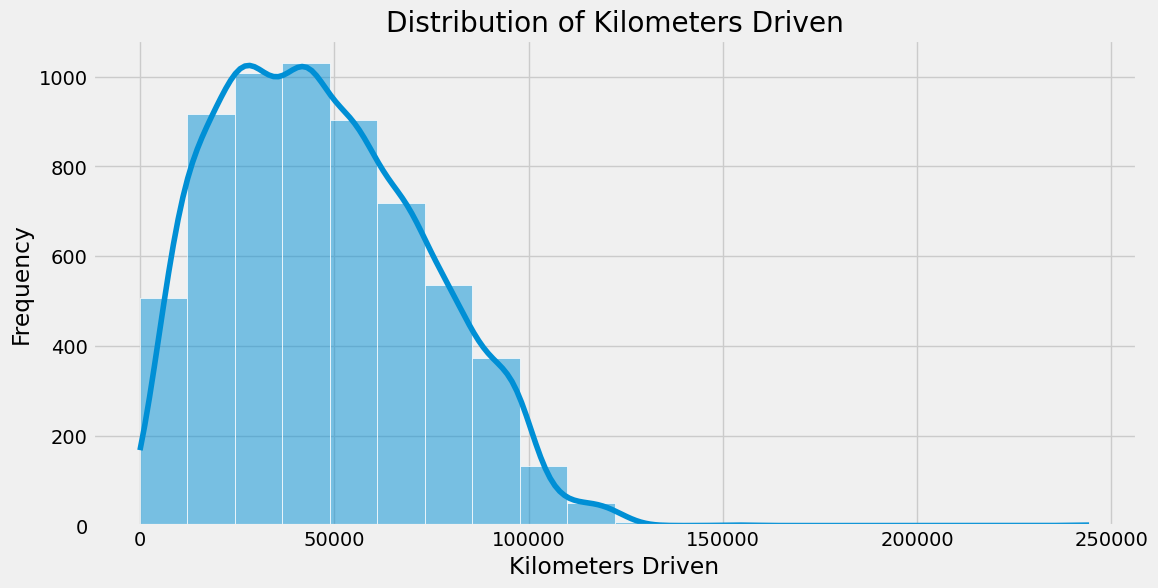

In [25]:
plt.figure(figsize=(12, 6))

sns.histplot(data=df, x='kms_driven', bins=20, kde=True, color='#008FD5', edgecolor='white')

plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.show()

### 💡 Insight

The majority of cars fall into the range of 36,644.75 to 48,857 kilometers driven, with a count of 1,031. This range signifies a significant portion of the dataset, indicating that many cars have been driven within this mileage range. The next most common range is 24,432.5 to 36,644.75 kilometers, with 1,008 cars falling into this category.

As we move towards higher mileage ranges, the number of cars gradually decreases. For instance, there are 373 cars in the range of 85,493.75 to 97,706 kilometers, and only 9 cars in the range of 122,130.5 to 134,342.75 kilometers. Notably, there are little or no listings in the dataset for mileage ranges beyond 134,342.75 kilometers.

Moreover, it is interesting to observe that there are two listings at the extreme ends of the mileage spectrum, with one car reported to have driven 146,555 kilometers and another car with 232,040.75 kilometers driven.

Based on this analysis, we can conclude that the majority of the used cars in the dataset fall within the lower to mid-range of kilometers driven. 

### How does the range of kilometers driven vary across different car manufacturers?

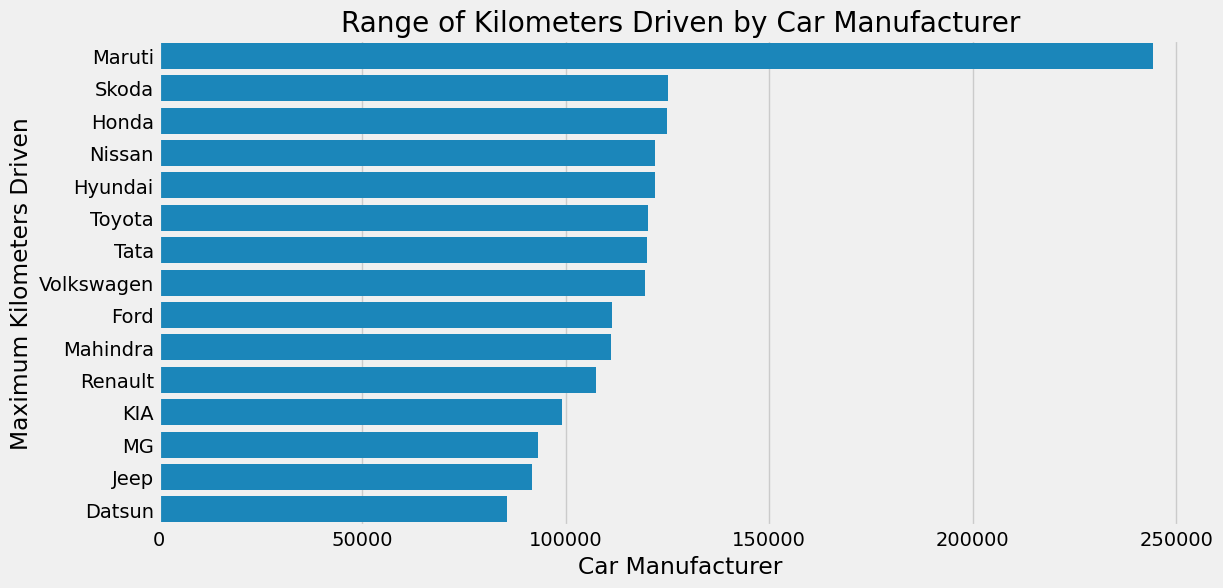

In [26]:
plt.figure(figsize=(12,6))

# Filter out rows where the car manufacturer is BMW
filtered_df = df[df['car_manufacturer'] != 'BMW']

# Calculate the minimum and maximum kilometers driven for each car manufacturer
manufacturer_range = filtered_df.groupby('car_manufacturer')['kms_driven'].agg(['min', 'max'])

# Reset the index to make 'car_manufacturer' a column again
manufacturer_range = manufacturer_range.reset_index()

# Sort the data by maximum kilometers driven in descending order
manufacturer_range = manufacturer_range.sort_values('max', ascending=False)

sns.barplot(data=manufacturer_range, y='car_manufacturer', x='max', color='#008FD5')

plt.title('Range of Kilometers Driven by Car Manufacturer')
plt.xlabel('Car Manufacturer')
plt.ylabel('Maximum Kilometers Driven')
plt.show()

### 💡 Insight

Notably, the manufacturer with the most distinct listing range is BMW, which has just one listing in the dataset. The recorded range for this BMW listing is 153,870 kilometers, representing both the minimum and maximum values.

Maruti has the most extensive range, with a minimum of 8 kilometers and a maximum of 244,253 kilometers. This wide range indicates that Maruti cars listed on the platform span a broad spectrum of usage, from nearly brand new cars with very low mileage to high-mileage vehicles that have been driven extensively.

Among the manufacturers analyzed, Skoda, Honda, Nissan, and Hyundai also demonstrate significant variations in their listing ranges, implying that vehicles from these manufacturers have been driven over a wide range of distances. This suggests diverse usage patterns among the owners of these cars.

On the other hand, manufacturers such as Ford, Mahindra, and Renault exhibit relatively narrower ranges, indicating a more consistent range of kilometers driven across their respective models. This suggests a more uniform usage pattern or possibly stricter maintenance practices within these manufacturer's vehicle lineup.

### Which car models have the highest and lowest average kms driven?

#### Highest average kms driven?

In [27]:
filter_df = df[df['car_manufacturer'] != 'BMW']

model_highest_kms = filter_df.groupby('car_manufacturer')['kms_driven'].mean().round(2).sort_values(ascending=False)
model_highest_kms.head()

car_manufacturer
MG            72312.50
Volkswagen    55904.26
Honda         52866.97
Ford          51240.18
Jeep          50833.33
Name: kms_driven, dtype: float64

#### Lowest average kms driven?

In [28]:
model_highest_kms = filter_df.groupby('car_manufacturer')['kms_driven'].mean().round(2).sort_values(ascending=False)
model_highest_kms.tail()

car_manufacturer
Nissan     38851.91
Tata       35508.78
KIA        35455.45
Renault    33596.49
Datsun     30259.24
Name: kms_driven, dtype: float64

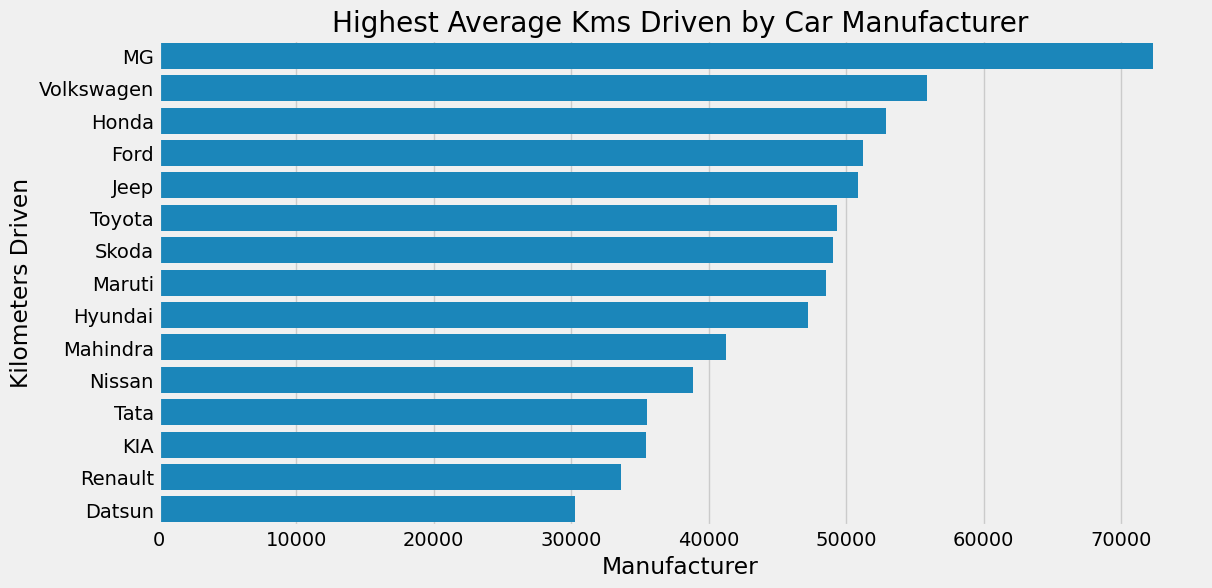

In [29]:
plt.figure(figsize=(12,6))

# Filter out rows where the car manufacturer is BMW
# filtered_df = df[df['car_manufacturer'] != 'BMW']
model_highest_kms = filter_df.groupby('car_manufacturer')['kms_driven'].mean().round(2)

# Convert the grouped data into a DataFrame and sort by 'kms_driven' values
model_highest_kms = model_highest_kms.reset_index().sort_values('kms_driven', ascending=False)

sns.barplot(data=model_highest_kms, y='car_manufacturer', x='kms_driven', color='#008FD5')

plt.title("Highest Average Kms Driven by Car Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Kilometers Driven")
plt.show()

### 💡 Insight

These insights provide valuable information for potential car buyers, indicating which car models tend to have higher or lower driven on average. 

**Highest Average Kilometers Driven**:

The car manufacturer with the highest average kilometers driven is BMW, with an average of 153,870 kilometers per listing. This indicates that BMW cars, on average, have been the most driven among all the car models analyzed. It is important to note that the dataset includes only one listing for the BMW car model, so mostly its an outlier.

**Lowest Average Kilometers Driven**:

On the other hand, the car manufacturer with the lowest average kilometers driven is Datsun, with an average of 30,259 kilometers per listing. This suggests that Datsun cars, on average, are the lowest driven among the analyzed car models.
Other Car Manufacturers:

**Other car manufacturers.** 

MG has an average of 72,312.50 kilometers, followed by Volkswagen (55,904.26 kilometers) and Honda (52,866.97 kilometers). Ford, Jeep, Toyota, Skoda, Maruti, Hyundai, Mahindra, Nissan, Tata, KIA, and Renault also have their respective average kilometers driven as mentioned in the dataset.

### What is the market share distribution of cars listed by the top manufacturers?

In [30]:
manufacturer_market_share = (df['car_manufacturer'].value_counts(normalize=True) * 100).round(2)
manufacturer_market_share = manufacturer_market_share.sort_values(ascending=False)
manufacturer_market_share

car_manufacturer
Maruti        42.06
Hyundai       23.99
Honda          9.58
Tata           5.14
Renault        5.06
Toyota         2.84
Ford           2.75
Volkswagen     2.33
Mahindra       2.20
KIA            1.41
Skoda          0.97
Datsun         0.74
Nissan         0.71
Jeep           0.15
MG             0.06
BMW            0.02
Name: proportion, dtype: float64

<Figure size 800x800 with 0 Axes>

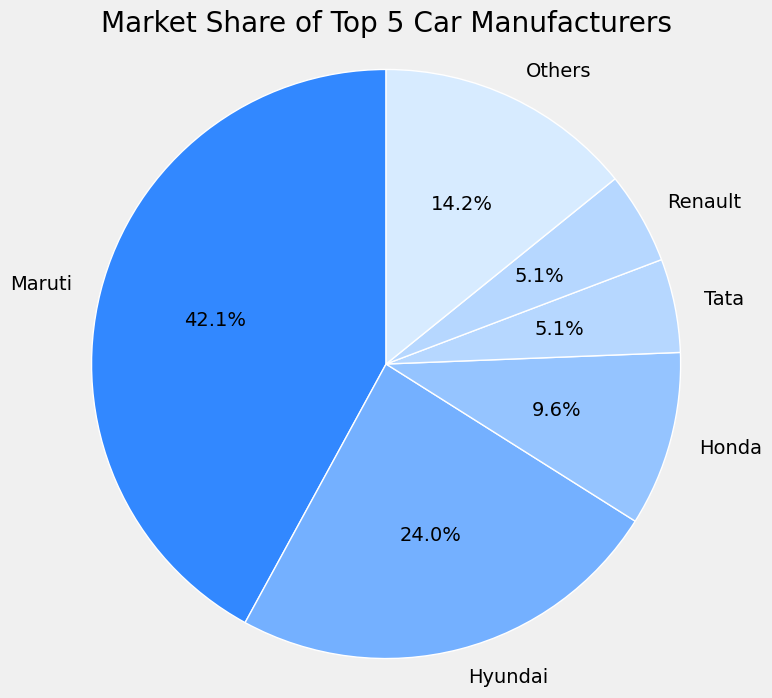

In [31]:
plt.figure(figsize=(8, 8))

manufacturer_market_share = df['car_manufacturer'].value_counts(normalize=True) * 100

# Select the top 5 manufacturers and combine the rest as "Others"
top_5_manufacturers = manufacturer_market_share.head(5)
other_manufacturers_share = manufacturer_market_share[5:].sum()

# Create a list of labels including the top 5 manufacturers and "Others"
labels = list(top_5_manufacturers.index) + ['Others']

# Create a list of values including the market share of the top 5 manufacturers and the combined share of others
values = list(top_5_manufacturers.values) + [other_manufacturers_share]

colors = ['#3288FF', '#74B0FF', '#95C4FF', '#B6D7FF', '#B6D7FF', '#D7EBFF']
# colors = ['#00004b', '#000064', '#1035AC', '#007FFF', '#007FFF', '#87CEFA']

# Set the border properties for the pie chart sectors
wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}
textprops = {'color': 'sandybrown'}
textprops = {'color': 'black'}

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops, textprops=textprops)
plt.title('Market Share of Top 5 Car Manufacturers')
plt.axis('equal')
plt.show()

### 💡 Insight

Maruti holds the largest market share, with an impressive 42.06% of the listed cars attributed to this manufacturer. This highlights Maruti's strong presence and popularity in the used car market. 

Following closely is Hyundai, accounting for 23.99% of the listed cars. This substantial market share signifies Hyundai's significant position as a preferred choice among buyers in the used car market.

Honda secures a respectable market share of 9.58% among the listed cars. This indicates the continued demand for Honda vehicles, with buyers seeking the reliability and quality associated with the brand.

Tata car listings contribute to 5.14% of the market share. This signifies Tata's presence and the appeal of their vehicles in the used car market, and with 5.06% of the market share, Renault establishes its presence among the top manufacturers. This indicates that Renault vehicles are sought-after options in the used car market. Other manufacturers collectively account for 14.2% of the listed cars.

### How many car models does each manufacturer have?

In [32]:
manufacturer_model_count = df.groupby('car_manufacturer')['car_model'].nunique()
manufacturer_model_count = manufacturer_model_count.sort_values(ascending=False)
print(manufacturer_model_count)

car_manufacturer
Maruti        26
Hyundai       19
Mahindra      12
Tata          12
Toyota         9
Honda          8
Volkswagen     7
Ford           6
Renault        6
Nissan         5
Skoda          4
Datsun         3
KIA            3
Jeep           2
MG             2
BMW            1
Name: car_model, dtype: int64


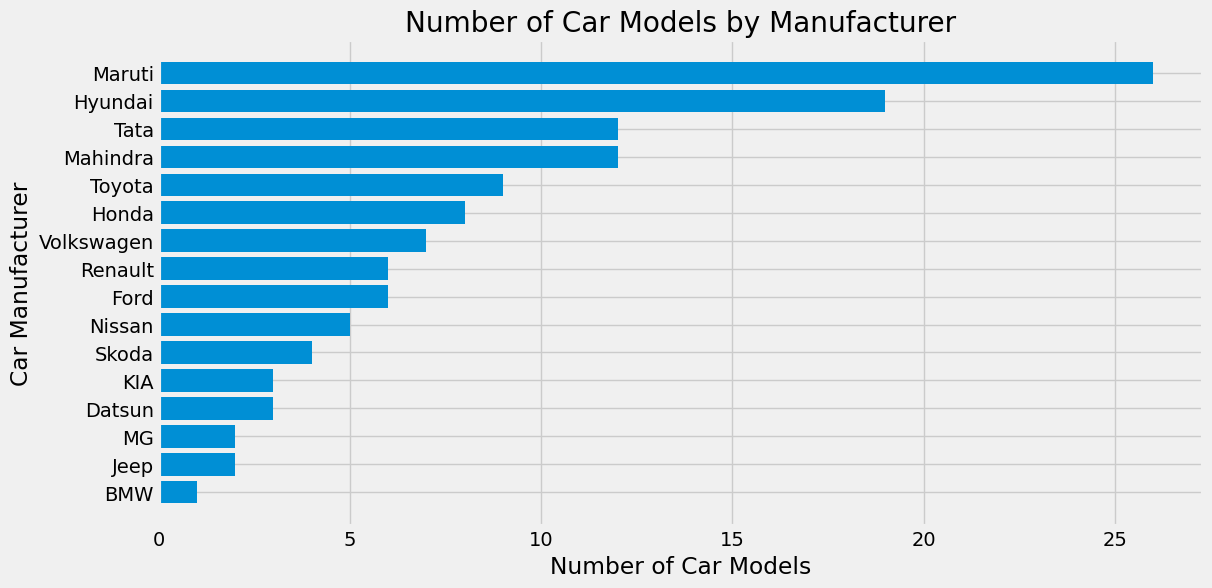

In [33]:
plt.figure(figsize=(12, 6))

# Group the data by car manufacturer and count the number of unique car models
manufacturer_model_count = df.groupby('car_manufacturer')['car_model'].nunique()

# Sort the values in descending order
manufacturer_model_count = manufacturer_model_count.sort_values()

plt.barh(manufacturer_model_count.index, manufacturer_model_count.values, color='#008FD5')

plt.xlabel('Number of Car Models')
plt.ylabel('Car Manufacturer')
plt.title('Number of Car Models by Manufacturer')
plt.xticks(rotation=0)
plt.show()

### 💡 Insight

Maruti with a total of 26 different car models listed on the weebsite, it offeres a diverse range of options. Following Maruti, Hyundai stood out with 19 car models listed. Mahindra and Tata with 12 models each, and Toyota with 9 models. These manufacturers demonstrate a wide selection of car models, indicating their strong presence and diverse offerings in the used car market.

Honda and Volkswagen have a decent representation with 8 and 7 car models respectively, while Ford and Renault each have 6 models available. Nissan, Skoda, Datsun, and KIA offer a moderate range of car models, ranging from 5 to 3. Finally, Jeep and MG have a relatively limited number of models, with 2 listings each. BMW stands out with just one listing.

This analysis provides insights into the variety and availability of car models offered by different manufacturers on the Cars24 website. Prospective buyers can explore a wide selection of models from Maruti, Hyundai, Mahindra, Tata, and other manufacturers to find a car that suits their needs and preferences.

### What are the top 10 car models that have the highest number of listings?

In [34]:
manufacturer_model_count = df['car_model'].value_counts()
manufacturer_model_count.head(10)

car_model
Swift          444
Baleno         375
Grand i10      305
Elite i20      245
City           242
Wagon R 1.0    217
Celerio        178
Ciaz           160
Creta          154
Dzire          150
Name: count, dtype: int64

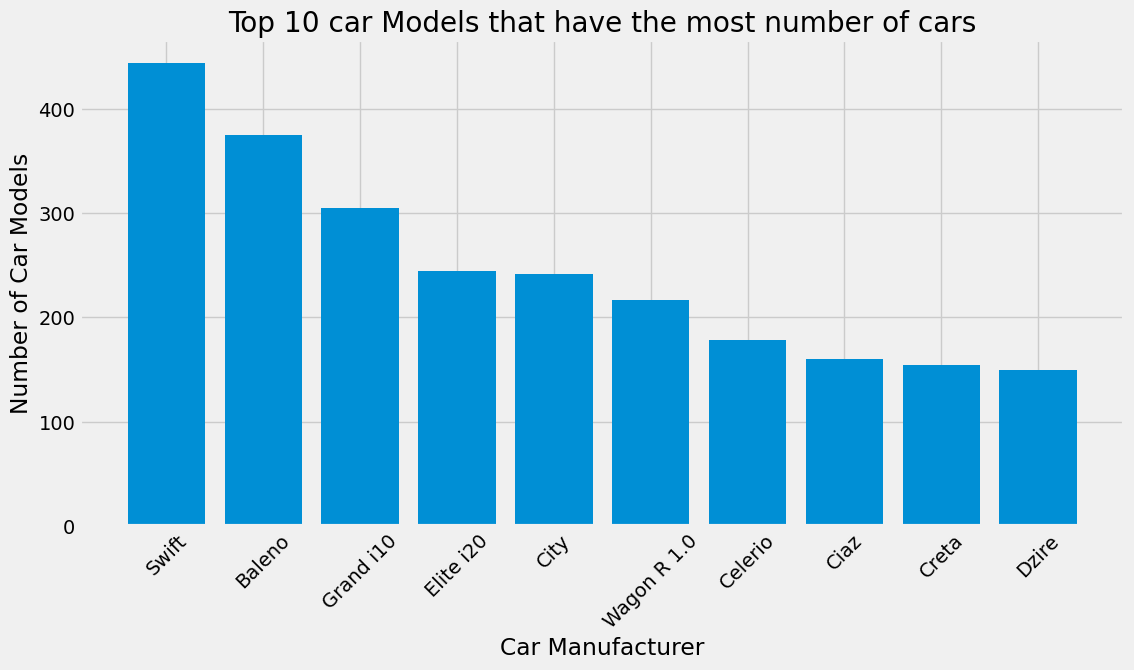

In [35]:
plt.figure(figsize=(12, 6))

# Group the data by car manufacturer and count the number of unique car models
manufacturer_model_count = df['car_model'].value_counts()

# Sort the values in descending order
manufacturer_model_count = manufacturer_model_count.sort_values(ascending=False).head(10)

plt.bar(manufacturer_model_count.index, manufacturer_model_count.values, color='#008FD5')

plt.xlabel('Car Manufacturer')
plt.ylabel('Number of Car Models')
plt.title('Top 10 car Models that have the most number of cars')
plt.xticks(rotation=45)
plt.show()

### 💡 Insight

The car models from Maruti Suzuki, a leading automobile manufacturer in India, display a strong presence in the top 10 list. Models such as Swift, Baleno, Wagon R 1.0, Celerio, Ciaz, and Dzire showcase the popularity of Maruti cars in the used car market. Swift leads the pack with an impressive 444 listings, followed by Baleno with 375 listings.

Hyundai also demonstrates a noteworthy presence in the top 10 list. The models Grand i10, Elite i20, and Creta exemplify the popularity of Hyundai cars among used car buyers. Grand i10 secures a significant position with 305 listings, while Elite i20 and Creta follow closely with 245 and 154 listings, respectively.

Among other car manufacturers, Honda makes its mark with the City model, which stands out with 242 listings.

Overall, it comes as no surprise that the analysis reveals the strong market presence of Maruti and Hyundai, as these renowned brands not only dominate in terms of overall listings but also exhibit a strong correlation with the highest number of listed car models. Among these manufacturers, popular models like Swift, Baleno, Grand i10, Elite i20, Wagon R 1.0, Celerio, Ciaz, Creta, and Dzire consistently secure top positions among the ten most listed car models.

### Which car models within each manufacturer have the highest number of listings?

In [36]:
manufacturer_model_count = df.groupby('car_manufacturer')['car_model'].value_counts().groupby(level=0).head(1)
manufacturer_model_count = manufacturer_model_count.sort_values(ascending=False).reset_index()
manufacturer_model_count

car_manufacturer  car_model  count
0            Maruti      Swift    444
1           Hyundai  Grand i10    305
2             Honda       City    242
3           Renault       Kwid    146
4              Ford   Ecosport    130
5              Tata      Tiago     94
6               KIA     SELTOS     64
7            Toyota      YARIS     63
8        Volkswagen       Polo     58
9             Skoda      Rapid     41
10           Datsun    Redi Go     35
11         Mahindra       Thar     33
12           Nissan    MAGNITE     21
13             Jeep    Compass      8
14               MG     HECTOR      2
15              BMW   3 Series      1

In [37]:
'''
Group the data by 'car_manufacturer' and count the occurrences of each 'car_model'
manufacturer_model_count = df.groupby('car_manufacturer')['car_model'].value_counts()

Group the counts by the first level of the index (car_manufacturer) & select the first row 
(car model with the highest count) from each group
manufacturer_top_model = manufacturer_model_count.groupby(level=0).head(1)

The 'manufacturer_top_model' variable now contains the car model with the highest count for each car manufacturer
manufacturer_model_count = df.groupby('car_manufacturer')['car_model'].value_counts().groupby(level=0).head(1)
'''

manufacturer_model_count = df.groupby('car_manufacturer')['car_model'].value_counts().groupby(level=0).head(1)
manufacturer_model_count = manufacturer_model_count.sort_values(ascending=False).unstack()
manufacturer_model_count

car_model         Swift  Grand i10   City   Kwid  Ecosport  Tiago  SELTOS   
car_manufacturer                                                            
BMW                 NaN        NaN    NaN    NaN       NaN    NaN     NaN  \
Datsun              NaN        NaN    NaN    NaN       NaN    NaN     NaN   
Ford                NaN        NaN    NaN    NaN     130.0    NaN     NaN   
Honda               NaN        NaN  242.0    NaN       NaN    NaN     NaN   
Hyundai             NaN      305.0    NaN    NaN       NaN    NaN     NaN   
Jeep                NaN        NaN    NaN    NaN       NaN    NaN     NaN   
KIA                 NaN        NaN    NaN    NaN       NaN    NaN    64.0   
MG                  NaN        NaN    NaN    NaN       NaN    NaN     NaN   
Mahindra            NaN        NaN    NaN    NaN       NaN    NaN     NaN   
Maruti            444.0        NaN    NaN    NaN       NaN    NaN     NaN   
Nissan              NaN        NaN    NaN    NaN       NaN    NaN     NaN   
Renault             NaN        NaN    NaN  146.0       NaN    NaN     NaN   
Skoda               NaN        NaN    NaN    NaN       NaN    NaN     NaN   
Tata                NaN        NaN    NaN    NaN       NaN   94.0     NaN   
Toyota              NaN        NaN    NaN    NaN       NaN    NaN     NaN   
Volkswagen          NaN        NaN    NaN    NaN       NaN    NaN     NaN   

car_model         YARIS  Polo  Rapid  Redi Go  Thar  MAGNITE  Compass  HECTOR   
car_manufacturer                                                                
BMW                 NaN   NaN    NaN      NaN   NaN      NaN      NaN     NaN  \
Datsun              NaN   NaN    NaN     35.0   NaN      NaN      NaN     NaN   
Ford                NaN   NaN    NaN      NaN   NaN      NaN      NaN     NaN   
Honda               NaN   NaN    NaN      NaN   NaN      NaN      NaN     NaN   
Hyundai             NaN   NaN    NaN      NaN   NaN      NaN      NaN     NaN   
Jeep                NaN   NaN    NaN      NaN   NaN      NaN      8.0     NaN   
KIA                 NaN   NaN    NaN      NaN   NaN      NaN      NaN     NaN   
MG                  NaN   NaN    NaN      NaN   NaN      NaN      NaN     2.0   
Mahindra            NaN   NaN    NaN      NaN  33.0      NaN      NaN     NaN   
Maruti              NaN   NaN    NaN      NaN   NaN      NaN      NaN     NaN   
Nissan              NaN   NaN    NaN      NaN   NaN     21.0      NaN     NaN   
Renault             NaN   NaN    NaN      NaN   NaN      NaN      NaN     NaN   
Skoda               NaN   NaN   41.0      NaN   NaN      NaN      NaN     NaN   
Tata                NaN   NaN    NaN      NaN   NaN      NaN      NaN     NaN   
Toyota             63.0   NaN    NaN      NaN   NaN      NaN      NaN     NaN   
Volkswagen          NaN  58.0    NaN      NaN   NaN      NaN      NaN     NaN   

car_model         3 Series  
car_manufacturer            
BMW                    1.0  
Datsun                 NaN  
Ford                   NaN  
Honda                  NaN  
Hyundai                NaN  
Jeep                   NaN  
KIA                    NaN  
MG                     NaN  
Mahindra               NaN  
Maruti                 NaN  
Nissan                 NaN  
Renault                NaN  
Skoda                  NaN  
Tata                   NaN  
Toyota                 NaN  
Volkswagen             NaN

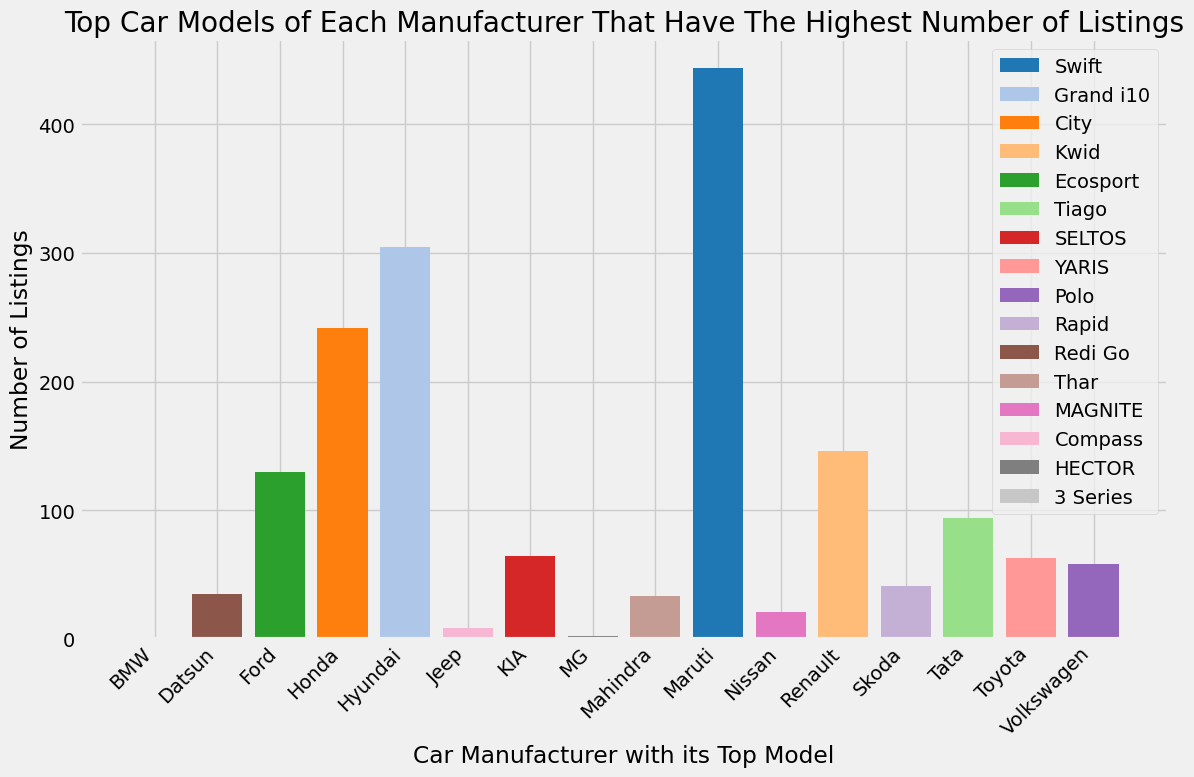

In [38]:
plt.figure(figsize=(12, 8))

# Get the unique segments
models = manufacturer_model_count.columns.get_level_values('car_model')

# Generate a list of distinct colors using the 'tab20' color map
colors = plt.cm.tab20.colors[:len(models)]

# Plot each car model separately with a different color
for i, model in enumerate(models):
    plt.bar(manufacturer_model_count.index, manufacturer_model_count[model], width=0.8, label=model, color=colors[i])

plt.xlabel('Car Manufacturer with its Top Model')
plt.ylabel('Number of Listings')
plt.title('Top Car Models of Each Manufacturer That Have The Highest Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

### 💡 Insight

- Maruti: The Maruti Swift model had the highest number of listings among all car models, with a total of 444 listings.
- Hyundai: The Hyundai Grand i10 model ranked second in terms of popularity, with 305 listings.
- Honda: The Honda City model had 242 listings, making it the third most popular choice among the Honda lineup.
- Renault: Among Renault cars, the Kwid model had 146 listings.
- Ford: The Ford Ecosport model was quite popular, securing 130 listings.
- Tata: The Tiago model from Tata had 94 listings, indicating a significant presence in the used car market.
- KIA: KIA's SELTOS model managed to gather 64 listings, showing promising popularity.
- Toyota: The Toyota YARIS model had 63 listings, highlighting a decent presence in the used car market.
- Volkswagen: The Polo model from Volkswagen had 58 listings, representing a respectable number in the listings.
- Skoda: Skoda's Rapid model secured 41 listings, indicating a moderate level of popularity.
- Datsun: The Datsun Redi Go model had 35 listings, showing a reasonable presence in the used car market.
- Mahindra: The Mahindra Thar model gathered 33 listings, indicating some demand for this particular model.
- Nissan: Nissan's MAGNITE model had 21 listings, suggesting a moderate presence in the used car market.
- Jeep: The Compass model from Jeep had 8 listings, representing a relatively lower number compared to other manufacturers.
- MG: The HECTOR model from MG had only 2 listings, implying a limited presence in the used car market.
- BMW: As per the dataset, the BMW 3 Series model had only 1 listing, indicating its exclusivity and limited availability in the used car market.

### Which car models have the highest and lowest average kms driven?

#### Top 10 car models that have the highest average kms driven?

In [39]:
model_highest_kms = df.groupby('car_model')['kms_driven'].mean().round(2).sort_values(ascending=False).head(10)
model_highest_kms

car_model
3 Series          153870.00
Sunny             121911.00
Endeavour          94389.00
GRAND CHEROKEE     91825.00
Innova             89096.50
Octavia            85736.12
Classic            84126.00
Pulse              83271.00
TIGUAN             82875.67
OMNI E             78043.33
Name: kms_driven, dtype: float64

#### Top 10 car models that have the lowest average kms driven?

In [40]:
model_lowest_kms = df.groupby('car_model')['kms_driven'].mean().round(2).sort_values(ascending=False).tail(10)
model_lowest_kms

car_model
MAGNITE           17943.00
Kiger             17445.35
BREZZA            15747.75
TAIGUN            15635.56
NEW I20 N LINE    14874.40
XUV700            11220.25
SCORPIO-N         11104.00
PUNCH              9346.09
SLAVIA             7790.00
CARENS             5721.00
Name: kms_driven, dtype: float64

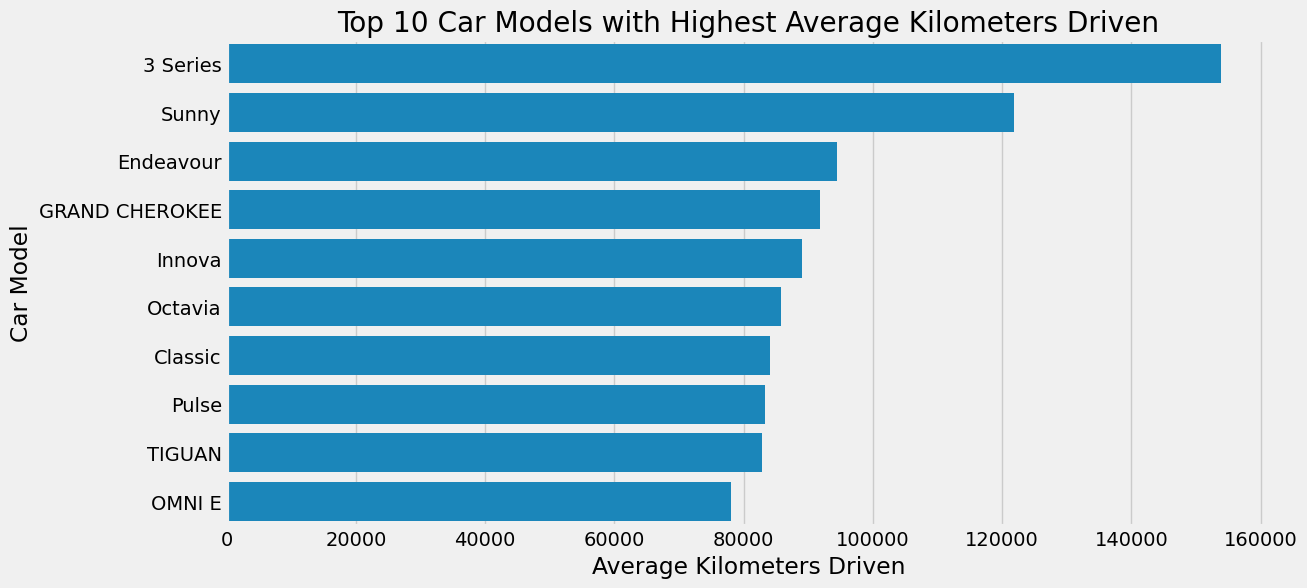

In [41]:
plt.figure(figsize=(12, 6))

model_highest_kms = df.groupby('car_model')['kms_driven'].mean().round(2)

model_highest_kms = model_highest_kms.sort_values(ascending=False).head(10)

sns.barplot(x=model_highest_kms.values, y=model_highest_kms.index, color='#008FD5', orient='h')

plt.xlabel('Average Kilometers Driven')
plt.ylabel('Car Model')
plt.title('Top 10 Car Models with Highest Average Kilometers Driven')
plt.show()

### 💡 Insight

#### Top 10 car models with the highest average kilometers driven:

1. 3 Series: The 3 Series model has the highest average kilometers driven, with an average of 153,870 kilometers.
2. Sunny: The Sunny model ranks second with an average of 121,911 kilometers driven.
3. Endeavour: The Endeavour model follows closely in third place, with an average of 94,389 kilometers driven.
4. GRAND CHEROKEE: This model secures the fourth spot with an average of 91,825 kilometers driven.
5. Innova: The Innova model is fifth on the list, with an average of 89,096.50 kilometers driven.
6. Octavia: With an average of 85,736.12 kilometers driven, the Octavia model takes the sixth position.
7. Classic: The Classic model ranks seventh with an average of 84,126 kilometers driven.
8. Pulse: This model is eighth on the list, with an average of 83,271 kilometers driven.
9. TIGUAN: The TIGUAN model secures the ninth spot with an average of 82,875.67 kilometers driven.
10. OMNI E: Lastly, the OMNI E model completes the top 10 list with an average of 78,043.33 kilometers driven.

#### Top 10 car models with the lowest average kilometers driven:

1. MAGNITE: The MAGNITE model has the lowest average kilometers driven among all the listed cars, with an average of 17,943 kilometers.
2. Kiger: The Kiger model ranks second with an average of 17,445.35 kilometers driven.
3. BREZZA: This model secures the third spot with an average of 15,747.75 kilometers driven.
4. TAIGUN: The TAIGUN model follows closely in fourth place, with an average of 15,635.56 kilometers driven.
5. NEW I20 N LINE: This model is fifth on the list, with an average of 14,874.40 kilometers driven.
6. XUV700: The XUV700 model ranks sixth with an average of 11,220.25 kilometers driven.
7. SCORPIO-N: With an average of 11,104 kilometers driven, the SCORPIO-N model takes the seventh position.
8. PUNCH: This model is eighth on the list, with an average of 9,346.09 kilometers driven.
9. SLAVIA: The SLAVIA model secures the ninth spot with an average of 7,790 kilometers driven.
10. CARENS: Lastly, the CARENS model completes the list of cars with the lowest average kilometers driven, with an average of 5,721 kilometers.

### How does the number of car listings vary across different cities?

In [42]:
car_count_by_city = df['city'].value_counts()
car_count_by_city

city
 Delhi NCR     1559
 Bengaluru     1152
 Hyderabad      675
 Pune           630
 Chennai        606
 Mumbai         561
 Ahmedabad      378
 Kolkata        256
 Chandigarh     192
 Jaipur         178
Name: count, dtype: int64

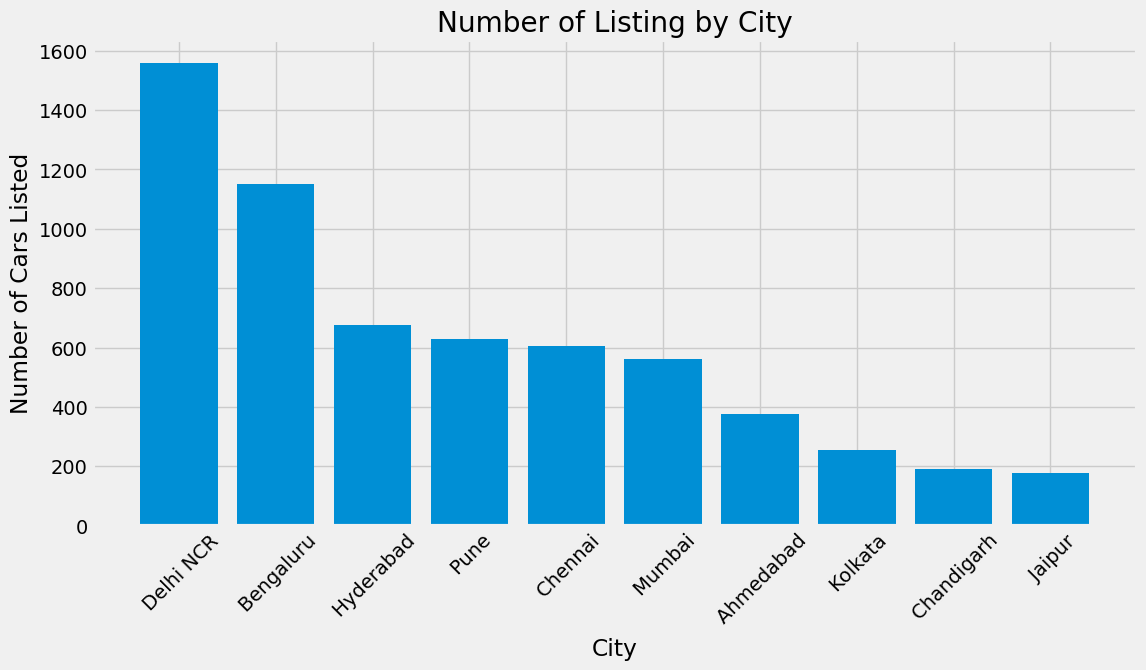

In [43]:
plt.figure(figsize=(12,6))

car_count_by_city = df['city'].value_counts()
sorted_cities = car_count_by_city.sort_values(ascending=False)

plt.bar(sorted_cities.index, sorted_cities.values, color='#008FD5')

plt.xlabel('City')
plt.ylabel('Number of Cars Listed')
plt.title('Number of Listing by City')
plt.xticks(rotation=45)
plt.show()

### 💡 Insight

- Delhi NCR: The region of Delhi NCR has the highest number of cars listed, with a count of 1559. This indicates a significant demand for used cars in the region.
- Bengaluru: Bengaluru comes in second place with 1152 listings. This suggests that the market for used cars in Bengaluru is also substantial.
- Hyderabad: Hyderabad ranks third on the list, with 675 cars listed. It appears to be a city with a considerable number of used car buyers.
- Pune: With 630 listings, Pune demonstrates a significant presence in the used car market, securing the fourth spot.
- Chennai: Chennai follows closely behind Pune, with 606 cars listed. This indicates a strong demand for used cars in the city.
- Mumbai: Mumbai, a bustling metropolitan city, has 561 listed cars. It shows a relatively high number of listings, reflecting the demand for pre-owned vehicles.
- Ahmedabad: Ahmedabad has 378 cars listed, signifying a moderately active used car market in the city.
- Kolkata: Kolkata records 256 listings, indicating a comparatively smaller used car market in the city.
- Chandigarh: Chandigarh has 192 cars listed, suggesting a moderate demand for used cars in this region.
- Jaipur: Jaipur rounds up the top ten cities with 178 listings. It represents a smaller used car market compared to other cities on the list.

### Are there specific cities where certain manufacturers are particularly popular?

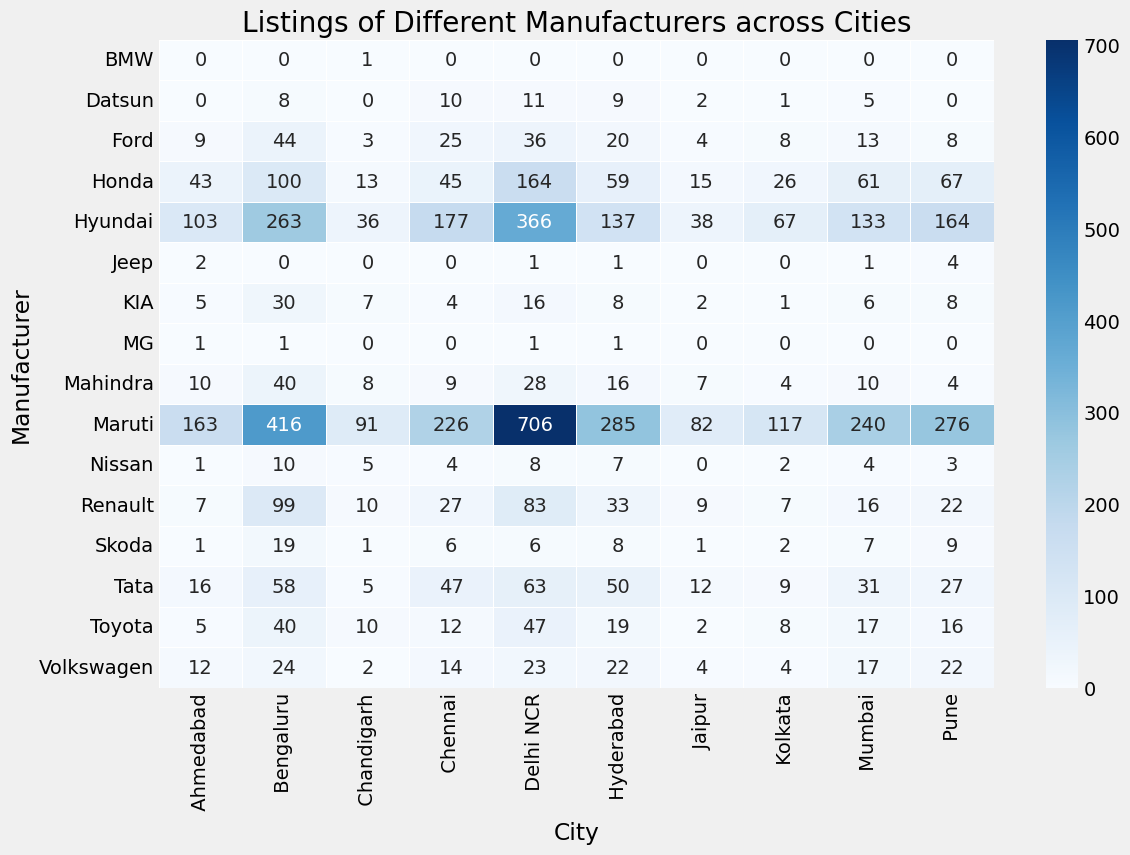

In [44]:
plt.figure(figsize=(12,8))

pivot_table = df.pivot_table(index='car_manufacturer', columns='city', aggfunc='size', fill_value=0)
pivot_table = pivot_table.iloc[:, :]

sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='d', linewidths=0.5)

plt.title('Listings of Different Manufacturers across Cities')
plt.xlabel('City')
plt.ylabel('Manufacturer')
plt.xticks(rotation=90)
plt.show()

#### Top 10 Car Manufacturers in each city

In [45]:
# Get the top 10 listed models for each city
top_10_manufacturers = {}
for city in pivot_table.columns:
    top_10_manufacturers[city] = pivot_table[city].nlargest(10).index.tolist()

# Create a DataFrame of the top 10 listed models for each city
top_10_manufacturers_df = pd.DataFrame(top_10_manufacturers)

# Print the DataFrame
top_10_manufacturers_df

Ahmedabad   Bengaluru  Chandigarh     Chennai   Delhi NCR   Hyderabad   
0      Maruti      Maruti      Maruti      Maruti      Maruti      Maruti  \
1     Hyundai     Hyundai     Hyundai     Hyundai     Hyundai     Hyundai   
2       Honda       Honda       Honda        Tata       Honda       Honda   
3        Tata     Renault     Renault       Honda     Renault        Tata   
4  Volkswagen        Tata      Toyota     Renault        Tata     Renault   
5    Mahindra        Ford    Mahindra        Ford      Toyota  Volkswagen   
6        Ford    Mahindra         KIA  Volkswagen        Ford        Ford   
7     Renault      Toyota      Nissan      Toyota    Mahindra      Toyota   
8         KIA         KIA        Tata      Datsun  Volkswagen    Mahindra   
9      Toyota  Volkswagen        Ford    Mahindra         KIA      Datsun   

       Jaipur     Kolkata      Mumbai        Pune  
0      Maruti      Maruti      Maruti      Maruti  
1     Hyundai     Hyundai     Hyundai     Hyundai  
2       Honda       Honda       Honda       Honda  
3        Tata        Tata        Tata        Tata  
4     Renault        Ford      Toyota     Renault  
5    Mahindra      Toyota  Volkswagen  Volkswagen  
6        Ford     Renault     Renault      Toyota  
7  Volkswagen    Mahindra        Ford       Skoda  
8      Datsun  Volkswagen    Mahindra        Ford  
9         KIA      Nissan       Skoda         KIA

###  Are there specific cities where certain car models are particularly popular?

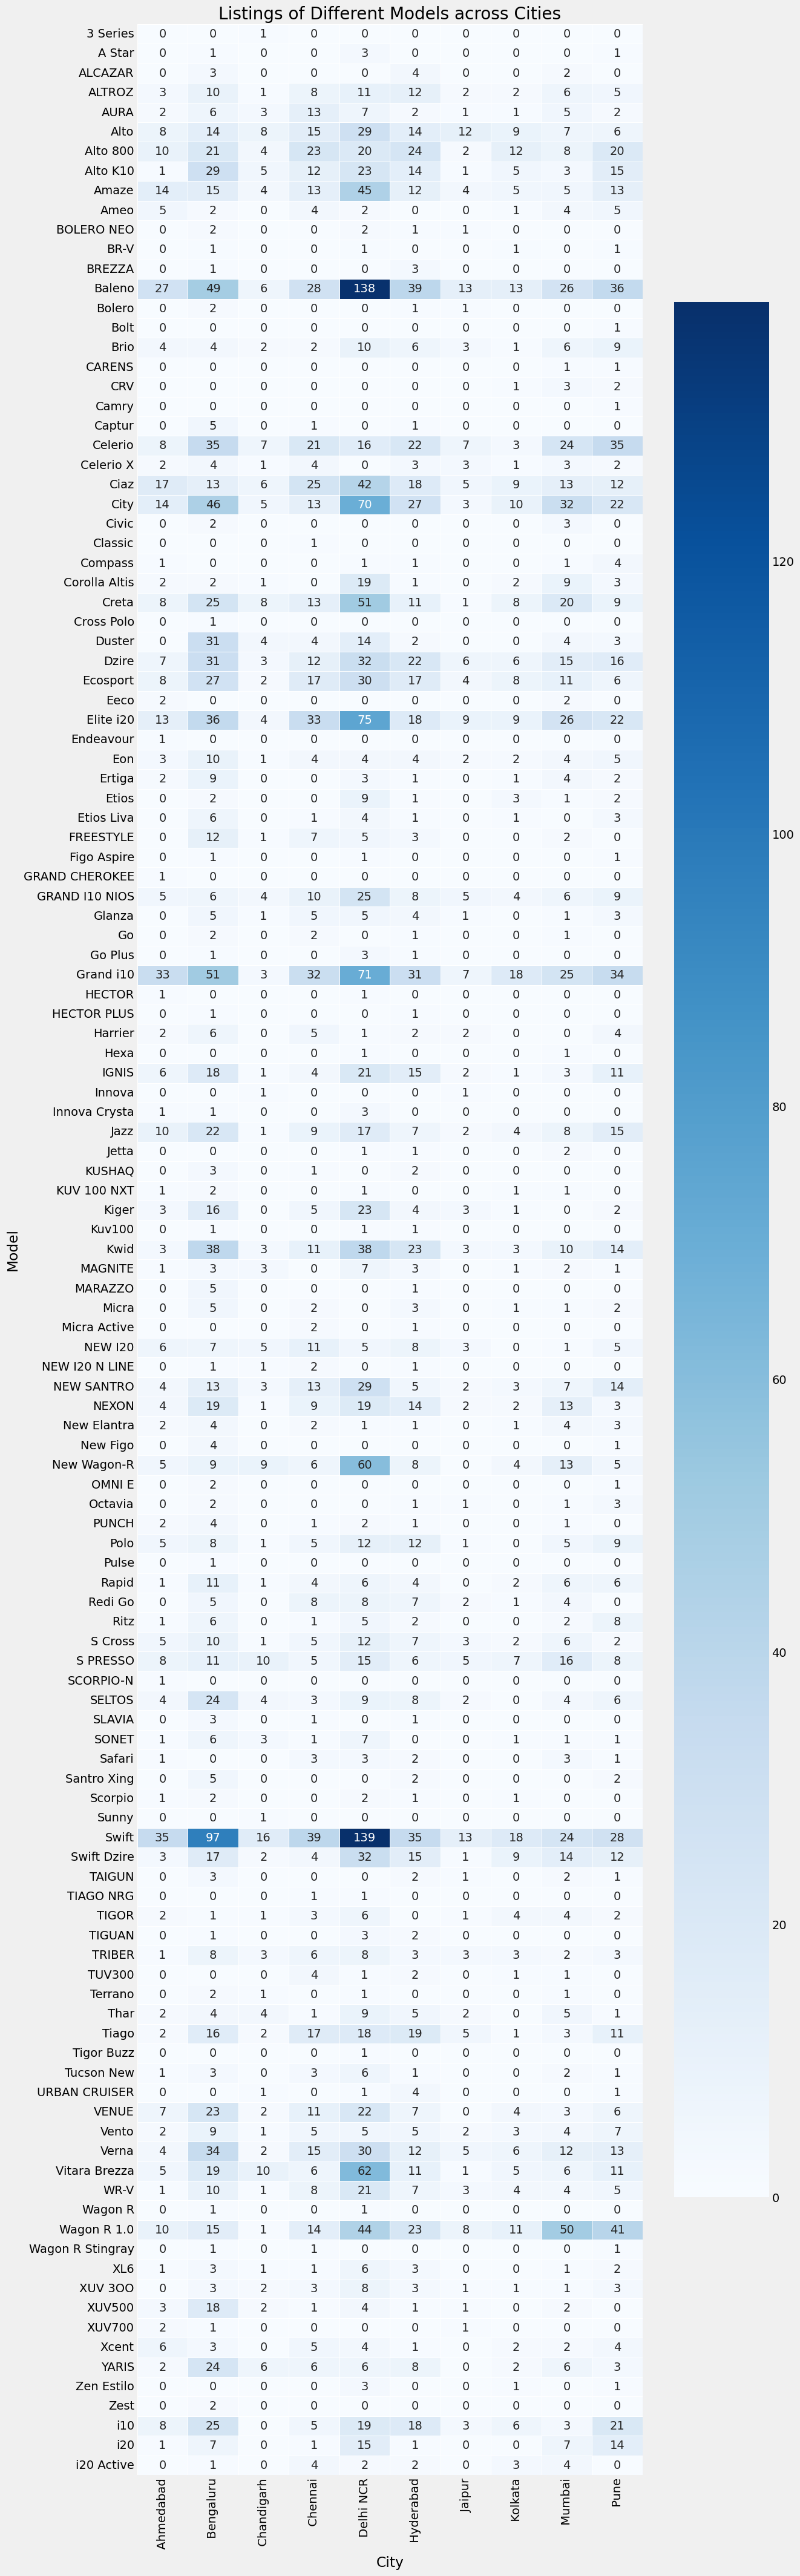

In [46]:
plt.figure(figsize=(12,50))

pivot_table = df.pivot_table(index='car_model', columns='city', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='d', linewidths=0.5)

plt.title('Listings of Different Models across Cities')
plt.xlabel('City')
plt.ylabel('Model')
plt.xticks(rotation=90)
plt.show()

#### Top 10 Car Models in each city

In [47]:
# Get the top 10 listed models for each city
top_10_models = {}
for city in pivot_table.columns:
    top_10_models[city] = pivot_table[city].nlargest(10).index.tolist()

# Create a DataFrame of the top 10 listed models for each city
top_10_models_df = pd.DataFrame(top_10_models)

# Print the DataFrame
top_10_models_df

Ahmedabad  Bengaluru     Chandigarh    Chennai      Delhi NCR   
0        Swift      Swift          Swift      Swift          Swift  \
1    Grand i10  Grand i10       S PRESSO  Elite i20         Baleno   
2       Baleno     Baleno  Vitara Brezza  Grand i10      Elite i20   
3         Ciaz       City    New Wagon-R     Baleno      Grand i10   
4        Amaze       Kwid           Alto       Ciaz           City   
5         City  Elite i20          Creta   Alto 800  Vitara Brezza   
6    Elite i20    Celerio        Celerio    Celerio    New Wagon-R   
7     Alto 800      Verna         Baleno   Ecosport          Creta   
8         Jazz     Duster           Ciaz      Tiago          Amaze   
9  Wagon R 1.0      Dzire          YARIS       Alto    Wagon R 1.0   

     Hyderabad          Jaipur      Kolkata       Mumbai         Pune  
0       Baleno          Baleno    Grand i10  Wagon R 1.0  Wagon R 1.0  
1        Swift           Swift        Swift         City       Baleno  
2    Grand i10            Alto       Baleno       Baleno      Celerio  
3         City       Elite i20     Alto 800    Elite i20    Grand i10  
4     Alto 800     Wagon R 1.0  Wagon R 1.0    Grand i10        Swift  
5         Kwid         Celerio         City      Celerio         City  
6  Wagon R 1.0       Grand i10         Alto        Swift    Elite i20  
7      Celerio           Dzire         Ciaz        Creta          i10  
8        Dzire            Ciaz    Elite i20     S PRESSO     Alto 800  
9        Tiago  GRAND I10 NIOS  Swift Dzire        Dzire        Dzire

### Do certain cities have a higher listing of petrol or diesel cars?

In [48]:
fuel_type = filtered_df.groupby(['city', 'fuel_type']).size().unstack()
fuel_type

fuel_type      CNG  Diesel  LPG  Petrol
city                                   
 Ahmedabad    18.0    43.0  NaN   317.0
 Bengaluru     6.0   207.0  NaN   939.0
 Chandigarh    8.0    37.0  NaN   146.0
 Chennai       5.0    84.0  NaN   517.0
 Delhi NCR   194.0   186.0  NaN  1179.0
 Hyderabad     7.0   107.0  1.0   560.0
 Jaipur        8.0    18.0  NaN   152.0
 Kolkata       2.0    30.0  NaN   224.0
 Mumbai      105.0    78.0  NaN   378.0
 Pune         94.0    67.0  NaN   469.0

<Figure size 2000x800 with 0 Axes>

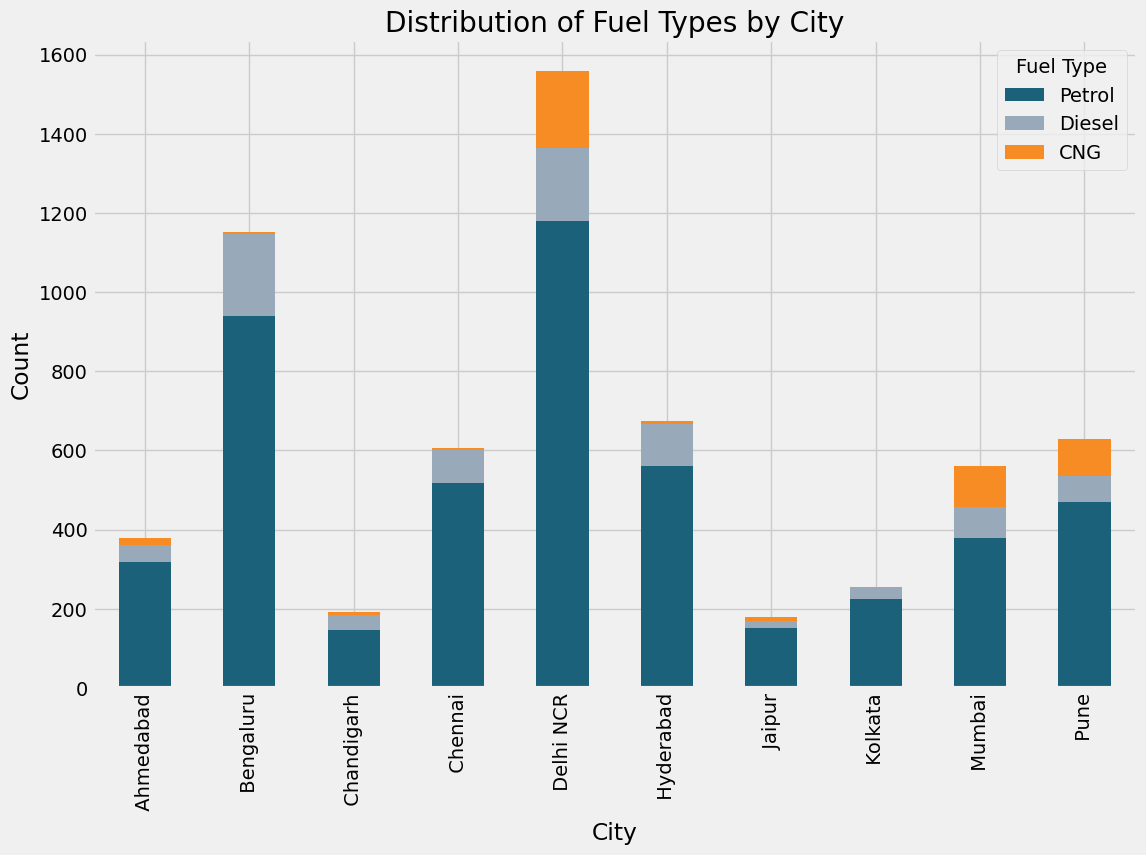

In [49]:
plt.figure(figsize=(20, 8))

# Filtering "LPG" fuel type, because it has just one listing
filtered_df = df[df['fuel_type'] != 'LPG']

# Grouping data by city and fuel type and getting the count
fuel_type = filtered_df.groupby(['city', 'fuel_type']).size().unstack()

# Sorting fuel types within each city based on total counts
sorted_fuel_type = fuel_type.sum().sort_values(ascending=False).index
fuel_type = fuel_type[sorted_fuel_type]

colors= ['#1a6179', '#98aab9', '#f88c24']

fig, ax = plt.subplots(figsize=(12, 8))
fuel_type.plot(kind='bar', stacked=True, ax=ax, color=colors)

plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Fuel Types by City')
plt.legend(title='Fuel Type')
plt.show()

### 💡 Insight

#### Petrol Cars:
Among the analyzed cities, the highest demand for petrol cars was observed in Delhi NCR with 1179 listings. This indicates a strong preference for petrol cars in the national capital region. Other cities with significant demand for petrol cars include Bengaluru (939 listings), Hyderabad (560 listings) and Chennai (517 listings), showcasing the popularity of petrol cars in these metropolitan areas. Mumbai (378 listings) and Pune (469 listings) also showed notable interest in petrol cars.

#### Diesel Cars:
In contrast to petrol cars, diesel cars has a low listings across the cities. The listing of diesel cars is relatively low in all the cities. Bengaluru had the highest number of diesel car listings with 207, Delhi NCR with 186 listings, indicating a considerable preference for this fuel type in the city. Hyderabad (107 listings), Chennai (84 listings) and Mumbai (78 listings) also exhibited significant demand for diesel cars.

#### CNG Cars:
CNG cars, which run on compressed natural gas, has the lowest overall demand across all cities. Delhi NCR exhibited the highest demand for CNG cars, with 194 listings. Mumbai and Pune were the next in line, with 105 and 94 CNG car listings, respectively. Other cities such as Ahmedabad, Bengaluru, Chandigarh, Chennai, Hyderabad, Jaipur, and Kolkata had a limited number of listings for CNG cars.

From the analysis, we can observe that the listings or demand for petrol cars was generally high in all the cities, with Delhi NCR being the city with the highest demand. Diesel cars also showed significant demand in some cities, whereas the demand for CNG cars remained relatively low across all cities.

In [50]:
'''
# Alternate way:

# Sort values within each column in descending order
fuel_type = fuel_type.reindex(sorted(fuel_type.columns, key=lambda x: fuel_type[x].sum(), reverse=True), axis=1)
'''

'\n# Alternate way:\n\n# Sort values within each column in descending order\nfuel_type = fuel_type.reindex(sorted(fuel_type.columns, key=lambda x: fuel_type[x].sum(), reverse=True), axis=1)\n'

### Is there a preference for manual or automatic transmission cars in specific locations? 

In [51]:
transmission_type = filtered_df.groupby(['city', 'transmission_type']).size().unstack()
transmission_type

transmission_type  Automatic  Manual
city                                
 Ahmedabad                82     296
 Bengaluru               412     740
 Chandigarh               32     160
 Chennai                 131     475
 Delhi NCR               274    1285
 Hyderabad               191     483
 Jaipur                   23     155
 Kolkata                  29     227
 Mumbai                  140     421
 Pune                    163     467

<Figure size 2000x800 with 0 Axes>

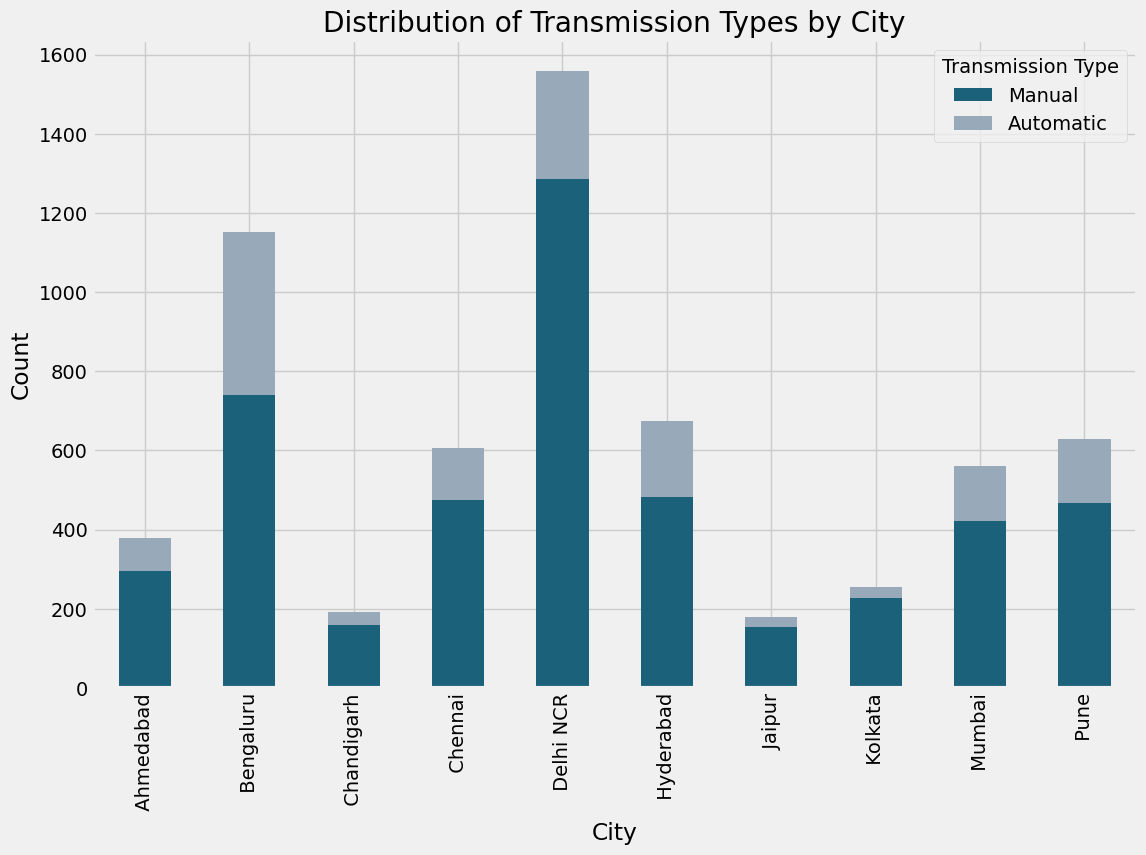

In [52]:
plt.figure(figsize=(20, 8))

# Grouping data by city and fuel type and getting the count
transmission_type = filtered_df.groupby(['city', 'transmission_type']).size().unstack()

# Sorting fuel types within each city based on total counts
sorted_transmission_type = transmission_type.sum().sort_values(ascending=False).index
transmission_type = transmission_type[sorted_transmission_type]

colors= ['#1a6179', '#98aab9']

fig, ax = plt.subplots(figsize=(12, 8))
transmission_type.plot(kind='bar', stacked=True, ax=ax, color=colors)

plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Transmission Types by City')
plt.legend(title='Transmission Type')
plt.show()

### 💡 Insight

#### Automatic Transmission:

- The city with the highest number of automatic transmission cars listed is Bengaluru, with a count of 412 cars. It is followed by Delhi NCR with 274 cars and Chennai with 131 cars.
- Ahmedabad and Jaipur have the lowest number of automatic transmission cars listed, with counts of 82 and 23 respectively.
- The overall distribution suggests that there is a preference for automatic transmission cars in cities such as Bengaluru, Delhi NCR, and Chennai.

#### Insights for Manual Transmission:

- The city with the highest number of manual transmission cars listed is Delhi NCR, with a count of 1285 cars. It is followed by Hyderabad with 483 cars and Pune with 467 cars.
- Chandigarh and Jaipur have the lowest number of manual transmission cars listed, with counts of 160 and 155 respectively.
- The overall distribution indicates a higher preference for manual transmission cars in cities like Delhi NCR, Hyderabad, and Pune.

Based on the analysis of the Cars24 used car listings dataset, it can be observed that there are varying preferences for transmission types across different cities in India. Bengaluru, Delhi NCR, and Chennai exhibit a higher preference for automatic transmission cars, while Delhi NCR, Hyderabad, and Pune show a greater inclination towards manual transmission cars.

### Which city has the highest average number of owners per car?

In [53]:
avg_owner = df.groupby('city')['owner'].mean().sort_values(ascending=False).round(3)
avg_owner

city
 Chennai       1.299
 Hyderabad     1.296
 Bengaluru     1.289
 Pune          1.286
 Jaipur        1.275
 Kolkata       1.234
 Mumbai        1.217
 Delhi NCR     1.205
 Ahmedabad     1.204
 Chandigarh    1.188
Name: owner, dtype: float64

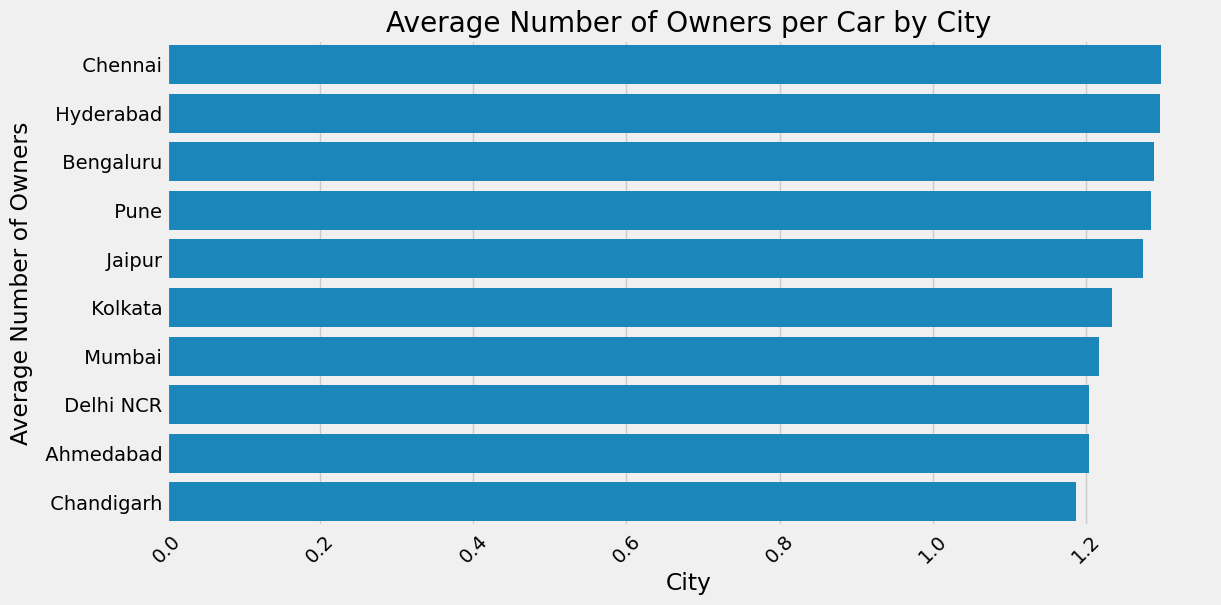

In [54]:
plt.figure(figsize=(12, 6))

avg_owner = df.groupby('city')['owner'].mean().sort_values(ascending=False)

sns.barplot(data=df, y=avg_owner.index, x=avg_owner.values, color='#008FD5')

plt.title('Average Number of Owners per Car by City')
plt.xlabel('City')
plt.ylabel('Average Number of Owners')
plt.xticks(rotation=45)
plt.show()

### 💡 Insight

City of Chennai has the highest average number of owners per car, with an average of approximately 1.299 owners per car. Following Chennai, the cities of Hyderabad and Bengaluru have the second and third highest averages, with 1.296 and 1.289 owners per car, respectively. The data indicates that car owners in Chennai tend to have a slightly higher average ownership rate compared to other cities in the dataset. 

It is worth noting that the differences in average number of owners per car across cities are relatively small, with Chennai, Hyderabad, and Bengaluru leading the pack by a narrow margin. On the other end of the spectrum, cities like Chandigarh, Ahmedabad, and Delhi NCR have relatively lower average ownership rates, with Chandigarh having the lowest average of approximately 1.188 owners per car.

### WWhat is the distribution of kilometers driven by cars in each city?

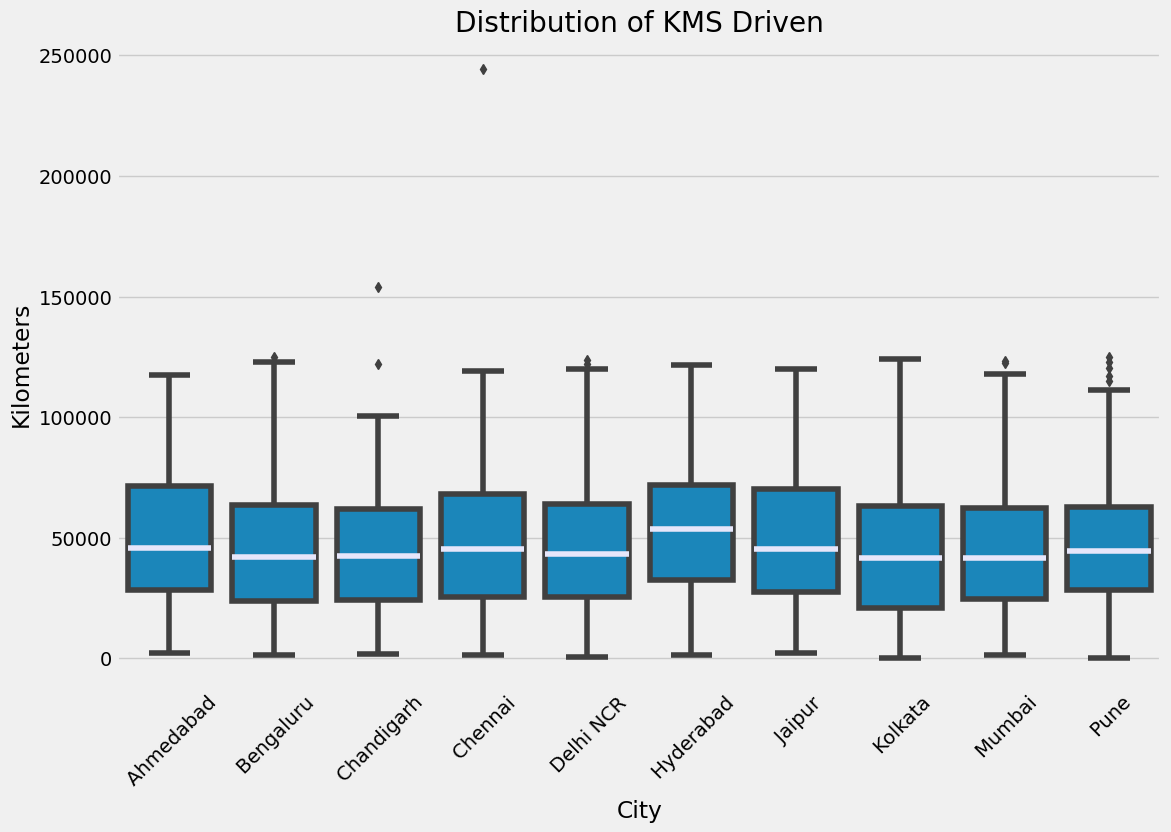

In [55]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=df, x='city', y='kms_driven', color='#008FD5',
            meanprops={'marker':'+', 'markeredgecolor':'red'}, medianprops={'color': 'lavender'})

plt.title('Distribution of KMS Driven')
plt.xlabel('City')
plt.ylabel('Kilometers')
plt.xticks(rotation=45)
plt.show()

### On average, which city has the longest driven cars?

In [56]:
avg_kms = df.groupby('city')['kms_driven'].mean().sort_values(ascending=False).round(2)
avg_kms

city
 Hyderabad     53705.45
 Ahmedabad     50146.67
 Jaipur        49362.01
 Chennai       47785.72
 Pune          46637.25
 Delhi NCR     46007.73
 Mumbai        44926.50
 Bengaluru     44859.81
 Chandigarh    44724.43
 Kolkata       43548.89
Name: kms_driven, dtype: float64

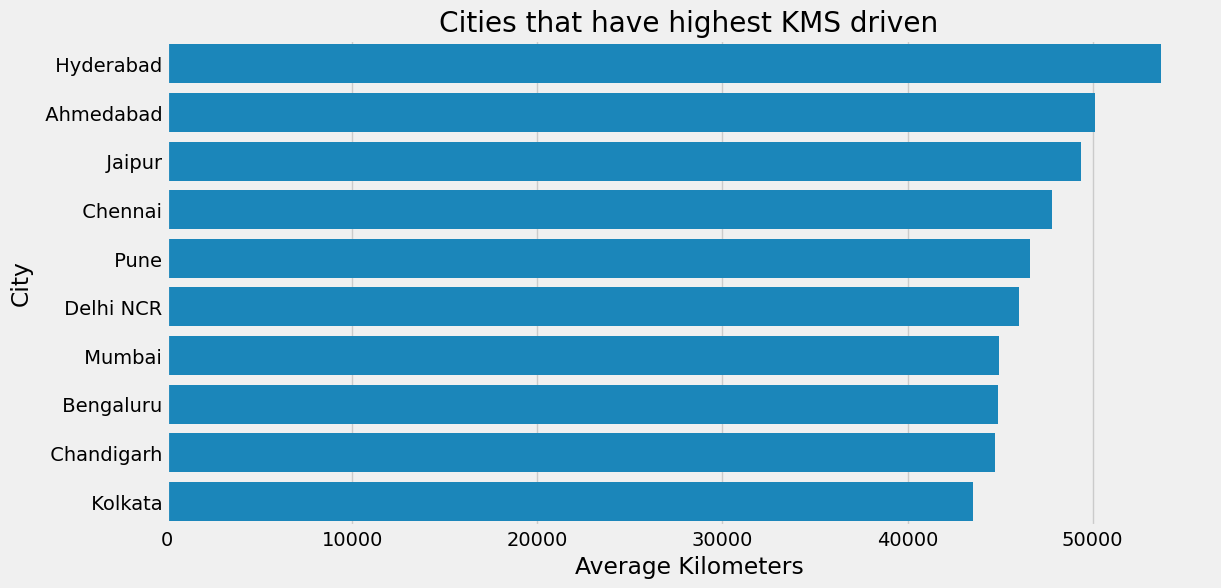

In [57]:
plt.figure(figsize=(12, 6))

avg_kms = df.groupby('city')['kms_driven'].mean().sort_values(ascending=False)
sns.barplot(data=df, y=avg_kms.index, x=avg_kms.values, color='#008FD5')

plt.title('Cities that have highest KMS driven')
plt.xlabel('Average Kilometers')
plt.ylabel('City')
plt.show()

### 💡 Insight

The highest average driven cars is Hyderabad, with an average of 53,705.45 kilometers. Following Hyderabad, the cities with the next highest average driven cars are Ahmedabad with 50,146.67 kilometers and Jaipur with 49,362.01 kilometers.

The analysis further reveals that Chennai has an average of 47,785.72 kilometers driven by used cars, while Pune and Delhi NCR have averages of 46,637.25 kilometers and 46,007.73 kilometers, respectively. Mumbai and Bengaluru also demonstrate relatively high averages with 44,926.50 kilometers and 44,859.81 kilometers, respectively. Additionally, Chandigarh and Kolkata have relatively lower average distances driven, with 44,724.43 kilometers and 43,548.89 kilometers, respectively.

This insight suggests that used cars in Hyderabad tend to have higher mileage compared to other cities in the dataset. The information can be valuable for individuals interested in purchasing used cars in these cities, as it provides an understanding of the typical distances traveled by listed cars.

### On average which manufacturer has the highest and lowest kilometers driven in each city?

#### Manufacturers That Have Highest kilometers driven in each city?

In [58]:
filtered_df = df[df['car_manufacturer'] != 'BMW']

manufacturer_by_city = filtered_df.groupby(['city', 'car_manufacturer'])['kms_driven'].mean().round(2).reset_index()
manufacturer_by_city = manufacturer_by_city.sort_values('kms_driven', ascending=False).groupby('city').head(1)
manufacturer_by_city

city car_manufacturer  kms_driven
10     Ahmedabad            Skoda    94301.00
28    Chandigarh             Ford    85932.67
19     Bengaluru               MG    83124.00
93        Jaipur           Toyota    77931.50
52       Chennai       Volkswagen    75425.93
131         Pune            Skoda    71625.67
121       Mumbai       Volkswagen    67446.24
70     Hyderabad            Honda    62084.90
66     Delhi NCR           Toyota    60014.74
97       Kolkata            Honda    56876.54

#### Manufacturers That Have Lowest kilometers driven in each city?

In [59]:
filtered_df = df[df['car_manufacturer'] != 'BMW']

manufacturer_by_city = filtered_df.groupby(['city', 'car_manufacturer'])['kms_driven'].mean().round(2).reset_index()
manufacturer_by_city = manufacturer_by_city.sort_values('kms_driven', ascending=False).groupby('city').tail(1)
manufacturer_by_city

city car_manufacturer  kms_driven
50       Chennai             Tata    32408.26
18     Bengaluru              KIA    31222.37
126         Pune              KIA    25588.50
72     Hyderabad             Jeep    23457.00
113       Mumbai              KIA    21426.83
8      Ahmedabad           Nissan    20158.00
53     Delhi NCR           Datsun    19472.00
36    Chandigarh            Skoda    14335.00
83        Jaipur           Datsun    13602.50
95       Kolkata           Datsun     6573.00

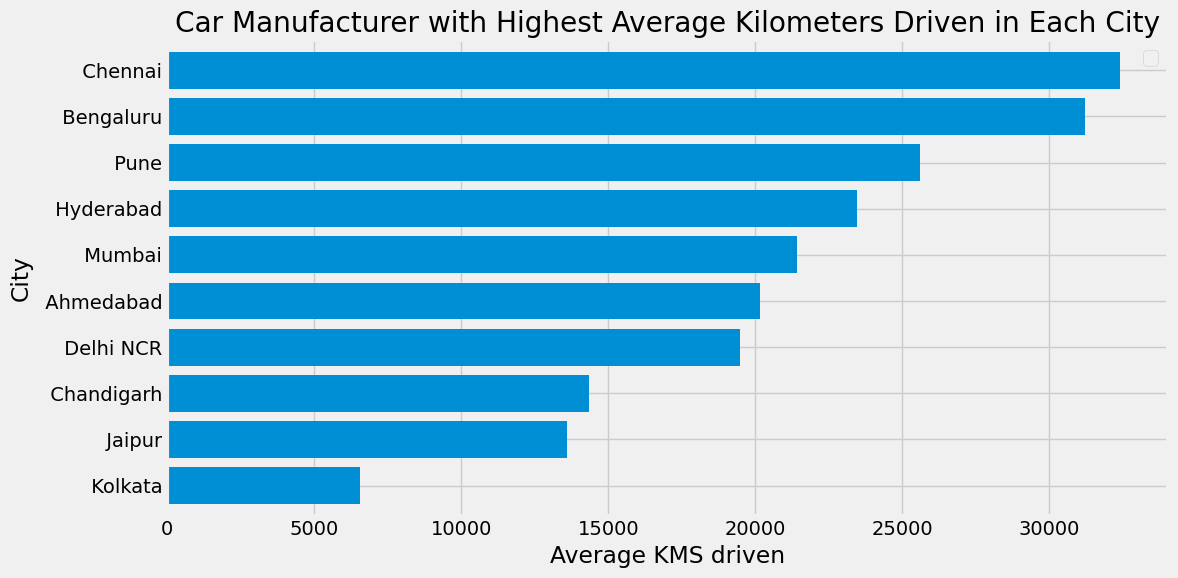

In [60]:
fig, ax = plt.subplots(figsize=(12, 6))

manufacturer_by_city.plot(kind='barh', x='city', ax=ax, color='#008FD5', width=0.8)

plt.xlabel('Average KMS driven')
plt.ylabel('City')
plt.title('Car Manufacturer with Highest Average Kilometers Driven in Each City')

# Reverse the order of the y-axis
ax.invert_yaxis()

plt.tight_layout()
plt.legend('')
plt.show()

### 💡 Insight

- Ahmedabad: The car manufacturer with the highest average kilometers driven in Ahmedabad is Skoda, with an average of 94,301 kilometers.
- Chandigarh: In Chandigarh, Ford is the car manufacturer with the highest average kilometers driven, with an average of 85,932.67 kilometers.
- Bengaluru: MG stands out as the car manufacturer with the highest average kilometers driven in Bengaluru, with an average of 83,124 kilometers.
- Jaipur: Toyota emerges as the car manufacturer with the highest average kilometers driven in Jaipur, with an average of 77,931.50 kilometers.
- Chennai: Among the cities analyzed, Volkswagen has the highest average kilometers driven in Chennai, with an average of 75,425.93 kilometers.
- Pune: Skoda leads in Pune, being the car manufacturer with the highest average kilometers driven, with an average of 71,625.67 kilometers.
- Mumbai: Volkswagen stands out as the car manufacturer with the highest average kilometers driven in Mumbai, with an average of 67,446.24 kilometers.
- Hyderabad: Honda has the highest average kilometers driven in Hyderabad, with an average of 62,084.90 kilometers.
- Delhi NCR: Toyota emerges as the car manufacturer with the highest average kilometers driven in Delhi NCR, with an average of 60,014.74 kilometers.
- Kolkata: Honda leads in Kolkata, being the car manufacturer with the highest average kilometers driven, with an average of 56,876.54 kilometers.

### Which city has the highest and lowest average kilometers driven by used cars?

In [61]:
city_avg_kms = df.groupby('city')['kms_driven'].mean().round(2).reset_index()
city_avg_kms = city_avg_kms.sort_values('kms_driven',ascending=False).groupby('city').head()
city_avg_kms

city  kms_driven
5    Hyderabad    53705.45
0    Ahmedabad    50146.67
6       Jaipur    49362.01
3      Chennai    47785.72
9         Pune    46637.25
4    Delhi NCR    46007.73
8       Mumbai    44926.50
1    Bengaluru    44859.81
2   Chandigarh    44724.43
7      Kolkata    43548.89

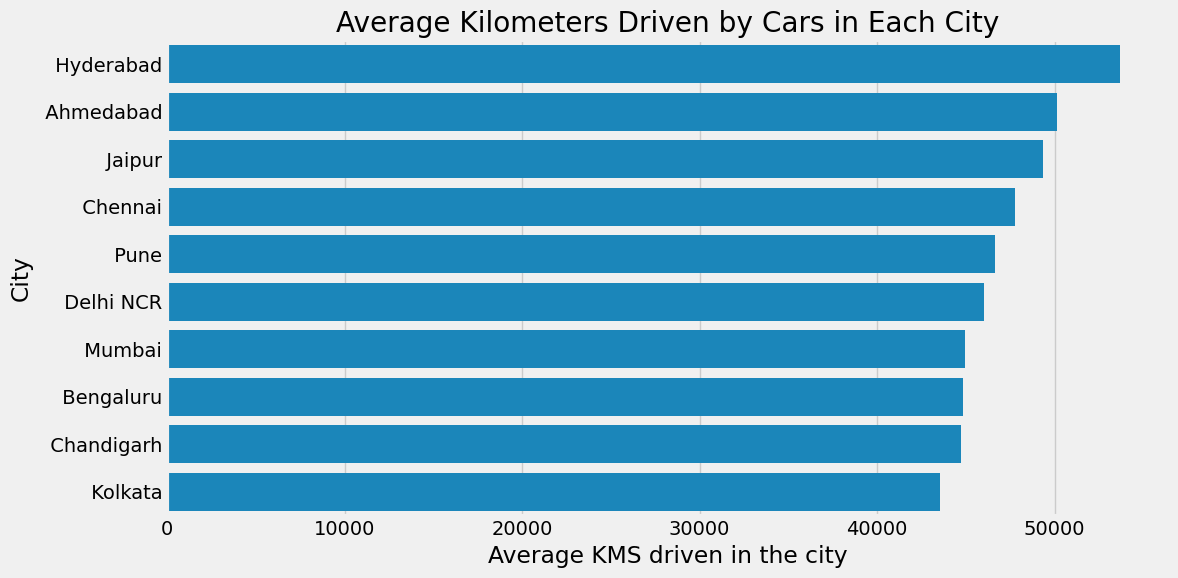

In [62]:
plt.figure(figsize=(12, 6))

                          
sns.barplot(data=city_avg_kms, y='city', x='kms_driven', color='#008FD5')

plt.xlabel('Average KMS driven in the city')
plt.ylabel('City')
plt.title('Average Kilometers Driven by Cars in Each City')

plt.tight_layout()
plt.show()

### 💡 Insight

The city with the highest average kilometers driven for used cars is Hyderabad, with an average of approximately 53,705.45 kilometers. This indicates that the used cars listed in Hyderabad have, on average, been driven the farthest among all the cities in the dataset.

##### The top cities with the highest average kilometers driven for used cars are as follows:

- Hyderabad - 53,705.45 kilometers
- Ahmedabad - 50,146.67 kilometers
- Jaipur - 49,362.01 kilometers
- Chennai - 47,785.72 kilometers
- Pune - 46,637.25 kilometers

On the other hand, the city with the lowest average kilometers driven is Kolkata, with an average of around 43,548.89 kilometers. This suggests that the used cars listed in Kolkata, on average, have been driven the shortest distance compared to the other cities in the dataset.

##### Conversely, the cities with the lowest average kilometers driven for used cars are:

- Kolkata - 43,548.89 kilometers
- Chandigarh - 44,724.43 kilometers
- Bengaluru - 44,859.81 kilometers
- Mumbai - 44,926.50 kilometers
- Delhi NCR - 46,007.73 kilometers

### What are the cities with the highest and lowest average car ages?

In [63]:
avg_car_age = df.groupby('city')['age'].mean().sort_values(ascending=False).round(2)

combine_avg_age = (avg_car_age.sum()/df['city'].nunique()).round(2)

print('All 10 cities average age:')
print('----------------------------------------------------------')
print(avg_car_age)

print('----------------------------------------------------------')
print('All 10 cities combined average age:')
print(combine_avg_age)

All 10 cities average age:
----------------------------------------------------------
city
 Pune          6.12
 Kolkata       5.91
 Mumbai        5.67
 Bengaluru     5.59
 Delhi NCR     5.43
 Hyderabad     5.09
 Ahmedabad     4.85
 Chennai       4.78
 Jaipur        4.42
 Chandigarh    4.33
Name: age, dtype: float64
----------------------------------------------------------
All 10 cities combined average age:
5.22


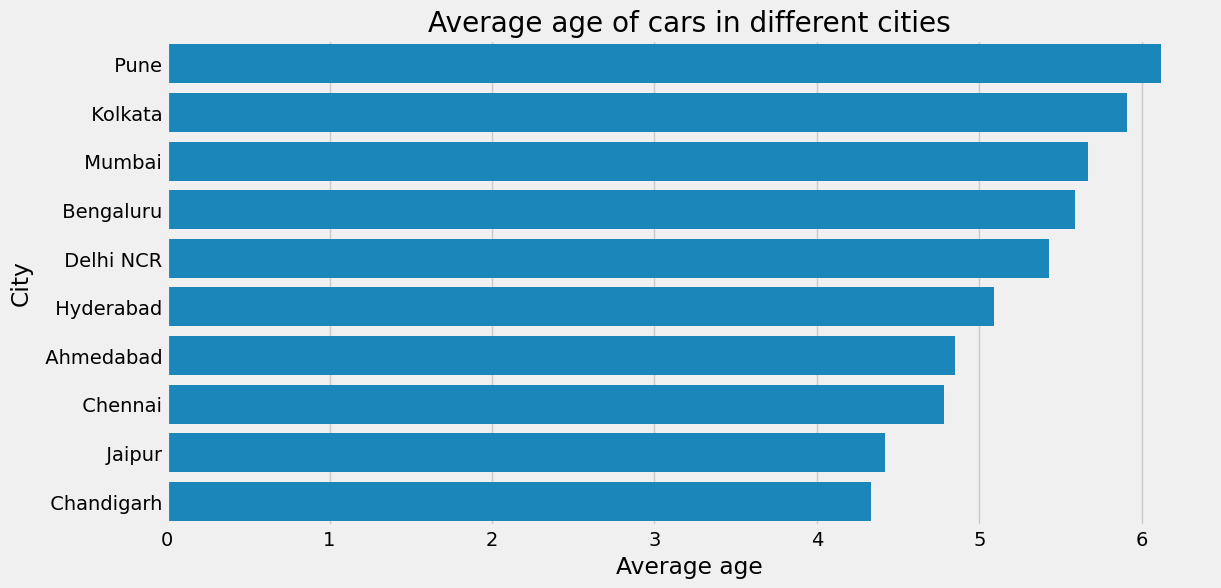

In [64]:
plt.figure(figsize=(12, 6))

avg_car_age = df.groupby('city')['age'].mean().sort_values(ascending=False).round(2)

sns.barplot(y=avg_car_age.index, x=avg_car_age.values, color='#008FD5')

plt.xlabel('Average age')
plt.ylabel('City')
plt.title('Average age of cars in different cities')
plt.show()

### 💡 Insight

#### Cities with the highest average car ages:
- Pune: The city of Pune has the highest average car age, with an average of 6.12 years. This suggests that cars listed on the website in Pune tend to be relatively older compared to other cities in the website.
- Kolkata: Kolkata follows closely with an average car age of 5.91 years. It indicates that the listed cars in Kolkata also have a relatively higher average age.
- Mumbai: With an average car age of 5.67 years, Mumbai has a slightly higher average age compared to the national average.

#### Cities with the lowest average car ages:
- Chandigarh: Chandigarh has the lowest average car age among the cities analyzed, with an average of 4.33 years. This implies that the cars listed in Chandigarh tend to be relatively newer compared to other cities in the dataset.
- Jaipur: Jaipur has the second-lowest average car age, with an average of 4.42 years. The city offers a range of relatively newer cars for sale.
- Chennai: Chennai has an average car age of 4.78 years, suggesting that the listed cars in the city are relatively newer compared to most other cities.

#### Other cities fall in between these extremes:
- Bengaluru: Bengaluru follows closely with an average car age of 5.59 years, suggesting that the listed cars in the city are relatively older compared to Chandigarh and Jaipur.
- Delhi NCR: The average car age in Delhi NCR stands at 5.43 years, indicating that the cars listed in the region have a moderate average age.
- Hyderabad: Hyderabad has an average car age of 5.09 years, which is slightly lower than the national average.
- Ahmedabad: The listed cars in Ahmedabad have an average age of 4.85 years, reflecting a relatively newer car market compared to several other cities.

### Which car model has the highest number of listings in each city?

In [65]:
model_listing_by_city = df.groupby('city')['car_model'].value_counts().reset_index()
model_listing_by_city = model_listing_by_city.sort_values('count', ascending=False).groupby('city').head(1)
model_listing_by_city

city    car_model  count
308    Delhi NCR        Swift    139
71     Bengaluru        Swift     97
601       Mumbai  Wagon R 1.0     50
682         Pune  Wagon R 1.0     41
232      Chennai        Swift     39
397    Hyderabad       Baleno     39
0      Ahmedabad        Swift     35
540      Kolkata        Swift     18
173   Chandigarh        Swift     16
488       Jaipur        Swift     13

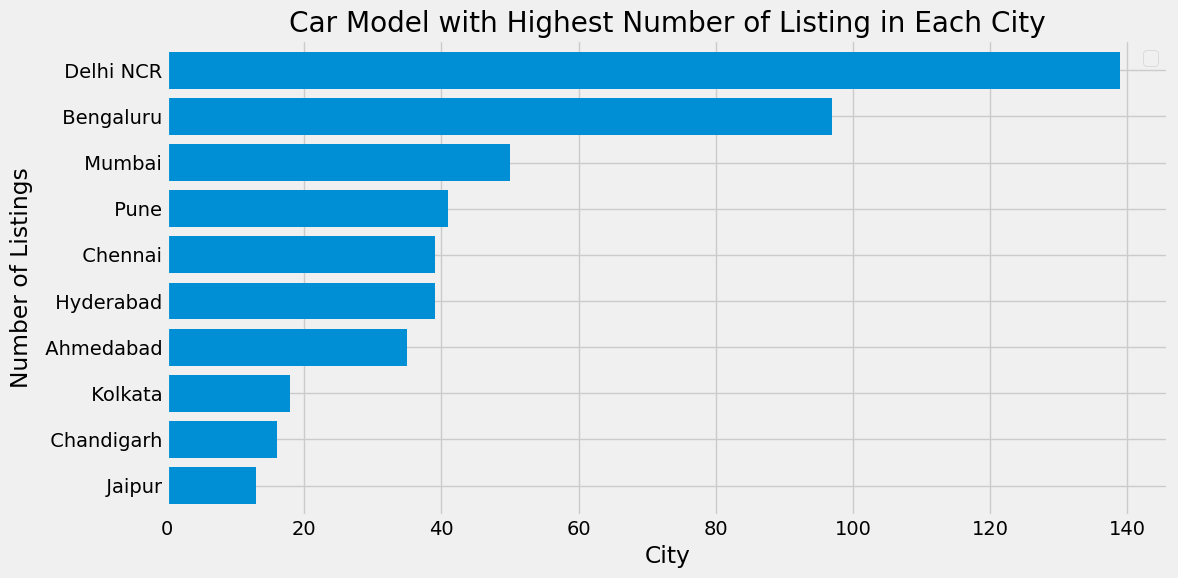

In [66]:
fig, ax = plt.subplots(figsize=(12, 6))

model_listing_by_city.plot(kind='barh', x='city', ax=ax, color='#008FD5', width=0.8)

plt.xlabel('City')
plt.ylabel('Number of Listings')
plt.title('Car Model with Highest Number of Listing in Each City')
ax.invert_yaxis()

plt.legend('')

plt.tight_layout()
plt.show()

### 💡 Insight

- Swift emerged as the most popular car model across multiple cities, including Delhi NCR, Bengaluru, Chennai, Ahmedabad, Kolkata, Chandigarh, and Jaipur. Its dominance in terms of listings suggests a high demand and popularity among used car buyers in these cities.

- Wagon R 1.0, on the other hand, secured the highest number of listings in both Mumbai and Pune. This model demonstrates its appeal and market share in these regions, potentially due to its features, affordability, and reliability.

- Interestingly, Baleno claimed the top spot in Hyderabad, indicating a strong preference for this particular model among used car buyers in the city.

### How many cars are there in each segment?

In [67]:
cars_segment_listing = df['segment'].value_counts()
cars_segment_listing

segment
Budget      3061
Mid-size    2968
Premium      158
Name: count, dtype: int64

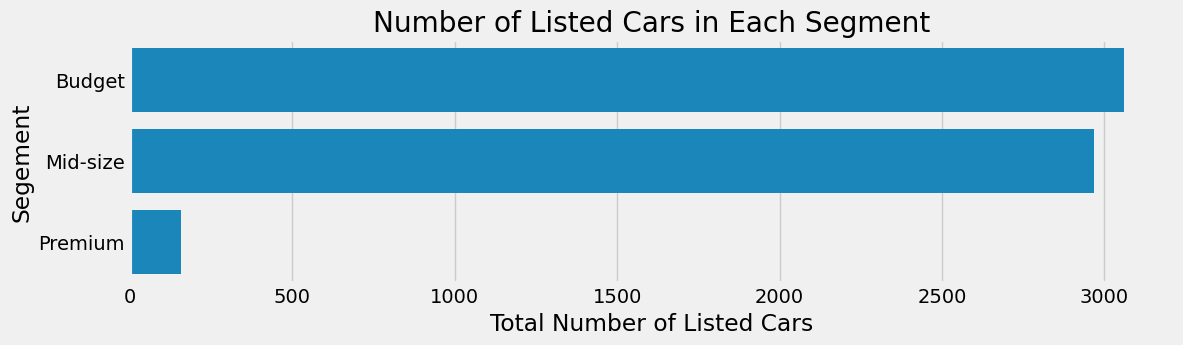

In [68]:
plt.figure(figsize=(12, 3))

sns.barplot(data=df, x=cars_segment_listing.values, y=cars_segment_listing.index, color='#008FD5', width=0.8)

plt.xlabel('Total Number of Listed Cars')
plt.ylabel('Segement')
plt.title('Number of Listed Cars in Each Segment')
plt.show()

### 💡 Insight
- Budget Segment: The dataset includes a total of 3,061 cars classified under the Budget segment. These cars are typically characterized by their affordability and are suitable for individuals seeking cost-effective options.

- Mid-size Segment: Within the Mid-size segment, there are 2,968 cars listed on the website. This segment caters to individuals who desire a balance between affordability and features, offering a range of options that provide decent performance and comfort.

- Premium Segment: The Premium segment consists of 158 cars listed on the website. These cars generally represent higher-end models, appealing to customers who prioritize comfort, advanced features, and superior performance.

### What is the distribution of listings of car segments among different car manufacturers?

In [69]:
car_segment = filtered_df.groupby(['car_manufacturer', 'segment']).size().unstack()

sorted_car_segment = car_segment.sum().sort_values(ascending=False).index
car_segment = car_segment[sorted_car_segment]
car_segment

segment           Budget  Mid-size  Premium
car_manufacturer                           
Datsun              46.0       NaN      NaN
Ford                41.0     128.0      1.0
Honda              225.0     362.0      6.0
Hyundai            751.0     701.0     32.0
Jeep                 NaN       4.0      5.0
KIA                  NaN      63.0     24.0
MG                   NaN       2.0      2.0
Mahindra             6.0     102.0     28.0
Maruti            1598.0    1004.0      NaN
Nissan              22.0      22.0      NaN
Renault            167.0     146.0      NaN
Skoda                5.0      43.0     12.0
Tata                90.0     197.0     31.0
Toyota              50.0     122.0      4.0
Volkswagen          60.0      71.0     13.0

<Figure size 1200x800 with 0 Axes>

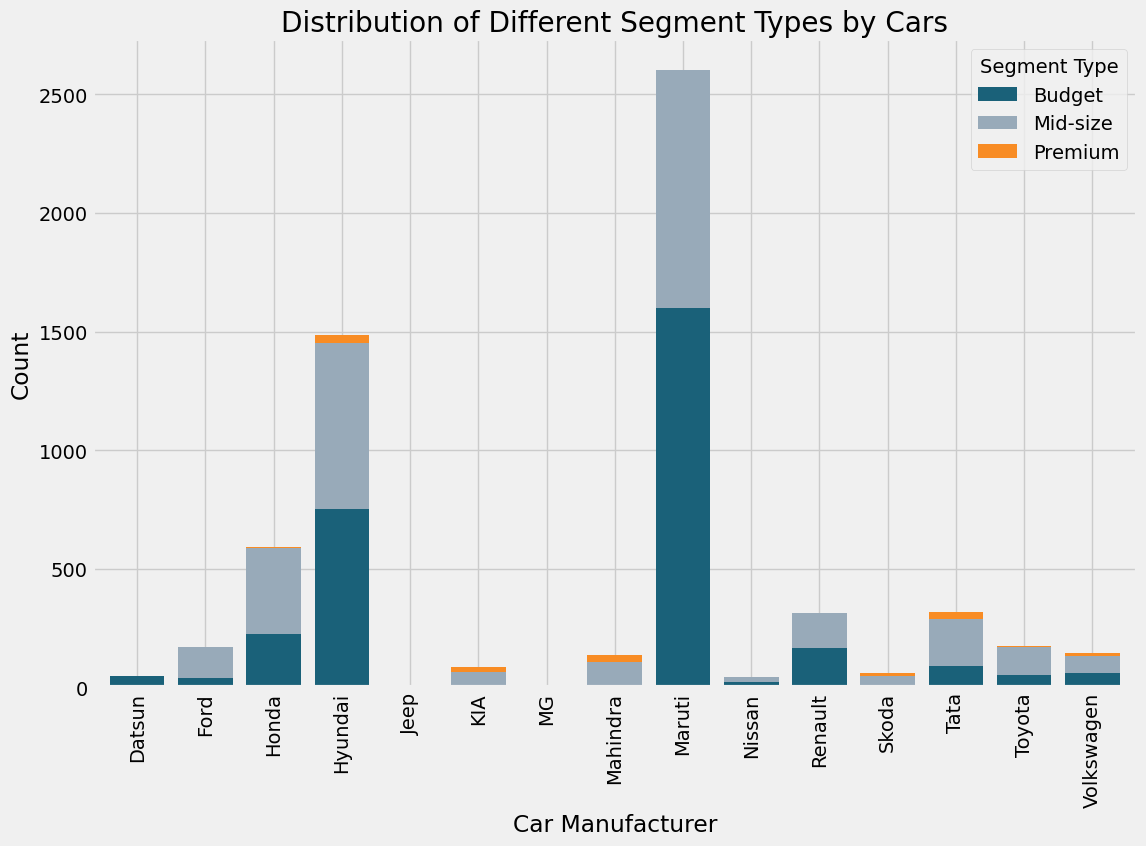

In [70]:
plt.figure(figsize=(12, 8))

colors= ['#1a6179', '#98aab9', '#f88c24']

fig, ax = plt.subplots(figsize=(12, 8))
car_segment.plot(kind='bar', stacked=True, ax=ax, color=colors, width=0.8)

plt.xlabel('Car Manufacturer')
plt.ylabel('Count')
plt.title('Distribution of Different Segment Types by Cars')
plt.legend(title='Segment Type')
plt.show()

### 💡 Insight

#### Budget Segment:
- Maruti leads the Budget segment with the highest number of listings, with 1,598 cars listed.
- Hyundai follows closely behind Maruti, with 751 cars listed in the Budget segment.
- Honda has a significant presence in the Budget segment with 225 cars listed.
- Other car manufacturers such as Ford, Tata, Mahindra, Renault, Toyota, Volkswagen, and Datsun also have a notable number of listings in the Budget segment.

#### Mid-size Segment:
- Maruti again dominates the Mid-size segment, with 1004 cars listed, showcasing their strong presence in this category.
- Hyundai is the second highest in the Mid-size segment, with 701 cars listed.
- Honda and Tata also have a considerable number of listings in the Mid-size segment.
- Other car manufacturers like Ford, Renault, Toyota, Mahindra also have a notable number of listings. And Volkswagen, Datsun, and Skoda also have listings in this segment in smaller numbers.

#### Premium Segment:
- Hyundai has the highest number of listings in the Premium segment, with 32 cars listed.
- Tata with 31 and Mahindra with 28 follow behind Hyundai with a significant number of listings in this category.
- Other car manufacturers like Ford, KIA, Mahindra, Jeep, MG, Skoda, Toyota, and Volkswagen also have listings in the Premium segment, in very smaller numbers.

### What are the popular car segment listings in each city?

In [71]:
city_popular_segment = df.groupby('city')['segment'].value_counts().groupby(level=0).head(1)
city_popular_segment = city_popular_segment.unstack()
city_popular_segment

segment      Budget  Mid-size
city                         
 Ahmedabad    207.0       NaN
 Bengaluru      NaN     668.0
 Chandigarh     NaN     106.0
 Chennai        NaN     323.0
 Delhi NCR    840.0       NaN
 Hyderabad      NaN     359.0
 Jaipur        94.0       NaN
 Kolkata      180.0       NaN
 Mumbai       302.0       NaN
 Pune         362.0       NaN

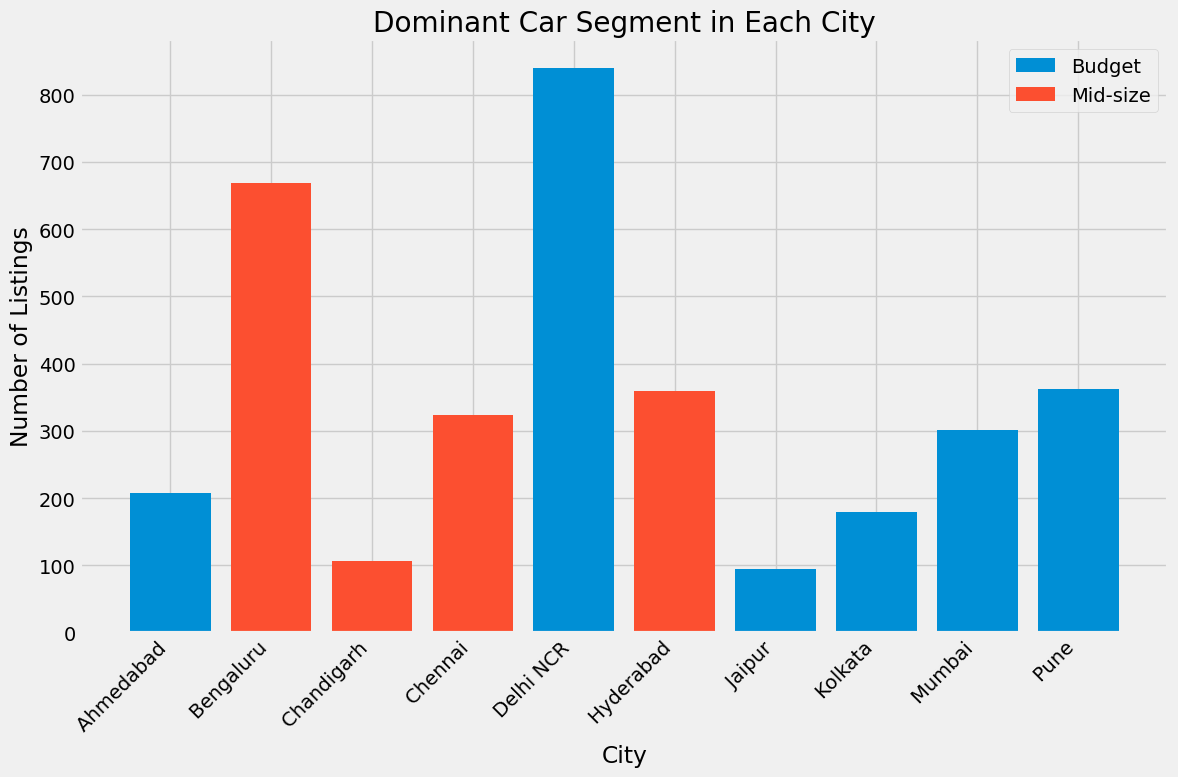

In [72]:
plt.figure(figsize=(12, 8))

# Get the unique segments
segments = city_popular_segment.columns.get_level_values('segment')

# Plot each segment separately
for segment in segments:
    plt.bar(city_popular_segment.index, city_popular_segment[segment], width=0.8, label=segment)

plt.xlabel('City')
plt.ylabel('Number of Listings')
plt.title('Dominant Car Segment in Each City')
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

### 💡 Insight

#### Budget Segment:

- The Budget segment dominates in the cities of Ahmedabad, Delhi NCR, Jaipur, Kolkata, Mumbai, and Pune.
- Among these cities, Delhi NCR has the highest number of Budget segment car listings with 840 entries.
- Ahmedabad, Mumbai, and Pune also have significant Budget segment listings with 207, 302, and 362 entries, respectively.
- Jaipur and Kolkata have a comparatively lower number of Budget segment listings with 94 and 180 entries, respectively.

#### Mid-size Segment:

- The Mid-size segment is more prevalent in the cities of Bengaluru, Chennai, and Hyderabad.
- Bengaluru leads the Mid-size segment with 668 listings, indicating a high demand for mid-sized cars in this city.
- Chennai follows with 323 Mid-size segment listings, suggesting a substantial market for mid-sized cars.
- Hyderabad has 359 Mid-size segment listings, indicating a strong presence in this category as well.
- Chandigarh also has some Mid-size segment listings, although it has a relatively lower count of 106 entries compared to other cities.

### How does the market share of car segments vary across different cities?

In [73]:
segment_city_count = df.groupby('city')['segment'].value_counts()
segment_city_count_sum = df.groupby('city')['segment'].count()

segment_city_share = (segment_city_count / segment_city_count_sum) * 100
segment_city_share = segment_city_share.unstack()
segment_city_share

segment         Budget   Mid-size   Premium
city                                       
 Ahmedabad   54.761905  41.534392  3.703704
 Bengaluru   37.326389  57.986111  4.687500
 Chandigarh  44.270833  55.208333  0.520833
 Chennai     44.719472  53.300330  1.980198
 Delhi NCR   53.880693  45.285439  0.833868
 Hyderabad   42.962963  53.185185  3.851852
 Jaipur      52.808989  44.382022  2.808989
 Kolkata     70.312500  29.296875  0.390625
 Mumbai      53.832442  42.959002  3.208556
 Pune        57.460317  40.317460  2.222222

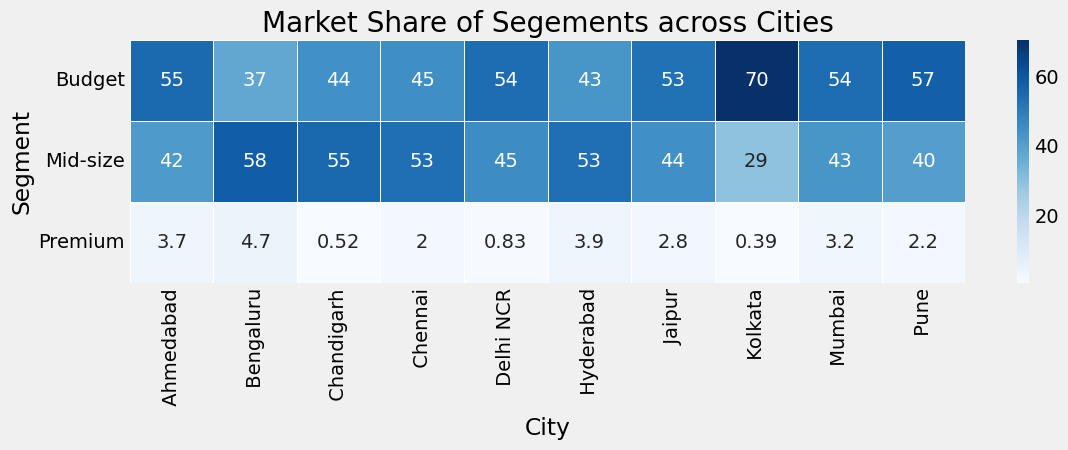

In [74]:
plt.figure(figsize=(12,3))

segment_city_share = segment_city_share.T

sns.heatmap(segment_city_share, cmap='Blues', annot=True, linewidths=0.5)

plt.title('Market Share of Segements across Cities')
plt.xlabel('City')
plt.ylabel('Segment')
plt.xticks(rotation=90)
plt.show()

### 💡 Insight

**Ahmedabad**:
- Budget segment listings constitute approximately 54.76% of the total listings in Ahmedabad.
- Mid-size cars follow closely with around 41.53% of the listings.
- Premium car segment constitutes a small proportion, only about 3.70% of the listings.

**Bengaluru**:
- Mid-size car listings are the most popular in Bengaluru, accounting for approximately 57.99% of the total listings.
- Budget car segment holds a significant share as well, with around 37.33% of the listings.
- Premium car segment is relatively less popular, making up only about 4.69% of the listings.

**Chandigarh**:
- Mid-size cars dominate the used car market in Chandigarh, representing around 55.21% of the listings.
- Budget car segment follows closely with approximately 44.27% of the listings.
- Premium car listings are minimal, constituting only about 0.52% of the total listings.

**Chennai**:
- Budget car segment holds a substantial share in Chennai, making up around 44.72% of the listings.
- Mid-size cars are also popular, accounting for approximately 53.30% of the listings.
- Premium car segment constitutes a relatively smaller proportion of about 1.98% of the listings.

**Delhi NCR**:
- Budget car segment dominates the used car market in Delhi NCR, representing around 53.88% of the listings.
- Mid-size cars follow closely with approximately 45.29% of the listings.
- Premium car listings are relatively low, constituting only about 0.83% of the total listings.

**Hyderabad**:
- Mid-size car listings are the most popular in Hyderabad, accounting for approximately 53.19% of the total listings.
- Budget car segment holds a significant share as well, with around 42.96% of the listings.
- Premium car segment is relatively less popular, making up only about 3.85% of the listings.

**Jaipur**:
- Budget car segment dominates the used car market in Jaipur, representing around 52.81% of the listings.
- Mid-size cars follow closely with approximately 44.38% of the listings.
- Premium car listings constitute around 2.81% of the total listings.

**Kolkata**:
- Budget car segment holds a vast majority of the used car listings in Kolkata, representing approximately 70.31% of the total listings.
- Mid-size car listings are relatively less popular, accounting for around 29.30% of the listings.
- Premium car segment is the least popular, making up only about 0.39% of the listings.

**Mumbai**:
- Budget car segment dominates the used car market in Mumbai, representing approximately 53.83% of the listings.
- Mid-size cars follow closely with approximately 42.96% of the listings.
- Premium car listings constitute around 3.21

**Pune**:
- Budget car segment dominates the used car market in Pune, representing around 57.46% of the listings.
- Mid-size cars follow closely with approximately 40.31% of the listings.
- Premium car listings constitute around 2.22% of the total listings.

### Do certain segments tend to have cars with a higher number of previous owners?

In [75]:
segment_owner_hist = df.groupby('segment')['owner'].mean()
segment_owner_hist.sort_values(ascending=False)
segment_owner_hist

segment
Budget      1.298595
Mid-size    1.212264
Premium     1.082278
Name: owner, dtype: float64

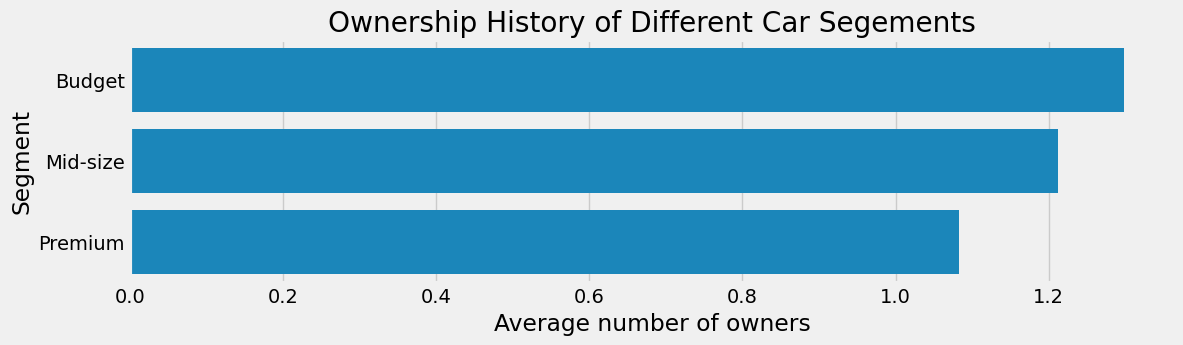

In [76]:
plt.figure(figsize=(12,3))

sns.barplot(data=df, y=segment_owner_hist.index, x=segment_owner_hist.values, color='#008FD5', width=0.8)

plt.title('Ownership History of Different Car Segements')
plt.xlabel('Average number of owners')
plt.ylabel('Segment')
plt.show()

### 💡 Insight

- **Budget Segment**: The analysis revealed that cars falling under the budget segment exhibit a slightly higher average ownership history compared to other segments. On average, the budget segment cars have a history of 1.298595 ownerships per vehicle. This indicates that these cars have changed hands more frequently, possibly due to their affordability and popularity among first-time car owners or those seeking budget-friendly options.

- **Mid-size Segment**: Cars in the mid-size segment show a moderate average ownership history of 1.212264 per vehicle. These vehicles might appeal to a broader audience as they strike a balance between affordability and features.

- **Premium Segment**: In contrast, the premium segment vehicles have the lowest average ownership history of 1.082278 per car. This suggests that these higher-end cars tend to remain with their owners for a longer duration before being listed for sale. The reasons for this could vary, such as higher initial investment, a more selective target audience.

### What is the average age of cars for each car segment?

In [77]:
segment_avg_age = df.groupby('segment')['age'].mean().reset_index()
segment_avg_age

segment       age
0    Budget  6.728847
1  Mid-size  4.115566
2   Premium  2.658228

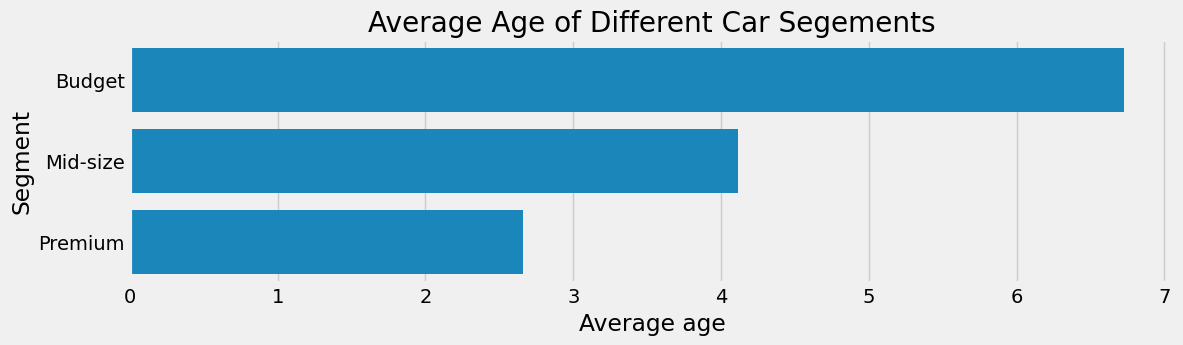

In [78]:
plt.figure(figsize=(12,3))

sns.barplot(data=segment_avg_age, y='segment', x='age', color='#008FD5', width=0.8)

plt.title('Average Age of Different Car Segements')
plt.xlabel('Average age')
plt.ylabel('Segment')
plt.show()

### 💡 Insight

- **Budget Segment**: The average age of cars in the budget segment is approximately 6.73 years. This suggests that the majority of cars listed in the budget segment are relatively older compared to other segments. It indicates that buyers looking for affordable options may find a wide range of older vehicles in this segment.

- **Mid-size Segment**: The average age of cars in the mid-size segment is around 4.12 years. This implies that cars listed in this segment tend to be slightly newer compared to the budget segment. The mid-size segment offers a balance between affordability and relatively newer vehicles, making it an attractive option for buyers seeking a balance between price and age.

- **Premium Segment**: The average age of cars in the premium segment is approximately 2.66 years. This suggests that the cars listed in this segment are relatively newer compared to the other segments. Buyers interested in the premium segment can expect a higher likelihood of finding newer vehicles, which often come with advanced features, better condition.

### Do specific segments tend to have a preference for a particular transmission type?

In [79]:
segment_transmission_type = df.groupby(['segment', 'transmission_type']).size().unstack()
segment_transmission_type = segment_transmission_type.sort_values('segment', ascending=False)
segment_transmission_type

transmission_type  Automatic  Manual
segment                             
Premium                  109      49
Mid-size                1038    1930
Budget                   330    2731

<Figure size 1200x400 with 0 Axes>

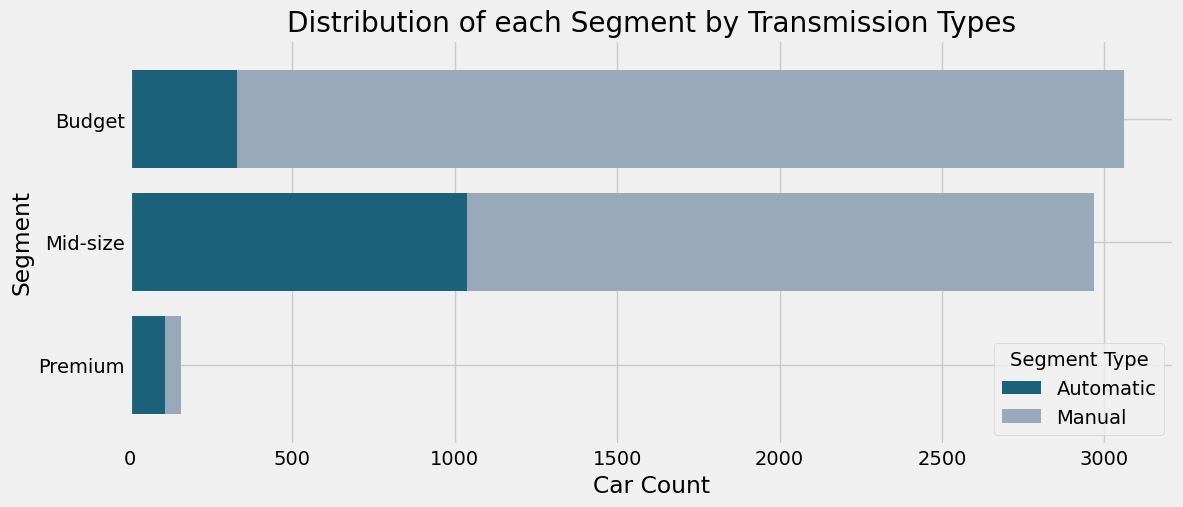

In [80]:
plt.figure(figsize=(12, 4))

colors= ['#1a6179', '#98aab9']

fig, ax = plt.subplots(figsize=(12, 5))
segment_transmission_type.plot(kind='barh', stacked=True, ax=ax, color=colors, width=0.8)

plt.xlabel('Car Count')
plt.ylabel('Segment')
plt.title('Distribution of each Segment by Transmission Types')
plt.legend(title='Segment Type')
plt.show()

### 💡 Insight

- **Budget Segment**:
Budget car segment exhibits a stronger preference for manual transmissions over automatic ones. Among the cars listed in the budget segment, 330 vehicles have automatic transmissions, whereas a significantly larger number of 2731 cars have manual transmissions. This observation could be attributed to various factors, such as cost-effectiveness and the relatively simpler maintenance associated with manual transmissions.

- **Mid-size Segment**:
In the mid-size car segment, there is a more balanced distribution between automatic and manual transmissions. Out of the total cars listed in this category, 1038 cars have automatic transmissions, while 1930 have manual transmissions. This suggests that buyers in the mid-size segment are divided in their transmission preferences, with a significant number still opting for manual transmissions, possibly due to personal driving preferences or budget considerations.

- **Premium Segment**:
Premium car segment shows a preference for automatic transmissions. Out of the total number of cars listed in this segment, 109 vehicles are equipped with automatic transmissions, while only 49 have manual transmissions. This indicates a strong inclination towards the convenience and ease of driving offered by automatic transmissions among premium car buyers.

### Are certain segments more likely to have a particular fuel type?

In [81]:
filter_df = df[df['fuel_type'] != 'LPG']

segment_fuel_type = filter_df.groupby(['segment', 'fuel_type']).size().unstack()
segment_transmission_type = segment_fuel_type.sort_values('segment', ascending=False)
segment_transmission_type

fuel_type    CNG  Diesel  Petrol
segment                         
Premium      NaN    76.0    82.0
Mid-size   130.0   615.0  2223.0
Budget     317.0   167.0  2576.0

<Figure size 1200x300 with 0 Axes>

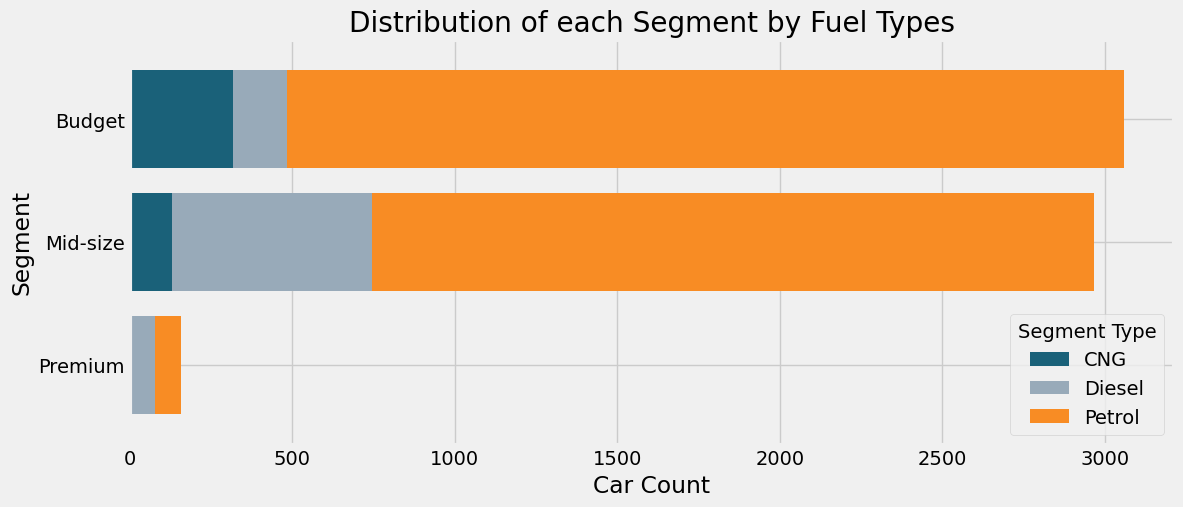

In [82]:
plt.figure(figsize=(12, 3))

colors= ['#1a6179', '#98aab9', '#f88c24']

fig, ax = plt.subplots(figsize=(12, 5))
segment_fuel_type.plot(kind='barh', stacked=True, ax=ax, color=colors, width=0.8)
ax.invert_yaxis()

plt.xlabel('Car Count')
plt.ylabel('Segment')
plt.title('Distribution of each Segment by Fuel Types')
plt.legend(title='Segment Type')
plt.show()

### 💡 Insight

- **Premium Segment**: In the Premium segment, there are no cars listed with CNG as their fuel type. However, Diesel and Petrol-powered vehicles are present, with 76 and 82 listings, respectively. This indicates that the Premium segment consists of Diesel and Petrol cars.

- **Mid-size Segment**: The Mid-size segment shows a more varied distribution of fuel types. It includes 130 listings for CNG-powered cars, 615 listings for Diesel cars, and the majority being 2223 listings for Petrol cars. This suggests that the Mid-size segment is dominated by Petrol cars, but there is also a significant representation of Diesel and CNG-powered vehicles.

- **Budget Segment**: In the Budget segment, CNG and Petrol cars are the most prevalent. There are 317 listings for CNG-powered cars and a substantial number of 2576 listings for Petrol cars. In contrast, Diesel cars have a relatively lower presence with 167 listings. Thus, the Budget segment primarily consists of CNG and Petrol cars.

### Is there a difference in the average kilometers driven among different car segments?

In [83]:
segment_avg_kms_driven = df.groupby('segment')['kms_driven'].mean().reset_index()
segment_avg_kms_driven = segment_avg_kms_driven.sort_values('kms_driven', ascending=False).round(2)
segment_avg_kms_driven

segment  kms_driven
0    Budget    52550.70
1  Mid-size    42067.33
2   Premium    31411.80

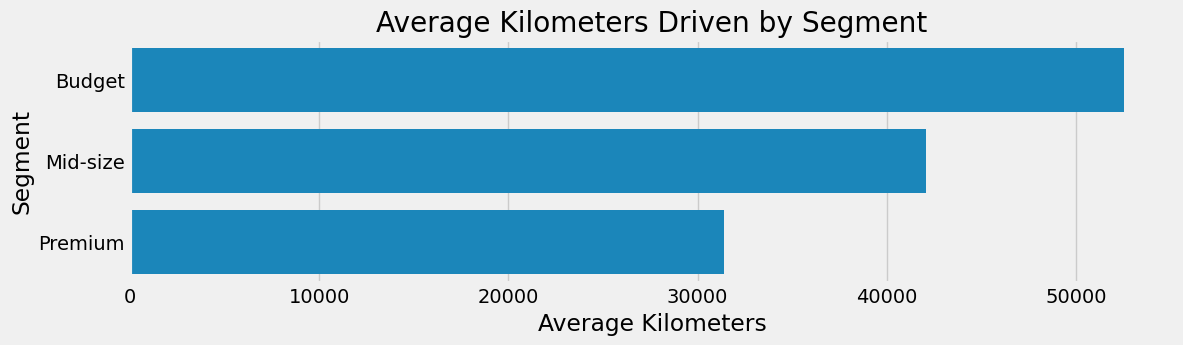

In [84]:
plt.figure(figsize=(12, 3))

sns.barplot(data=segment_avg_kms_driven, x='kms_driven', y='segment', color='#008FD5')
plt.xlabel('Average Kilometers')
plt.ylabel('Segment')
plt.title('Average Kilometers Driven by Segment')
plt.show()

### 💡 Insight

- **Budget Segment**: The average kilometers driven for cars falling under the "Budget" segment is approximately 52,550.70 kilometers.

- **Mid-size Segment**: Cars in the "Mid-size" segment have an average distance driven of about 42,067.33 kilometers.

- **Premium Segment**: The "Premium" segment, on the other hand, showcases a notably lower average kilometers driven, amounting to roughly 31,411.80 kilometers.

This disparity in average kilometers driven among the segments indicates that there are distinct usage patterns or preferences among car buyers in each segment. Budget segment cars have a higher average distance traveled, suggesting that they are likely used for more daily commuting or extensive travel purposes. In contrast, the "Premium" segment cars, with lower average kilometers driven, may be used for more occasional or specialized purposes, such as weekend driving or limited long-distance journeys.

### What is the listing share of different fuel types?

In [85]:
filter_df = df[df['fuel_type'] != 'LPG']

fuel_type_share = filter_df['fuel_type'].value_counts(normalize=True)*100
fuel_type_share

fuel_type
Petrol    78.903977
Diesel    13.870029
CNG        7.225994
Name: proportion, dtype: float64

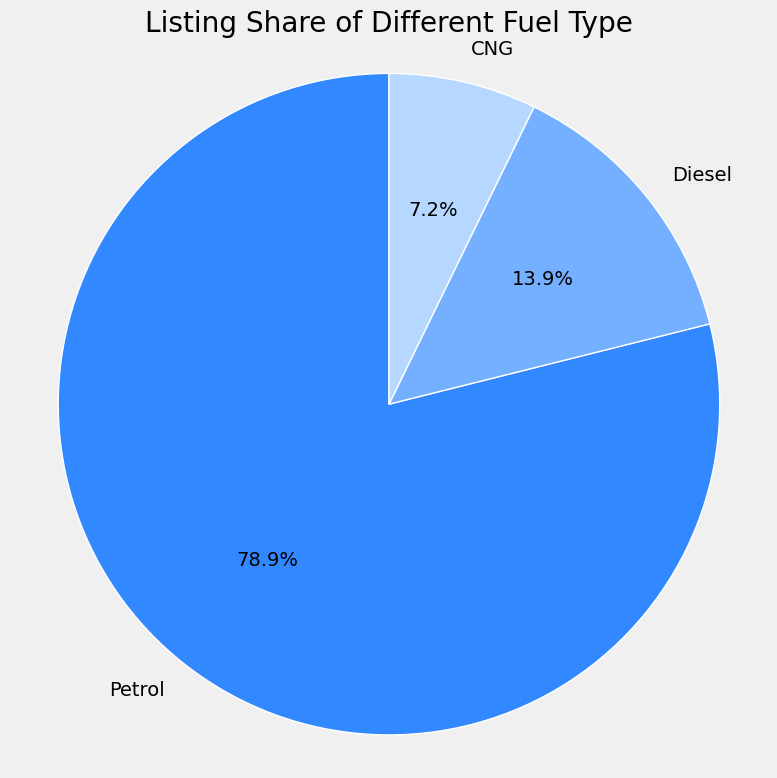

In [86]:
plt.figure(figsize=(8,8))

colors = ['#3288FF', '#74B0FF', '#B6D7FF']

wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}
textprops = {'color': 'sandybrown'}
textprops = {'color': 'black'}

labels = fuel_type_share.index

plt.pie(fuel_type_share, autopct='%1.1f%%', labels=labels, startangle=90, colors=colors, wedgeprops=wedgeprops, textprops=textprops)

plt.title('Listing Share of Different Fuel Type')
plt.axis('equal')
plt.tight_layout()
plt.show()

### 💡 Insight
- **Petrol**: Petrol-powered vehicles dominate the listings with a substantial share of 78.90%. This indicates that a significant majority of the used cars listed on the website are fueled by petrol.

- **Diesel**: The second most prevalent fuel type in the listings is diesel, accounting for approximately 13.87% of the total share. This suggests that a notable portion of the used cars available for sale on the platform run on diesel.

- **CNG**: The dataset also reveals that a smaller yet significant proportion of used cars, approximately 7.23%, are fueled by Compressed Natural Gas (CNG). CNG is considered a cleaner alternative fuel and may attract buyers who prioritize environmental sustainability.

### What is the distribution of fuel types among different manufacturers?

In [87]:
manf_fuel_share = filter_df.groupby('car_manufacturer')['fuel_type'].value_counts().unstack()
manf_fuel_share

fuel_type           CNG  Diesel  Petrol
car_manufacturer                       
BMW                 NaN     1.0     NaN
Datsun              NaN     NaN    46.0
Ford                4.0    60.0   106.0
Honda              15.0    47.0   531.0
Hyundai           114.0   171.0  1198.0
Jeep                NaN     5.0     4.0
KIA                 NaN    24.0    63.0
MG                  NaN     3.0     1.0
Mahindra            NaN    90.0    46.0
Maruti            298.0   264.0  2040.0
Nissan              NaN     5.0    39.0
Renault             1.0    48.0   264.0
Skoda               NaN    16.0    44.0
Tata               11.0    78.0   229.0
Toyota              3.0    16.0   157.0
Volkswagen          1.0    30.0   113.0

In [88]:
plt.figure(figsize=(12, 8))

colors= ['#98aab9', '#1a6179', '#f88c24']

fig, ax = plt.subplots(figsize=(12, 8))
manf_fuel_share.plot(kind='bar', stacked=True, ax=ax, color=colors, width=0.8)

plt.xlabel('Car Manufacturer')
plt.ylabel('Count')
plt.title('Distribution of Different Segment Types by Cars')
plt.legend(title='Segment Type')
plt.show()

<Figure size 1200x800 with 0 Axes>

### 💡 Insight

- **BMW**: Only one car from BMW is listed in the dataset, and that is Diesel fuel type.
- **Datsun**: Datsun has 46 cars listed, and all of them run on Petrol fuel. There are no listings for CNG or Diesel fuel type.
- **Ford**: Ford has a diverse range of fuel types listed. There are 4 CNG, 60 Diesel, and 106 Petrol cars available.
- **Honda**: Honda has a significant number of listings, with 15 CNG, 47 Diesel, and 531 Petrol cars.
- **Hyundai**: Hyundai has the highest number of listings in the dataset. There are 114 CNG, 171 Diesel, and 1198 Petrol cars available.
- **Jeep**: Jeep has a small number of listings, with 5 Diesel and 4 Petrol cars. There are no listings for CNG fuel type.
- **KIA**: KIA has 24 Diesel and 63 Petrol cars listed, but no CNG cars.
- **MG**: MG has limited listings, with 3 Diesel and 1 Petrol car. There are no CNG cars listed.
- **Mahindra**: Mahindra has 90 Diesel and 46 Petrol cars listed, but no CNG cars.
- **Maruti**: Maruti has the highest number of CNG listings, with 298 cars. Additionally, there are 264 Diesel and 2040 Petrol cars available.
- **Nissan**: Nissan has 5 Diesel and 39 Petrol cars listed, but no CNG cars.
- **Renault**: Renault has 1 CNG, 48 Diesel, and 264 Petrol cars available.
- **Skoda**: Skoda has 16 Diesel and 44 Petrol cars listed, but no CNG cars.
- **Tata**: Tata has 11 CNG, 78 Diesel, and 229 Petrol cars listed.
- **Toyota**: Toyota has 3 CNG, 16 Diesel, and 157 Petrol cars available.
- **Volkswagen**: Volkswagen has 1 CNG, 30 Diesel, and 113 Petrol cars listed.

### What is the average number of owners based on the type of fuel?

In [89]:
avg_owner_fuel_type = filter_df.groupby('fuel_type')['owner'].mean().sort_values(ascending=False)
avg_owner_fuel_type

fuel_type
Diesel    1.261072
Petrol    1.257324
CNG       1.172260
Name: owner, dtype: float64

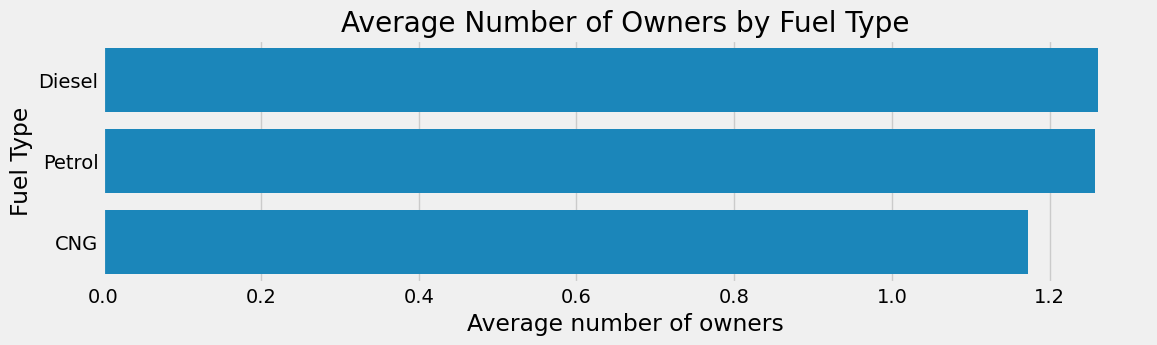

In [90]:
plt.figure(figsize=(12,3))

sns.barplot(y=avg_owner_fuel_type.index, x=avg_owner_fuel_type.values, color='#008FD5')

plt.title('Average Number of Owners by Fuel Type')
plt.xlabel('Average number of owners')
plt.ylabel('Fuel Type')
plt.show()

### 💡 Insight
- **Diesel**: For cars running on Diesel fuel, the average number of owners was found to be approximately 1.261072. This suggests that, on average, Diesel cars listed on the website have had around 1.261 previous owners.

- **Petrol**: Similarly, for cars fueled by Petrol, the average number of owners was approximately 1.257324. This indicates that Petrol cars listed on the website have had an average of around 1.257 previous owners, which is roughly similar to that of diesel cars.

- **CNG**: In the case of CNG-fueled cars, the average number of owners was observed to be approximately 1.172260. This suggests that CNG cars listed on the website have had an average of around 1.172 previous owners, which is the lowest if we consider Petrol and Diesel cars.

It is worth noting that the differences in the average number of owners between the fuel types are relatively small, with Diesel and Petrol cars having slightly higher averages compared to CNG cars. However, further analysis or additional factors could be explored to determine if these differences are statistically significant or have any practical implications.

### What is the average age of cars of different fuel types?

In [91]:
avg_age_fuel_type = filter_df.groupby('fuel_type')['age'].mean().sort_values(ascending=False)
avg_age_fuel_type

fuel_type
Petrol    5.458103
Diesel    5.413753
CNG       4.328859
Name: age, dtype: float64

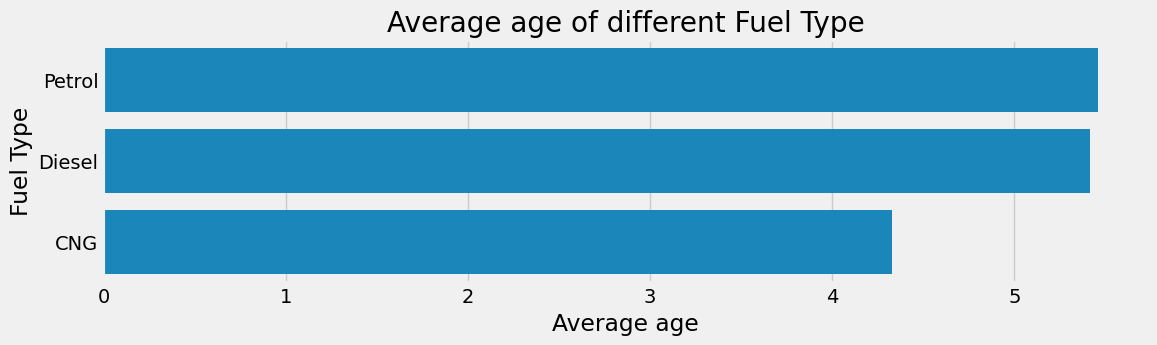

In [92]:
plt.figure(figsize=(12,3))

sns.barplot(y=avg_age_fuel_type.index, x=avg_age_fuel_type.values, color='#008FD5')

plt.title('Average age of different Fuel Type')
plt.xlabel('Average age')
plt.ylabel('Fuel Type')
plt.show()

### 💡 Insight

- **Petrol**: The average age of cars running on petrol was found to be approximately 5.46 years. This suggests that, on average, petrol-fueled cars listed on the website tend to be around 5 and a half years old.

- **Diesel**: Cars powered by diesel fuel exhibited an average age of around 5.41 years. This indicates that the average age of diesel-fueled cars listed on the website is slightly lower than that of petrol cars, with a difference of approximately 0.05 years.

- **CNG**: The analysis revealed that CNG-fueled cars on the website had an average age of about 4.33 years. Compared to both petrol and diesel cars, CNG-fueled cars appeared to be the youngest on average.

### For each registration year, what is the distribution of fuel types?

In [93]:
registration_fuel_type = filter_df.groupby('year')['fuel_type'].value_counts().unstack()
registration_fuel_type

fuel_type   CNG  Diesel  Petrol
year                           
2010        NaN     2.0    75.0
2011        4.0     3.0    92.0
2012        6.0    25.0   141.0
2013       12.0    27.0   160.0
2014       17.0    39.0   276.0
2015       16.0    53.0   327.0
2016       19.0    95.0   472.0
2017       44.0   114.0   639.0
2018       62.0   205.0   723.0
2019       77.0   134.0   630.0
2020       64.0    57.0   568.0
2021       87.0    78.0   559.0
2022       39.0    26.0   216.0
2023        NaN     NaN     3.0

<Figure size 1200x300 with 0 Axes>

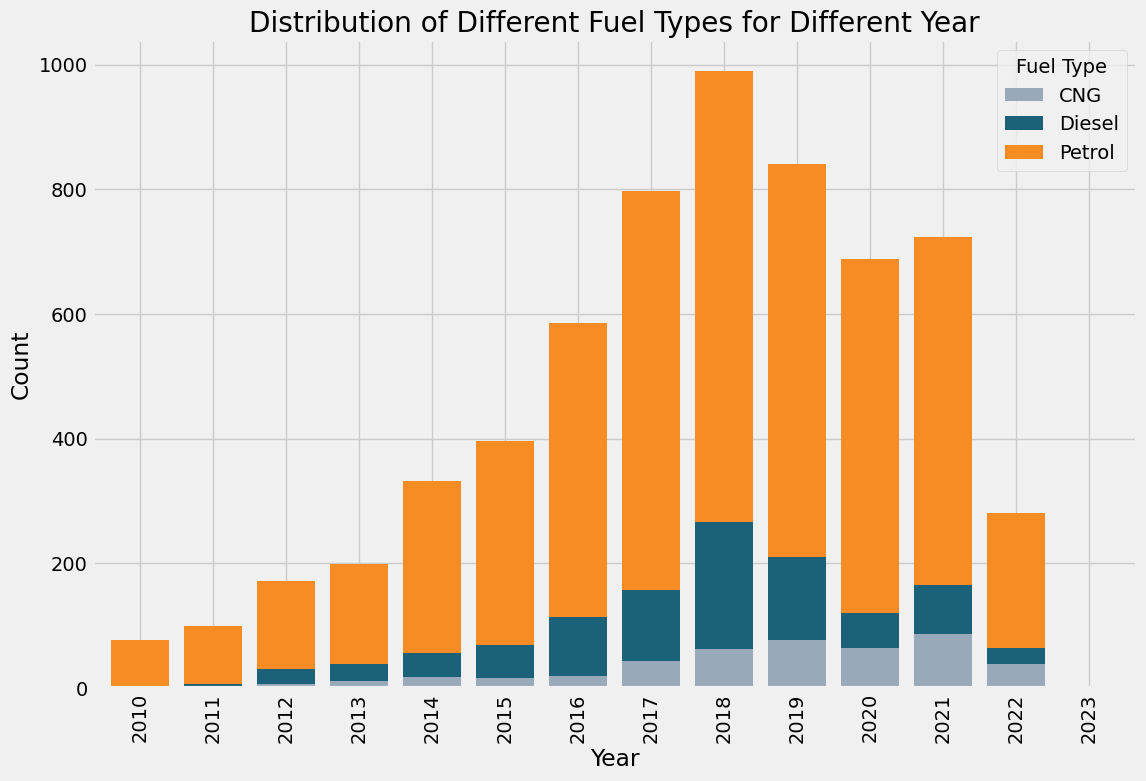

In [94]:
plt.figure(figsize=(12,3))

colors= ['#98aab9', '#1a6179', '#f88c24']

fig, ax = plt.subplots(figsize=(12, 8))
registration_fuel_type.plot(kind='bar', stacked=True, ax=ax, color=colors, width=0.8)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Different Fuel Types for Different Year')
plt.legend(title='Fuel Type')
plt.show()

### Which car models have the highest and lowest listings based on the fuel type?

### "Petrol Type"

In [95]:
filter_df = df[df['fuel_type'] == 'Petrol']

model_listing_fuel_type = filter_df.groupby('car_model')['fuel_type'].value_counts()
model_listing_fuel_type = model_listing_fuel_type.unstack()
model_listing_fuel_type = model_listing_fuel_type.sort_values('Petrol', ascending=False)

#### Car models that have the highest number of listings among petrol fuel type?

In [96]:
highest_listings = model_listing_fuel_type.head(10)
highest_listings

fuel_type    Petrol
car_model          
Swift           388
Baleno          347
Grand i10       273
City            224
Elite i20       217
Wagon R 1.0     151
Kwid            145
Ciaz            142
Alto 800        136
Celerio         128

#### Car models that have the lowest number of listings among petrol fuel type?

In [97]:
lowest_listings = model_listing_fuel_type.tail(10)
lowest_listings

fuel_type    Petrol
car_model          
ALCAZAR           2
Figo Aspire       2
Terrano           1
Camry             1
Bolt              1
HECTOR PLUS       1
Classic           1
Kuv100            1
Tigor Buzz        1
Captur            1

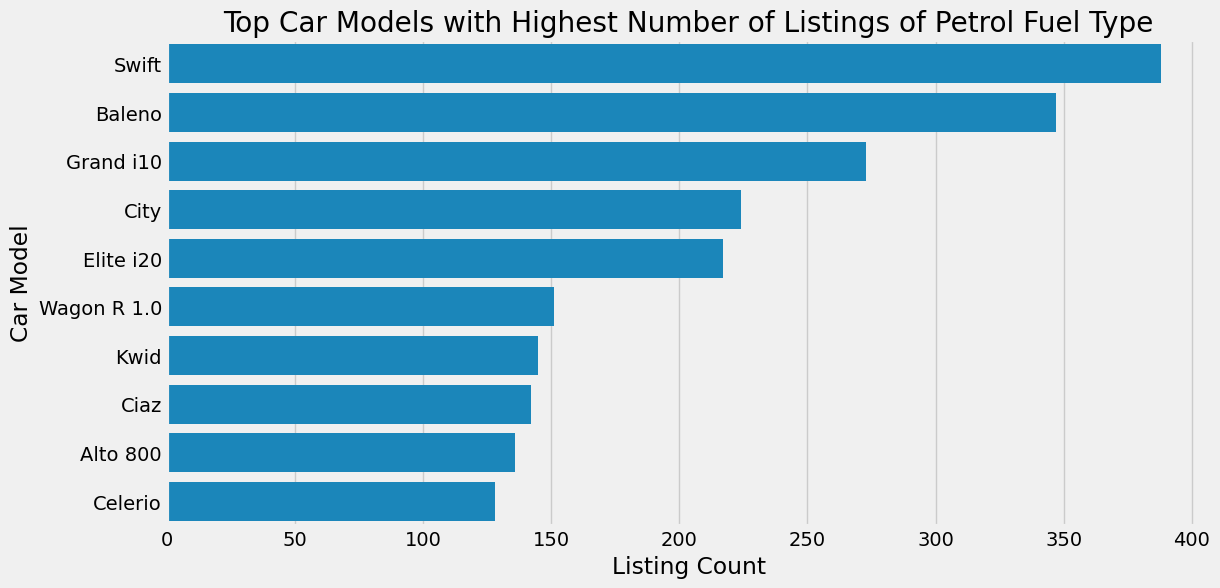

In [98]:
plt.figure(figsize=(12, 6))

model_listing_fuel_type = model_listing_fuel_type.head(10)

sns.barplot(data=model_listing_fuel_type, x='Petrol', y=model_listing_fuel_type.index, color='#008FD5')

plt.xlabel('Listing Count')
plt.ylabel('Car Model')
plt.title('Top Car Models with Highest Number of Listings of Petrol Fuel Type')
plt.show()

### 💡 Insight

The car model with the highest number of listings among petrol fuel type was the Swift, with a total of 388 listings. Following closely behind was the Baleno with 347 listings, and the Grand i10 with 273 listings. Other popular car models among petrol listings included the City (224 listings), Elite i20 (217 listings), Wagon R 1.0 (151 listings), Kwid (145 listings), Ciaz (142 listings), Alto 800 (136 listings), and Celerio (128 listings).

On the other hand, some car models had relatively fewer listings among petrol-fueled vehicles. The lowest 10 car models with the least number of listings in this category were identified as well. Among these, the ALCAZAR and Figo Aspire had only 2 listings each. The Terrano, Camry, Bolt, HECTOR PLUS, Classic, Kuv100, Tigor Buzz, and Captur had only 1 listing each, indicating a scarcity of these models among petrol listings.

### "Diesel Type"

In [99]:
filter_df = df[df['fuel_type'] == 'Diesel']

model_listing_fuel_type = filter_df.groupby('car_model')['fuel_type'].value_counts()
model_listing_fuel_type = model_listing_fuel_type.unstack()
model_listing_fuel_type = model_listing_fuel_type.sort_values('Diesel', ascending=False)

#### Car models that have the highest number of listings among diesel fuel type?

In [100]:
highest_listings = model_listing_fuel_type.head(10)
highest_listings

fuel_type      Diesel
car_model            
Vitara Brezza     101
Creta              48
Ecosport           46
Swift              45
Duster             41
Verna              41
XUV500             32
NEXON              25
Swift Dzire        24
Dzire              24

#### Car models that have the lowest number of listings among diesel fuel type?

In [101]:
lowest_listings = model_listing_fuel_type.tail(10)
lowest_listings

fuel_type       Diesel
car_model             
SCORPIO-N            1
Pulse                1
HECTOR PLUS          1
GRAND CHEROKEE       1
Endeavour            1
Cross Polo           1
BR-V                 1
Xcent                1
i20                  1
3 Series             1

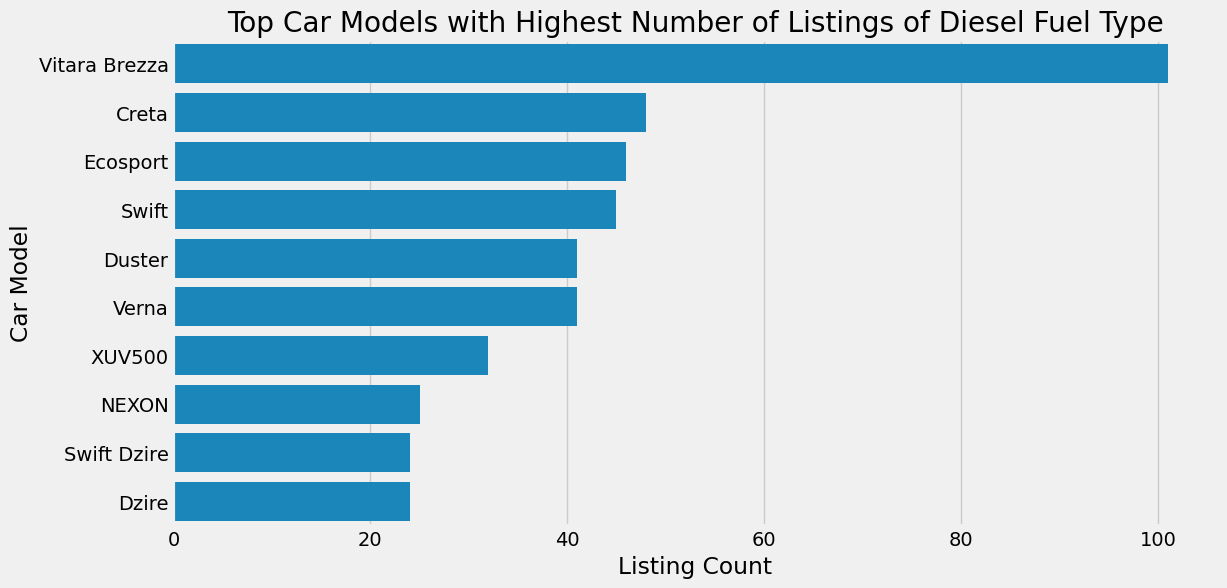

In [102]:
plt.figure(figsize=(12, 6))

model_listing_fuel_type = model_listing_fuel_type.head(10)

sns.barplot(data=model_listing_fuel_type, x='Diesel', y=model_listing_fuel_type.index, color='#008FD5')

plt.xlabel('Listing Count')
plt.ylabel('Car Model')
plt.title('Top Car Models with Highest Number of Listings of Diesel Fuel Type')
plt.show()

### 💡 Insight

#### Highest Number of Listings:
Among the diesel fuel type, the car model "Vitara Brezza" has the highest number of listings with a count of 101. Following closely are the car models "Creta" with 48 listings, "Ecosport" with 46 listings, "Swift" with 45 listings, "Duster" and "Verna" with 41 listings each. Other car models with significant listings include "XUV500" with 32 listings, "NEXON" with 25 listings, "Swift Dzire" with 24 listings, and "Dzire" with 24 listings.

#### Lowest Number of Listings:
On the other end of the spectrum, there are several car models that have the lowest number of listings among the diesel fuel type. These car models include "SCORPIO-N," "Pulse," "HECTOR PLUS," "GRAND CHEROKEE," "Endeavour," "Cross Polo," "BR-V," "Xcent," "i20," and "3 Series," each having only one listing in the dataset.

### "CNG Type"

In [103]:
filter_df = df[df['fuel_type'] == 'CNG']

model_listing_fuel_type = filter_df.groupby('car_model')['fuel_type'].value_counts()
model_listing_fuel_type = model_listing_fuel_type.unstack()
model_listing_fuel_type = model_listing_fuel_type.sort_values('CNG', ascending=False)

#### Car models that have the highest number of listings among CNG fuel type?

In [104]:
highest_listings = model_listing_fuel_type.head(10)
highest_listings

fuel_type       CNG
car_model          
New Wagon-R      76
Wagon R 1.0      66
Celerio          50
NEW SANTRO       37
S PRESSO         27
Alto             26
GRAND I10 NIOS   26
Grand i10        21
Swift            11
City             11

#### Car models that have the lowest number of listings among CNG Fuel type?

In [105]:
lowest_listings = model_listing_fuel_type.tail(10)
lowest_listings

fuel_type    CNG
car_model       
NEXON          1
TIGOR          1
Ameo           1
VENUE          1
NEW I20        1
Kwid           1
Amaze          1
Jazz           1
YARIS          1
Figo Aspire    1

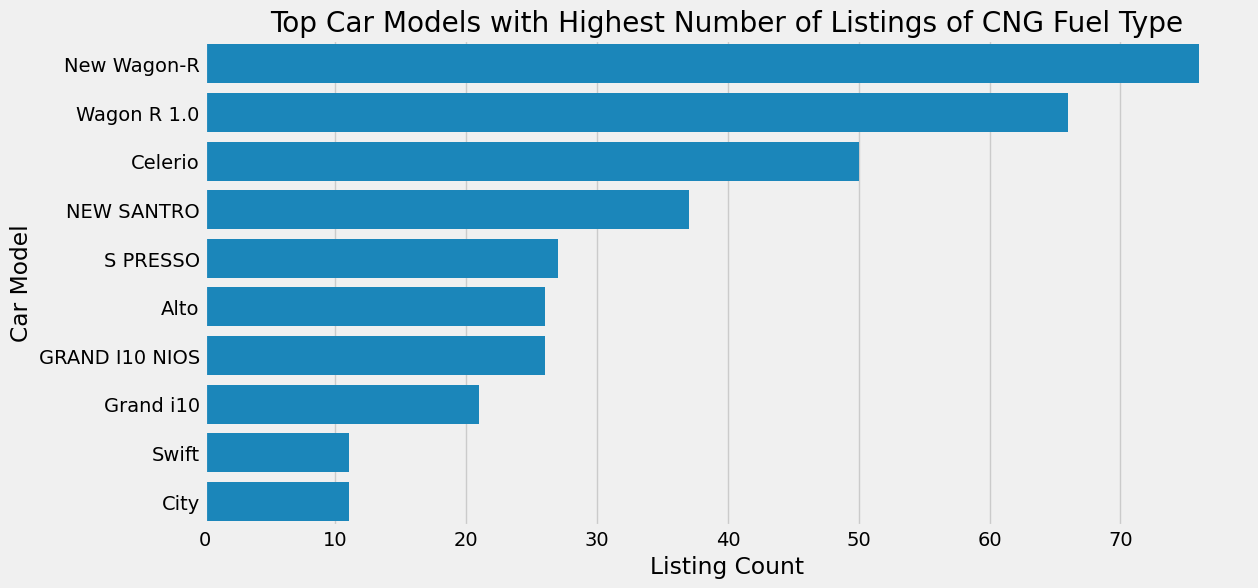

In [106]:
plt.figure(figsize=(12, 6))

model_listing_fuel_type = model_listing_fuel_type.head(10)

sns.barplot(data=model_listing_fuel_type, x='CNG', y=model_listing_fuel_type.index, color='#008FD5')

plt.xlabel('Listing Count')
plt.ylabel('Car Model')
plt.title('Top Car Models with Highest Number of Listings of CNG Fuel Type')
plt.show()

### 💡 Insight

#### Highest Listings:
The car model "New Wagon-R" has the highest number of listings among CNG fuel type, with a count of 76. Following closely behind is the car model "Wagon R 1.0" with 66 listings.
- "Celerio" secures the third position with 50 listings.
- "NEW SANTRO" occupies the fourth spot with 37 listings.
- "S PRESSO" and "Alto" have 27 and 26 listings respectively, placing them in the fifth and sixth positions.
- Both "GRAND I10 NIOS" and "Grand i10" share the seventh position with 26 listings each.
- Finally, "Swift" and "City" tie with 11 listings each, securing the eighth position.

#### Lowest Listings:
Among the CNG fuel type, several car models have the lowest number of listings, each with only one listing.
These models include "NEXON," "TIGOR," "Ameo," "VENUE," "NEW I20," "Kwid," "Amaze," "Jazz," "YARIS," and "Figo Aspire."

### What is the listing share of different Transmission types?

In [107]:
transmission_type_share = df['transmission_type'].value_counts(normalize=True)*100
transmission_type_share

transmission_type
Manual       76.127364
Automatic    23.872636
Name: proportion, dtype: float64

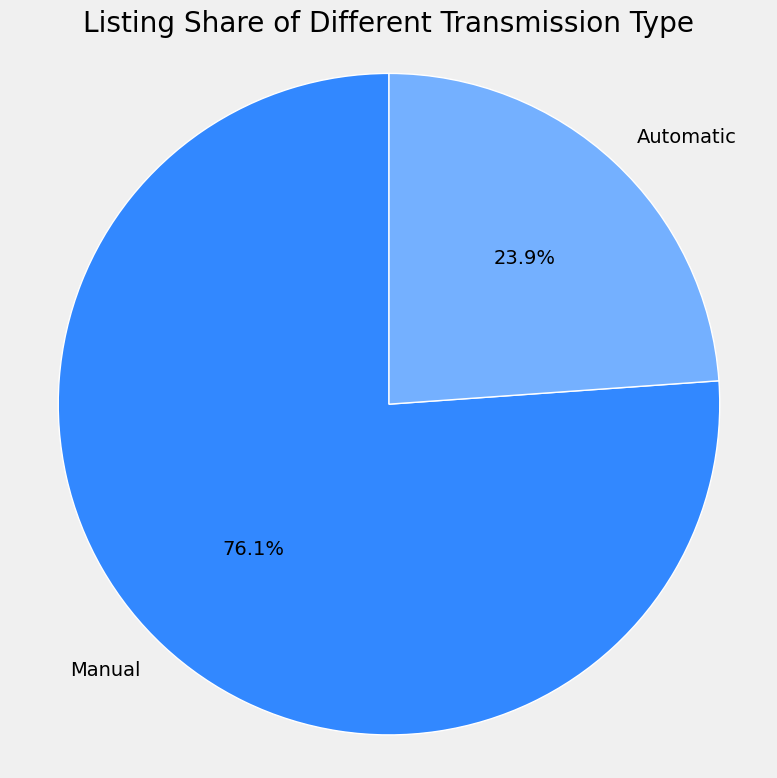

In [108]:
plt.figure(figsize=(8,8))

colors = ['#3288FF', '#74B0FF']

wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}
textprops = {'color': 'sandybrown'}
textprops = {'color': 'black'}

labels = transmission_type_share.index

plt.pie(transmission_type_share, autopct='%1.1f%%', labels=labels, startangle=90, 
        colors=colors, wedgeprops=wedgeprops, textprops=textprops)

plt.title('Listing Share of Different Transmission Type')
plt.axis('equal')
plt.tight_layout()
plt.show()

### 💡 Insight

The majority of the used cars listed on the Cars24 website have a manual transmission, accounting for approximately 76.13% of the listings. On the other hand, cars with automatic transmissions comprise a smaller share, representing approximately 23.87% of the listings. This insight suggests that there is a significant preference for manual transmission among the used cars available on the Cars24 platform.

### What is the distribution of transmission types among different manufacturers?

In [109]:
manf_transmission_share = df.groupby('car_manufacturer')['transmission_type'].value_counts().unstack()
manf_transmission_share

transmission_type  Automatic  Manual
car_manufacturer                    
BMW                      1.0     NaN
Datsun                   5.0    41.0
Ford                    39.0   131.0
Honda                  178.0   415.0
Hyundai                293.0  1191.0
Jeep                     6.0     3.0
KIA                     32.0    55.0
MG                       1.0     3.0
Mahindra                34.0   102.0
Maruti                 485.0  2117.0
Nissan                  17.0    27.0
Renault                116.0   197.0
Skoda                   34.0    26.0
Tata                   115.0   203.0
Toyota                  72.0   104.0
Volkswagen              49.0    95.0

<Figure size 1200x800 with 0 Axes>

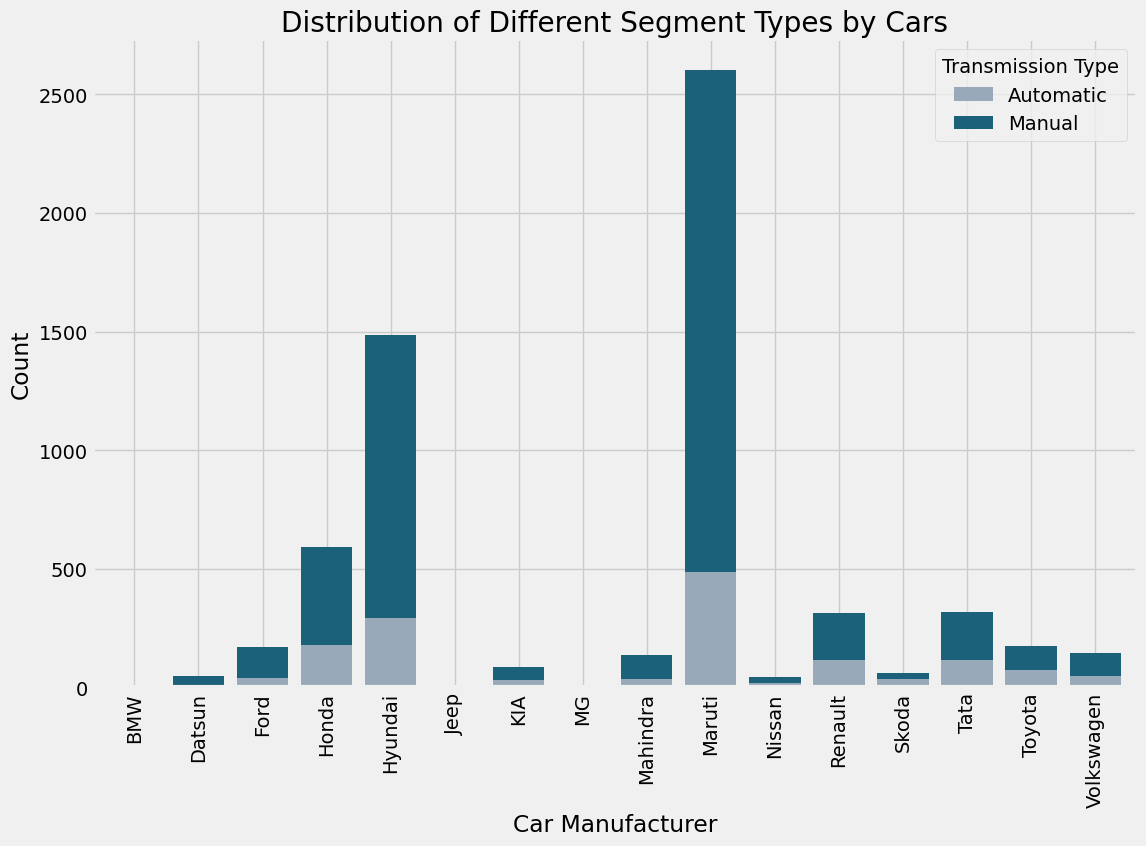

In [110]:
plt.figure(figsize=(12, 8))

colors= ['#98aab9', '#1a6179']

fig, ax = plt.subplots(figsize=(12, 8))
manf_transmission_share.plot(kind='bar', stacked=True, ax=ax, color=colors, width=0.8)

plt.xlabel('Car Manufacturer')
plt.ylabel('Count')
plt.title('Distribution of Different Segment Types by Cars')
plt.legend(title='Transmission Type')
plt.show()

### 💡 Insight

- **BMW**: There is only one BMW car listed in the dataset, and it had an automatic transmission. No manual transmission BMW cars were available in the dataset.
- **Datsun**: Among the Datsun cars listed, five had automatic transmissions, while 41 had manual transmissions.
- **Ford**: Ford cars had a higher preference for manual transmissions, with 131 cars listed with manual transmissions compared to 39 with automatic transmissions.
- **Honda**: Honda cars exhibited a similar trend to Ford, where manual transmissions were more popular. Out of the Honda cars listed, 415 had manual transmissions, while 178 had automatic transmissions.
- **Hyundai**: Hyundai had a significant number of cars listed on the website. The majority of Hyundai cars had manual transmissions, with 1,191 cars listed as manual and 293 cars listed as automatic.
- **Jeep**: Among the Jeep cars listed, six had automatic transmissions, while only three had manual transmissions.
- **KIA**: KIA cars had a balanced distribution between automatic and manual transmissions, with 55 cars listed with manual transmissions and 32 cars with automatic transmissions.
- **MG**: There was a single MG car listed with an automatic transmission, and three MG cars listed with manual transmissions.
- **Mahindra**: Mahindra cars had a slightly higher number of cars listed with manual transmissions (102) compared to those with automatic transmissions (34).
- **Maruti**: Maruti cars had a similar trend to Hyundai, with a high preference for manual transmissions. Among the Maruti cars listed, 2,117 had manual transmissions, while 485 had automatic transmissions.
- **Nissan**: Nissan cars had a slightly higher number of cars listed with manual transmissions (27) compared to those with automatic transmissions (17).
- **Renault**: Renault cars also showed a preference for manual transmissions, with 197 cars listed with manual transmissions and 116 cars listed with automatic transmissions.
- **Skoda**: Skoda cars had a balanced distribution between automatic and manual transmissions, with 26 cars listed with manual transmissions and 34 cars with automatic transmissions.
- **Tata**: Tata cars exhibited a similar trend to Renault, with 203 cars listed with manual transmissions and 115 cars listed with automatic transmissions.
- **Toyota**: Toyota cars had a higher preference for manual transmissions, with 104 cars listed with manual transmissions and 72 cars listed with automatic transmissions.
- **Volkswagen**: Among the Volkswagen cars listed, 95 had manual transmissions, while 49 had automatic transmissions.

### What is the average number of owners based on the type of transmission?

In [111]:
avg_owner_tranmission_type = filter_df.groupby('transmission_type')['owner'].mean().sort_values(ascending=False)
avg_owner_tranmission_type

transmission_type
Automatic    1.400000
Manual       1.158768
Name: owner, dtype: float64

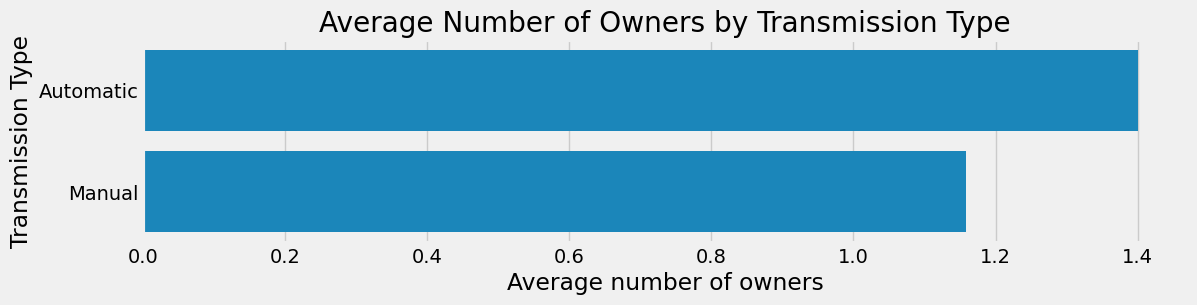

In [112]:
plt.figure(figsize=(12,2.5))

sns.barplot(y=avg_owner_tranmission_type.index, x=avg_owner_tranmission_type.values, color='#008FD5')

plt.title('Average Number of Owners by Transmission Type')
plt.xlabel('Average number of owners')
plt.ylabel('Transmission Type')
plt.show()

### 💡 Insight

- **Automatic Transmission**: The average number of owners for cars with automatic transmission is approximately 1.4. This indicates that, on average, cars with automatic transmission have had 1.4 owners throughout their lifespan.

- **Manual Transmission**: On the other hand, cars with manual transmission show a slightly lower average number of owners. The average number of owners for cars with manual transmission is approximately 1.158768. This suggests that, on average, cars with manual transmission have had 1.158768 owners over their lifetime.

These findings highlight a slight difference in the average number of owners based on the type of transmission. Cars with automatic transmission tend to have a slightly higher average number of owners compared to cars with manual transmission.

### What is the average age of cars of different transmission types?

In [113]:
avg_age_tranmission_type = filter_df.groupby('transmission_type')['age'].mean().sort_values(ascending=False)
avg_age_tranmission_type

transmission_type
Automatic    5.640000
Manual       4.251185
Name: age, dtype: float64

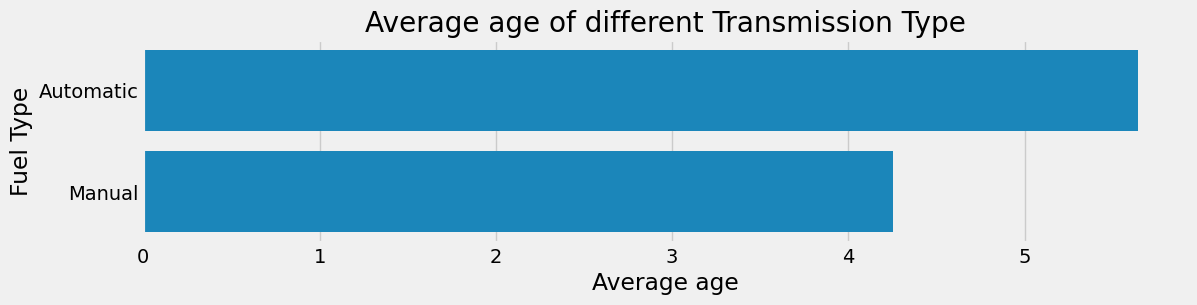

In [114]:
plt.figure(figsize=(12,2.5))

sns.barplot(y=avg_age_tranmission_type.index, x=avg_age_tranmission_type.values, color='#008FD5')

plt.title('Average age of different Transmission Type')
plt.xlabel('Average age')
plt.ylabel('Fuel Type')
plt.show()

### 💡 Insight

- **Automatic Transmission**:
The average age of cars with automatic transmission in the dataset was found to be approximately 5.64 years. This implies that, on average, cars with automatic transmission listed on the Cars24 website are about 5.64 years old.

- **Manual Transmission**:
For cars with manual transmission, the average age was calculated to be approximately 4.25 years. This means that, on average, cars with manual transmission listed on the Cars24 website are approximately 4.25 years old.

These findings suggest that there is a slight difference in the average age of cars based on their transmission type. Cars with automatic transmission tend to be slightly older, with an average age of 5.64 years, compared to cars with manual transmission, which have an average age of 4.25 years.

### For each registration year, what is the distribution of transmission types?

In [115]:
registration_transmission_type = filter_df.groupby('year')['transmission_type'].value_counts().unstack()
registration_transmission_type

transmission_type  Automatic  Manual
year                                
2011                     NaN     4.0
2012                     1.0     5.0
2013                     NaN    12.0
2014                     NaN    17.0
2015                     3.0    13.0
2016                     2.0    17.0
2017                     8.0    36.0
2018                     4.0    58.0
2019                     4.0    73.0
2020                     2.0    62.0
2021                     1.0    86.0
2022                     NaN    39.0

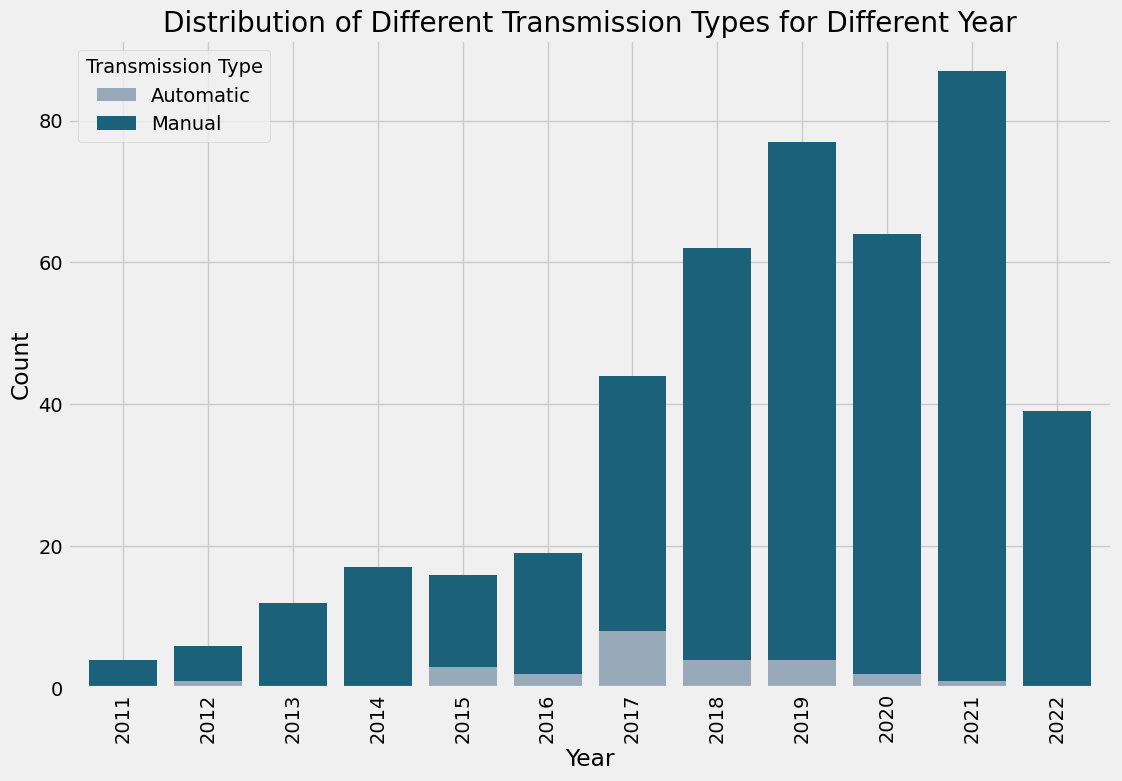

In [116]:
colors= ['#98aab9', '#1a6179', '#f88c24']

fig, ax = plt.subplots(figsize=(12, 8))
registration_transmission_type.plot(kind='bar', stacked=True, ax=ax, color=colors, width=0.8)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Different Transmission Types for Different Year')
plt.legend(title='Transmission Type')
plt.show()

### Which car models have the highest and lowest listings based on the transmission type?

### "Manual Type"

In [117]:
filter_df = df[df['transmission_type'] == 'Manual']

model_listing_transmission_type = filter_df.groupby('car_model')['transmission_type'].value_counts()
model_listing_transmission_type = model_listing_transmission_type.unstack()
model_listing_transmission_type = model_listing_transmission_type.sort_values('Manual', ascending=False)

#### Car models that have the highest number of listings among manual transmission type?

In [118]:
highest_listings = model_listing_transmission_type.head(10)
highest_listings

transmission_type  Manual
car_model                
Swift                 389
Baleno                289
Grand i10             257
Elite i20             230
Wagon R 1.0           199
City                  145
Alto 800              144
Alto                  122
Ciaz                  115
Celerio               113

#### Car models that have the lowest number of listings among manual transmission type?

In [119]:
lowest_listings = model_listing_transmission_type.tail(10)
lowest_listings

transmission_type  Manual
car_model                
HECTOR PLUS             1
CARENS                  1
Cross Polo              1
Pulse                   1
Endeavour               1
CRV                     1
Hexa                    1
Tigor Buzz              1
Classic                 1
Sunny                   1

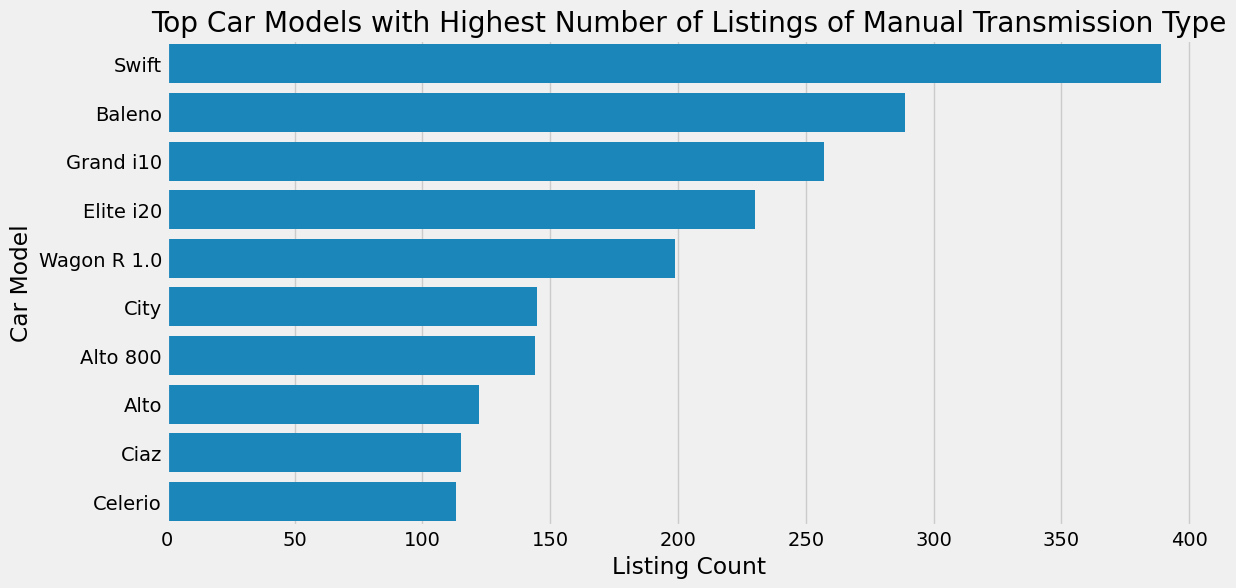

In [120]:
plt.figure(figsize=(12, 6))

model_listing_transmission_type = model_listing_transmission_type.head(10)

sns.barplot(data=model_listing_transmission_type, x='Manual', y=model_listing_transmission_type.index, color='#008FD5')

plt.xlabel('Listing Count')
plt.ylabel('Car Model')
plt.title('Top Car Models with Highest Number of Listings of Manual Transmission Type')
plt.show()

### 💡 Insight

#### Car models with the highest number of listings among manual transmission type:
- Swift: The car model "Swift" has the highest number of listings among cars with manual transmission, with a total of 389 listings.
- Baleno: Following closely, the car model "Baleno" ranks second in terms of the highest number of listings among manual transmission cars, with a count of 289 listings.
- Grand i10: The car model "Grand i10" secures the third position in the list, with a significant number of 257 listings.
- Elite i20: With 230 listings, the car model "Elite i20" occupies the fourth spot among manual transmission cars.
- Wagon R 1.0: Another popular car model, "Wagon R 1.0," comes in fifth place with a total of 199 listings.
- City, Alto 800, Alto, Ciaz, and Celerio: These car models also feature prominently in the listings, with 145, 144, 122, 115, and 113 listings, respectively.

#### Car models with the lowest number of listings among manual transmission type:
HECTOR PLUS, CARENS, Cross Polo, Pulse, Endeavour, CRV, Hexa, Tigor Buzz, Classic, and Sunny: These car models have the lowest number of listings among manual transmission cars, each with only one listing.

### "Automatic Type"

In [121]:
filter_df = df[df['transmission_type'] == 'Automatic']

model_listing_transmission_type = filter_df.groupby('car_model')['transmission_type'].value_counts()
model_listing_transmission_type = model_listing_transmission_type.unstack()
model_listing_transmission_type = model_listing_transmission_type.sort_values('Automatic', ascending=False)

#### Car models that have the highest number of listings among manual transmission type?

In [122]:
highest_listings = model_listing_transmission_type.head(10)
highest_listings

transmission_type  Automatic
car_model                   
City                      97
Baleno                    86
Dzire                     80
Celerio                   65
Kwid                      61
Creta                     57
Swift                     55
Verna                     54
NEXON                     48
Grand i10                 48

#### Car models that have the lowest number of listings among manual transmission type?

In [123]:
lowest_listings = model_listing_transmission_type.tail(10)
lowest_listings

transmission_type  Automatic
car_model                   
CARENS                     1
GRAND CHEROKEE             1
Camry                      1
Ertiga                     1
Go                         1
HECTOR PLUS                1
Hexa                       1
A Star                     1
Swift Dzire                1
3 Series                   1

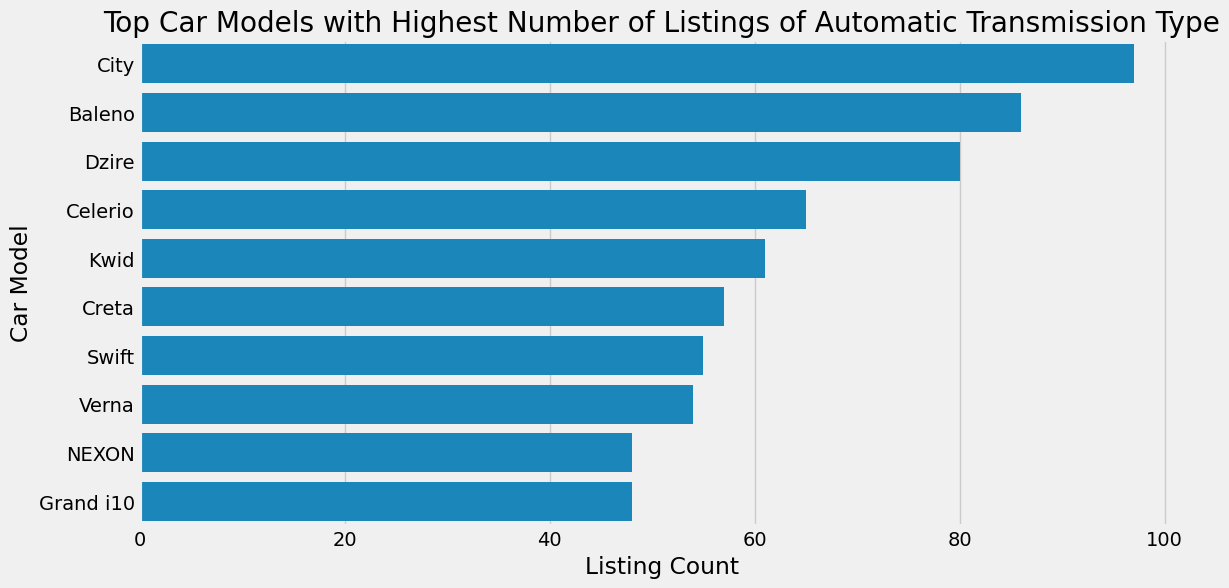

In [124]:
plt.figure(figsize=(12, 6))

model_listing_transmission_type = model_listing_transmission_type.head(10)

sns.barplot(data=model_listing_transmission_type, x='Automatic', y=model_listing_transmission_type.index, color='#008FD5')

plt.xlabel('Listing Count')
plt.ylabel('Car Model')
plt.title('Top Car Models with Highest Number of Listings of Automatic Transmission Type')
plt.show()

### 💡 Insight

#### Car Models with the Highest Number of Listings:
- City: The car model "City" had the highest number of listings among the automatic transmission type, with a count of 97.
- Baleno: Following closely, the car model "Baleno" had 86 listings with an automatic transmission.
- Dzire: "Dzire" secured the third position with 80 listings.
- Celerio: The car model "Celerio" had 65 listings with automatic transmission.
- Kwid: "Kwid" came next with 61 listings.
- Creta: The car model "Creta" had 57 listings with automatic transmission.
- Swift: "Swift" was listed 55 times with an automatic transmission.
- Verna: "Verna" had 54 listings in the automatic category.
- NEXON: The car model "NEXON" secured 48 listings with automatic transmission.
- Grand i10: "Grand i10" also had 48 listings in the automatic category.

#### Car Models with the Lowest Number of Listings:
CARENS, GRAND CHEROKEE, Camry, Ertiga, Go, HECTOR PLUS, Hexa, A Star, Swift Dzire, 3 Series. These car models have minimal representation in the automatic transmission type with only one listing each. 

### Which city has the most number of unique registered series?

In [125]:
city_registration_series = df.groupby('city')['registration'].nunique().sort_values(ascending=False)
city_registration_series

city
 Delhi NCR     69
 Chennai       52
 Bengaluru     47
 Hyderabad     44
 Chandigarh    38
 Pune          32
 Ahmedabad     30
 Jaipur        29
 Mumbai        23
 Kolkata       18
Name: registration, dtype: int64

In [132]:
plt.figure(figsize=(12, 6))

sns.barplot(y=city_registration_series.index, x=city_registration_series, color='#008FD5')

plt.xlabel('number of unique series')
plt.ylabel('City')
plt.title('City that has the Highest Number of Unique Registration Series')
plt.show()

### 💡 Insight

Delhi NCR is the region with the most number of unique registered series, totaling 69. Following closely behind are Chennai with 52 unique registered series, Bengaluru with 47, Hyderabad with 44, and Chandigarh with 38. Pune recorded 32 unique registered series, while Ahmedabad and Jaipur had 30 and 29 respectively. Mumbai and Kolkata had fewer unique registered series, with 23 and 18 respectively.

It suggests that Delhi NCR has the highest variety of registered series, which could be attributed to various factors such as a higher volume of vehicle sales, a larger population, or a more diverse car market.

### Which city has the highest number of summer discounts on cars?

In [130]:
city_summer_discount = df.groupby('city')['summer_discount'].nunique().sort_values(ascending=False)
city_summer_discount

city
 Bengaluru     193
 Delhi NCR     162
 Pune          148
 Mumbai        146
 Hyderabad     139
 Chennai       127
 Ahmedabad     109
 Kolkata       100
 Chandigarh     99
 Jaipur         96
Name: summer_discount, dtype: int64

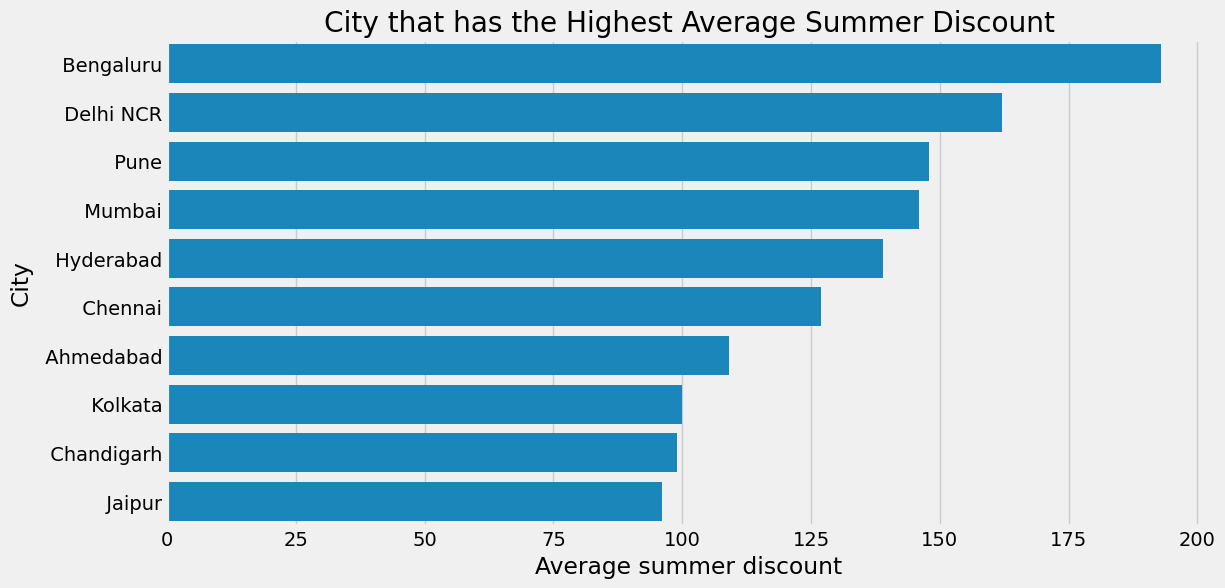

In [133]:
plt.figure(figsize=(12, 6))

sns.barplot(y=city_summer_discount.index, x=city_summer_discount.values, color='#008FD5')

plt.xlabel('Average summer discount')
plt.ylabel('City')
plt.title('City that has the Highest Average Summer Discount')
plt.show()

### 💡 Insight

Among the cities analyzed, Bengaluru emerged as the city with the highest number of summer discounts on cars, with a total of 193 cars available or offering discounts. This indicates a significant presence of discounted cars in the Bengaluru market during the summer season.

Following Bengaluru, Delhi NCR ranked second with 162 cars offering summer discounts. It was closely followed by Pune with 148 cars and Mumbai with 146 cars. These cities also exhibited a substantial number of discounted cars during the summer period.

Hyderabad and Chennai secured the fifth and sixth positions, respectively, with 139 and 127 cars available or offering summer discounts. Ahmedabad, Kolkata, Chandigarh, and Jaipur rounded out the top ten cities, with 109, 100, 99, and 96 cars, respectively, offering summer discounts.